In [279]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from pandas.api.types import CategoricalDtype
import scipy.stats as st
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

red_wine = pd.read_csv('wine_data/winequality-red.csv', encoding='unicode_escape', sep=';')
white_wine = pd.read_csv('wine_data/winequality-white.csv', encoding='unicode_escape', sep=';')

# Adding type labels to indicate red or white wine
red_wine['type'] = 'Red'
white_wine['type'] = 'White'

# Format the floats to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [280]:
print("\n" + "-" * 50)
print(">>> CSV Head <<<")
print("-" * 50 + "\n")

print("\nRed Wine Head:\n", red_wine.head(5))
print("\nWhite Wine Head:\n", white_wine.head(5))

print("\n" + "-" * 50)
print(">>> CSV Tail <<<")
print("-" * 50 + "\n")

print("\nRed Wine Tail:\n", red_wine.tail(5))
print("\nWhite Wine Tail:\n", white_wine.tail(5))


--------------------------------------------------
>>> CSV Head <<<
--------------------------------------------------


Red Wine Head:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.40              0.70         0.00            1.90       0.08   
1           7.80              0.88         0.00            2.60       0.10   
2           7.80              0.76         0.04            2.30       0.09   
3          11.20              0.28         0.56            1.90       0.07   
4           7.40              0.70         0.00            1.90       0.08   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                11.00                 34.00     1.00 3.51       0.56   
1                25.00                 67.00     1.00 3.20       0.68   
2                15.00                 54.00     1.00 3.26       0.65   
3                17.00                 60.00     1.00 3.16       0.58   
4                11.00      

In [281]:
# Data Understanding

print("\n" + "-" * 50)
print(">>> Red Wine Data Shape <<<")
print(red_wine.shape)
print("\n>>> White Wine Data Shape <<<")
print(white_wine.shape)
print("-" * 50 + "\n")



--------------------------------------------------
>>> Red Wine Data Shape <<<
(1599, 13)

>>> White Wine Data Shape <<<
(4898, 13)
--------------------------------------------------



In [282]:
red_wine.columns
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [283]:
red_wine.nunique()
white_wine.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
type                      1
dtype: int64

In [284]:
red_wine.dtypes
white_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [285]:
print("\n" + "-" * 50)
print(">>> Red Wine Info <<<")
print("-" * 50 + "\n")

red_wine.info()

print("\n" + "-" * 50)
print(">>> White Wine Info <<<")
print("-" * 50 + "\n")

white_wine.info()


--------------------------------------------------
>>> Red Wine Info <<<
--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dt

In [286]:
# Wine Data Summary Staistics
print("\n" + "-" * 50)
print(">>> Red Wine Summary<<<")
print("-" * 50 + "\n")

print(red_wine.describe())

print("\n" + "-" * 50)
print(">>> White Wine Summary <<<")
print("-" * 50 + "\n")
print(white_wine.describe())


--------------------------------------------------
>>> Red Wine Summary<<<
--------------------------------------------------

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count    1599.00              1599.00               1599.00  1599.00 1599.00   
mean        0.09                15.87                 46.47     1.00    

In [287]:
# Data Pre-Processing

# Checks for null values
pd.isnull(red_wine).sum()
pd.isnull(white_wine).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [288]:
# drop null values (if any)
red_wine.dropna(inplace=True)
white_wine.dropna(inplace=True)

print("\n" + "-" * 50)
print(">>> Red Wine Data Shape <<<")
print(red_wine.shape)
print("\n>>> White Wine Data Shape <<<")
print(white_wine.shape)
print("-" * 50 + "\n")


--------------------------------------------------
>>> Red Wine Data Shape <<<
(1599, 13)

>>> White Wine Data Shape <<<
(4898, 13)
--------------------------------------------------



In [289]:
print("\n" + "-" * 50)
print(">>> Duplicate rows in red wine <<<")
print("-" * 50 + "\n")
print(red_wine.duplicated().sum())

print("\n" + "-" * 50)
print(">>> Duplicate rows in white wine <<<")
print("-" * 50 + "\n")
print(white_wine.duplicated().sum())


--------------------------------------------------
>>> Duplicate rows in red wine <<<
--------------------------------------------------

240

--------------------------------------------------
>>> Duplicate rows in white wine <<<
--------------------------------------------------

937


In [290]:
# Drop duplicates
red_wine.drop_duplicates(inplace=True)
white_wine.drop_duplicates(inplace=True)

print("\n" + "-" * 50)
print(">>> Red Wine Shape after removing duplicates <<<")
print("-" * 50 + "\n")
print(red_wine.shape)

print("\n" + "-" * 50)
print(">>> White Wine Shape after removing duplicates <<<")
print("-" * 50 + "\n")
print(white_wine.shape)


--------------------------------------------------
>>> Red Wine Shape after removing duplicates <<<
--------------------------------------------------

(1359, 13)

--------------------------------------------------
>>> White Wine Shape after removing duplicates <<<
--------------------------------------------------

(3961, 13)


In [291]:
# Aggregations
print("\n" + "-" * 50)
print(">>> Average Values by Quality - Red Wine <<<")
print("-" * 50 + "\n")
print(red_wine.drop(columns='type').groupby('quality').mean())

print("\n" + "-" * 50)
print(">>> Average Values by Quality - White Wine <<<")
print("-" * 50 + "\n")
print(white_wine.drop(columns='type').groupby('quality').mean())


--------------------------------------------------
>>> Average Values by Quality - Red Wine <<<
--------------------------------------------------

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                 8.36              0.88         0.17            2.64   
4                 7.78              0.69         0.17            2.69   
5                 8.17              0.58         0.24            2.51   
6                 8.34              0.50         0.28            2.46   
7                 8.86              0.40         0.37            2.72   
8                 8.44              0.43         0.38            2.58   

         chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
quality                                                                       
3             0.12                11.00                 24.90     1.00 3.40   
4             0.09           

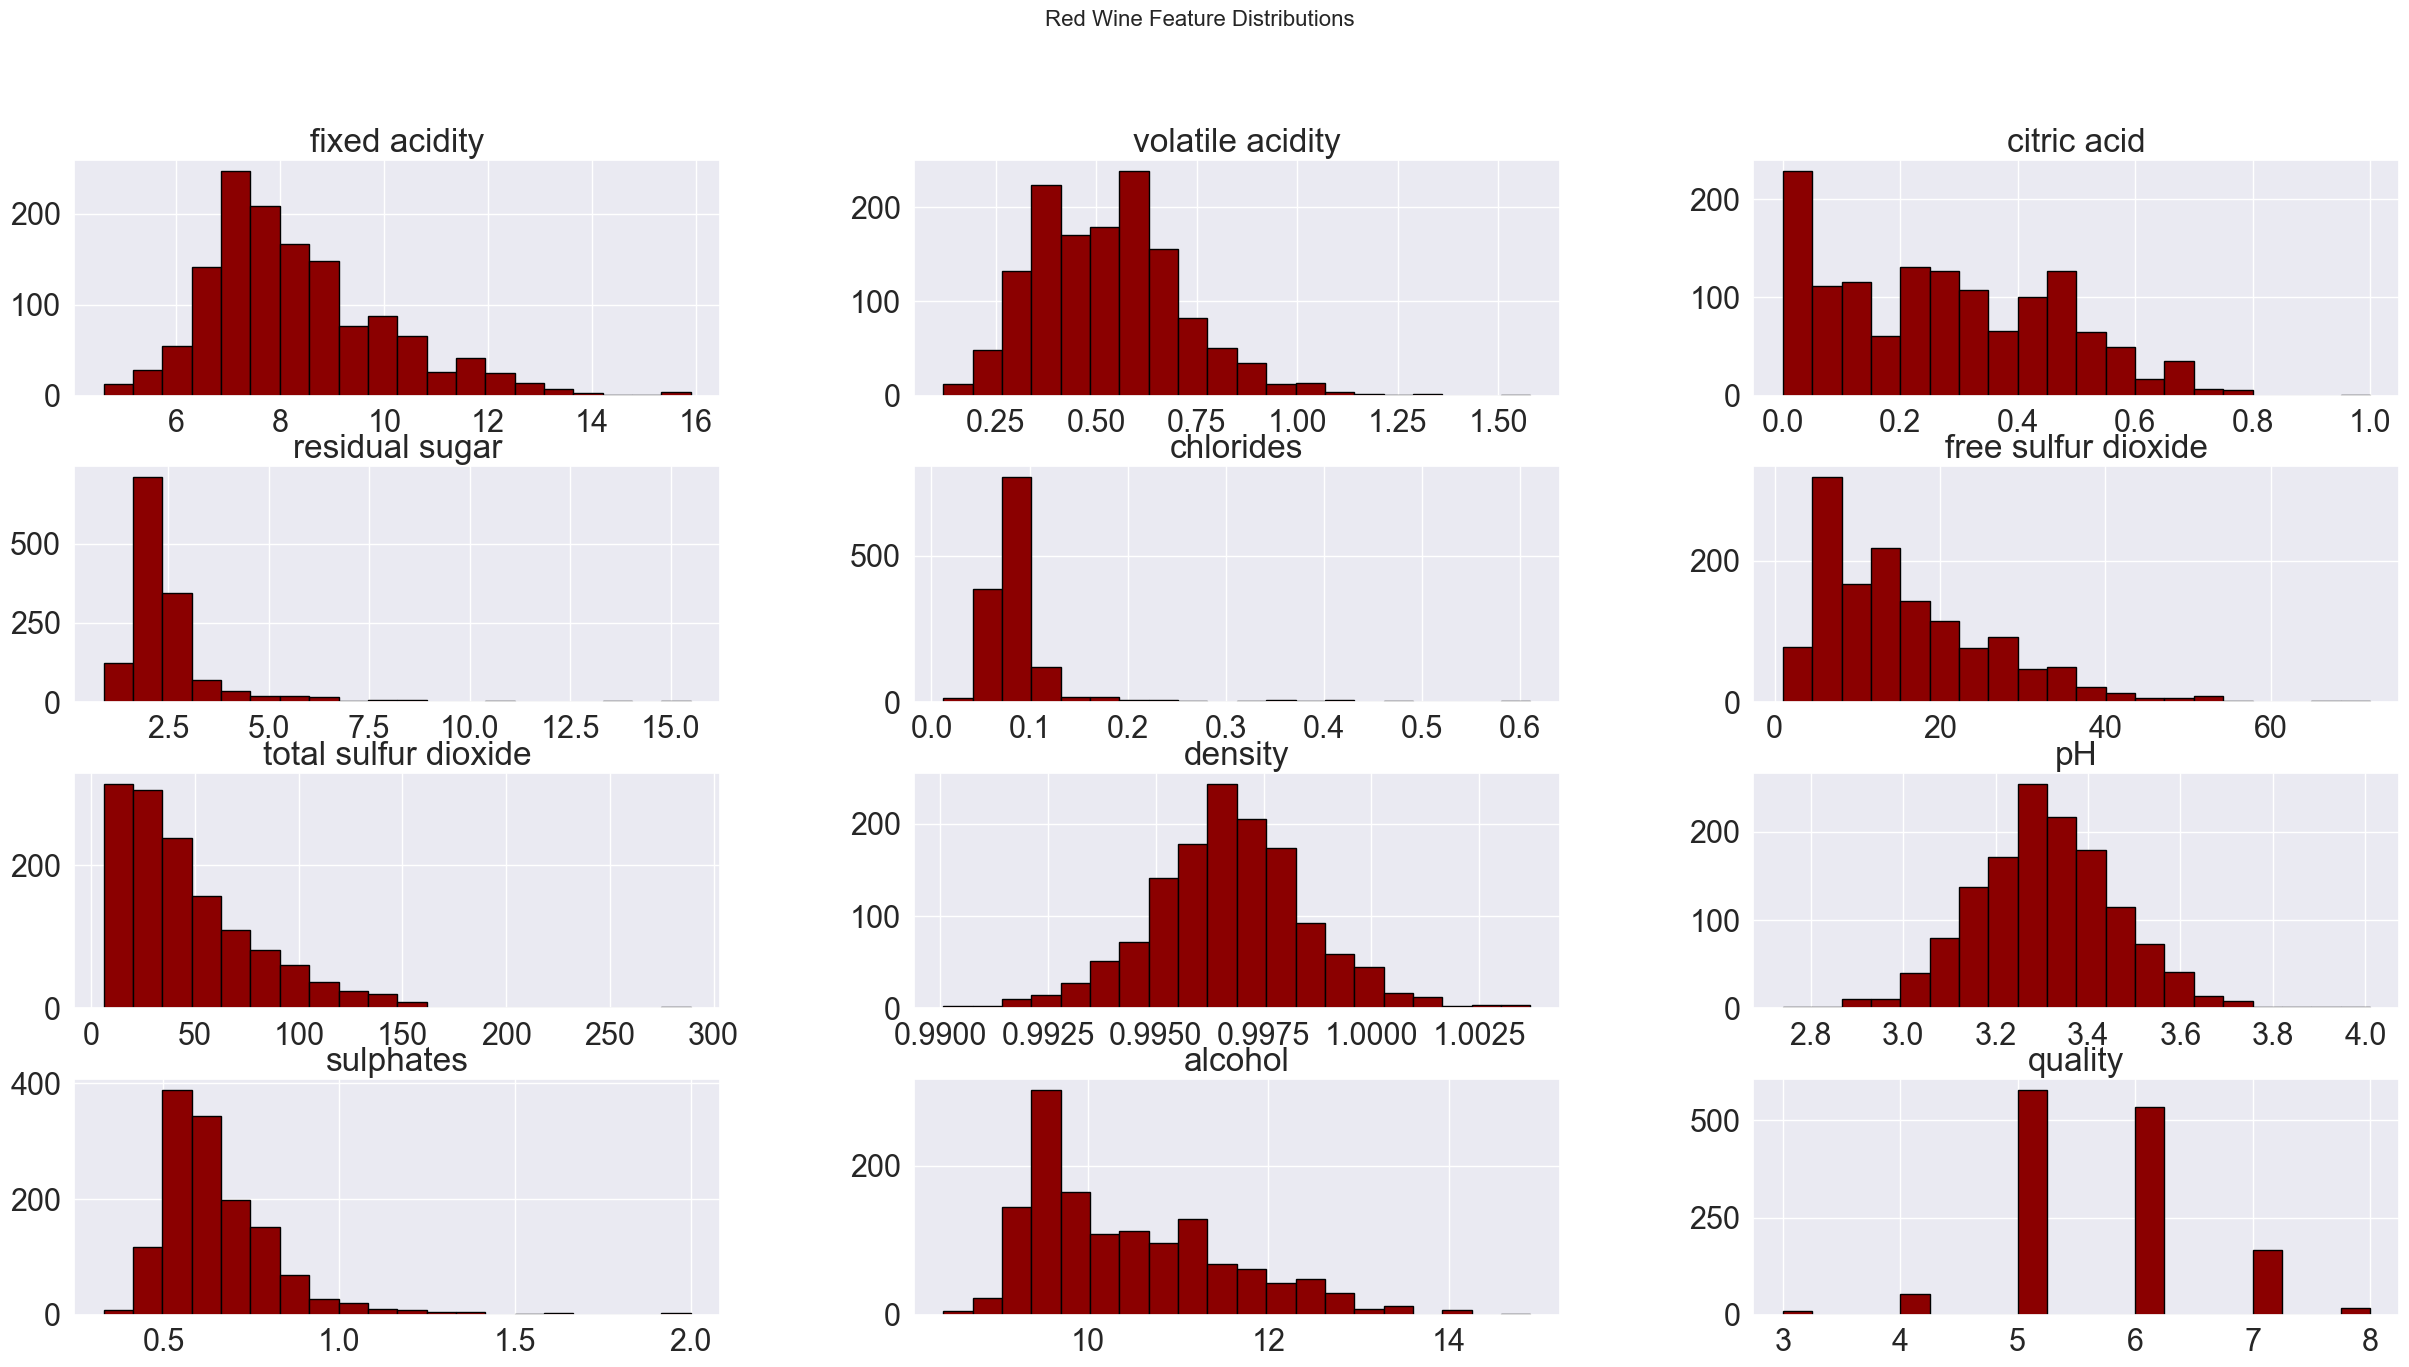

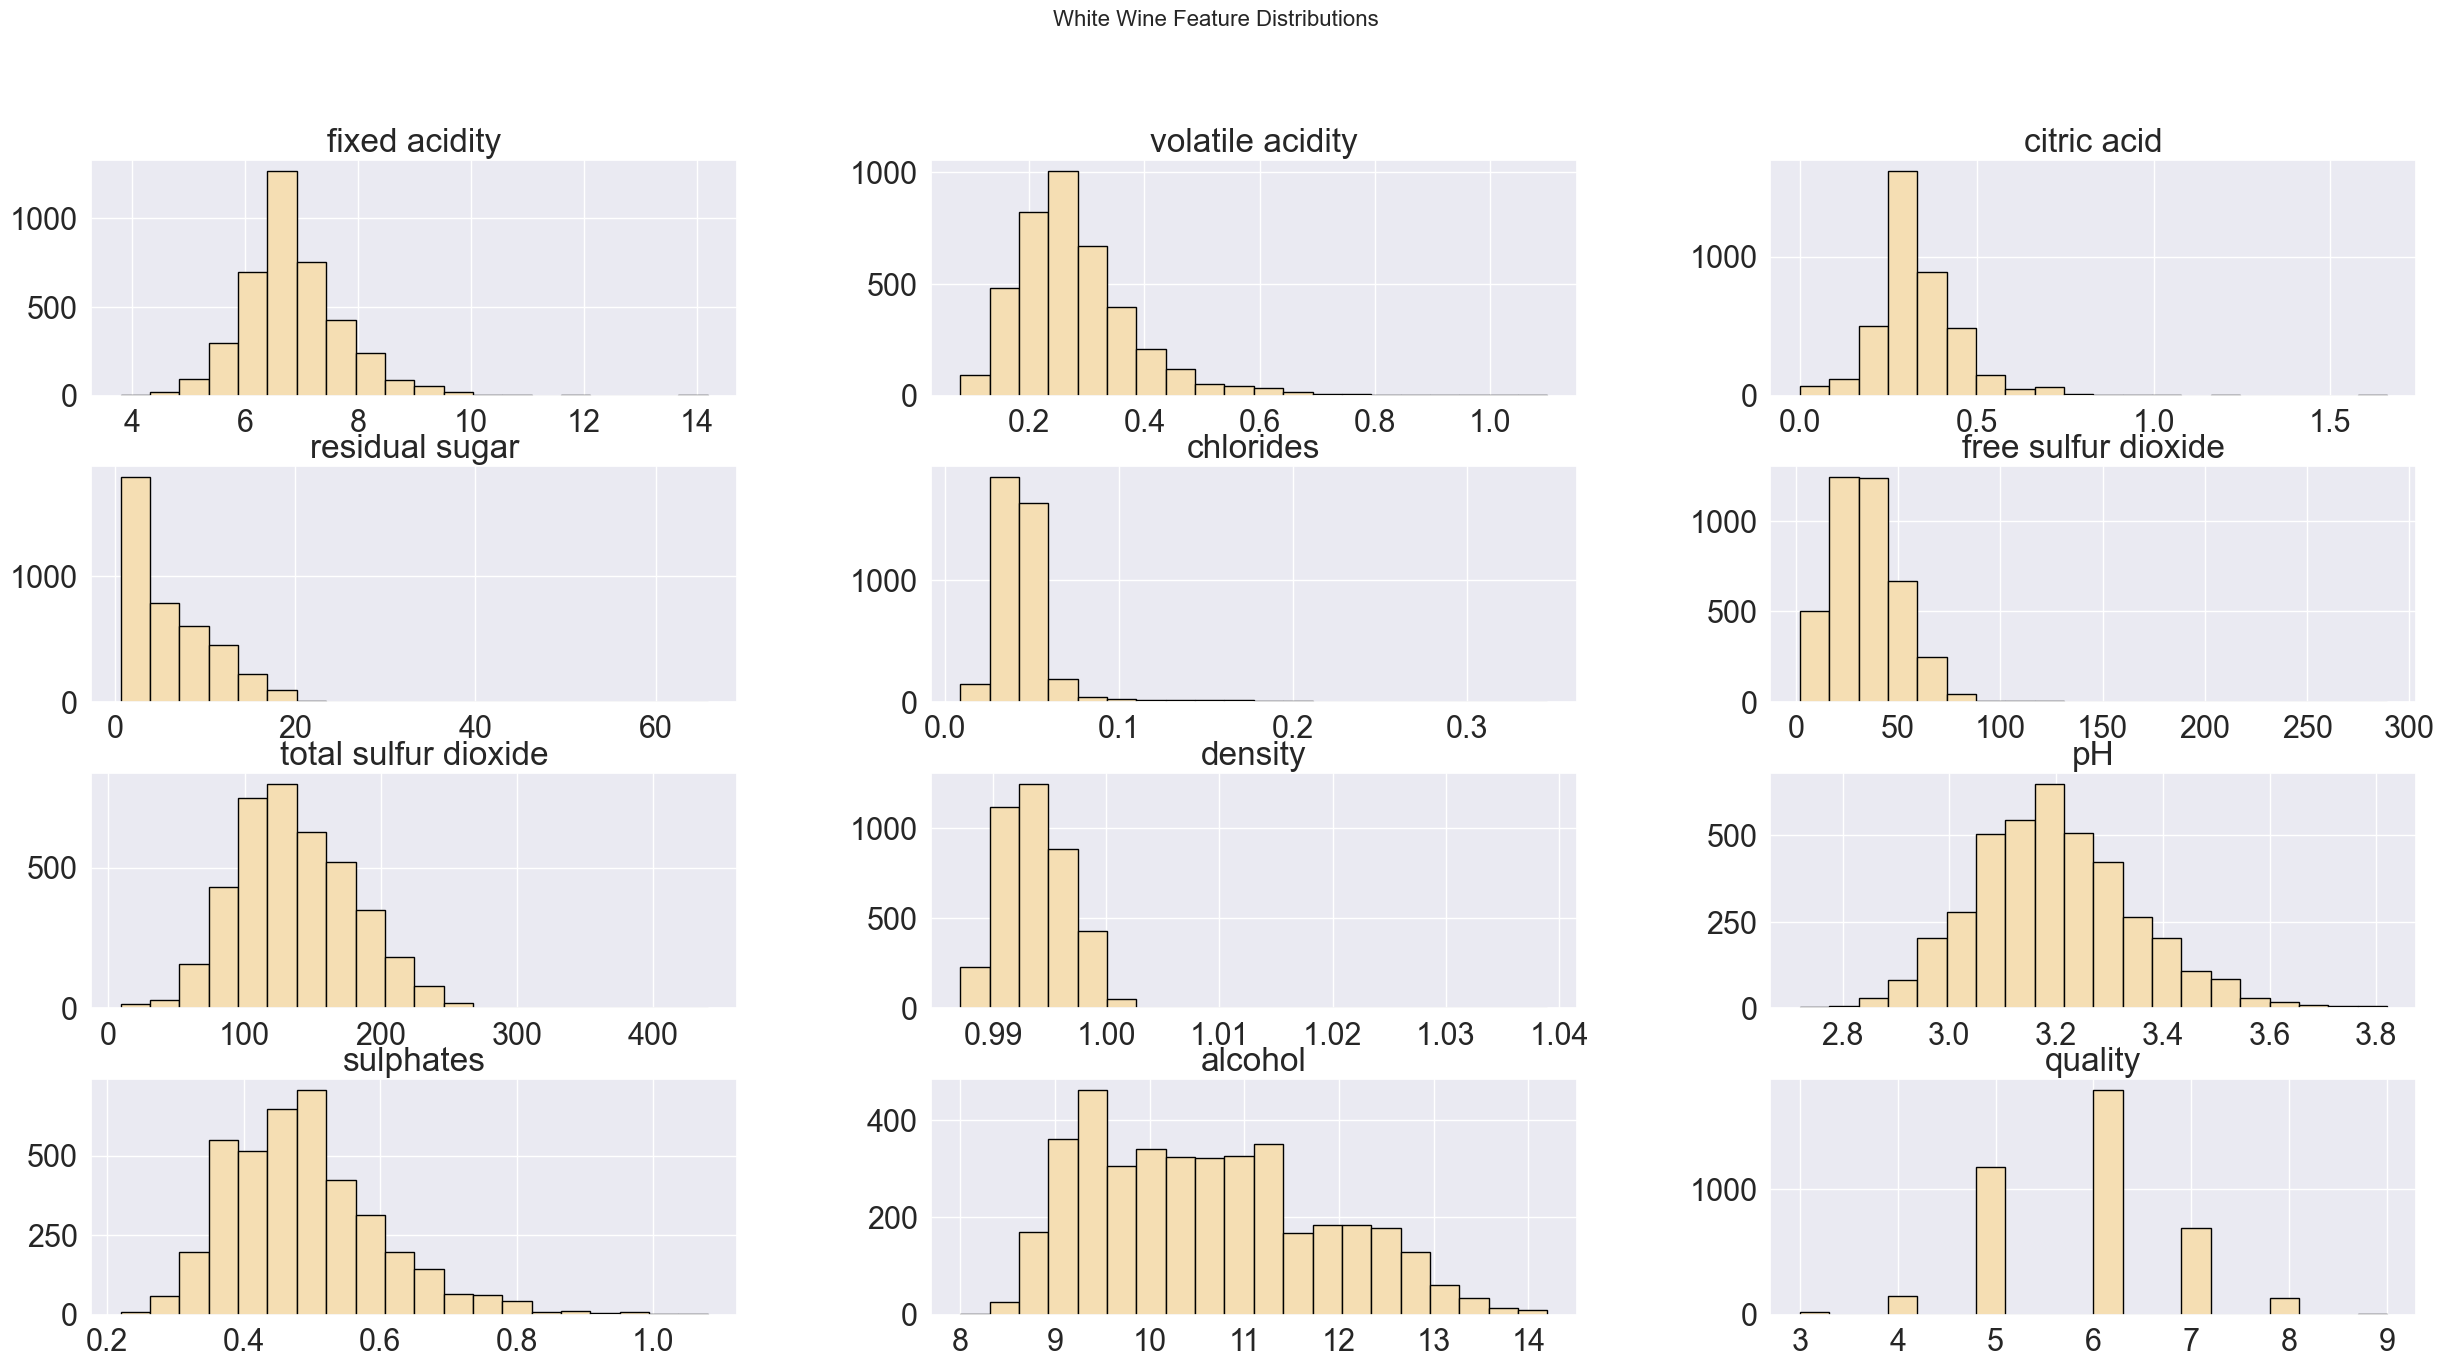

In [292]:
# Feature Distribution check
red_wine.hist(figsize=(30, 15), bins=20, color='#8B0000', edgecolor='black')
plt.suptitle("Red Wine Feature Distributions", fontsize=16)
plt.show()

white_wine.hist(figsize=(30, 15), bins=20, color='#F5DEB3', edgecolor='black')
plt.suptitle("White Wine Feature Distributions", fontsize=16)
plt.show()

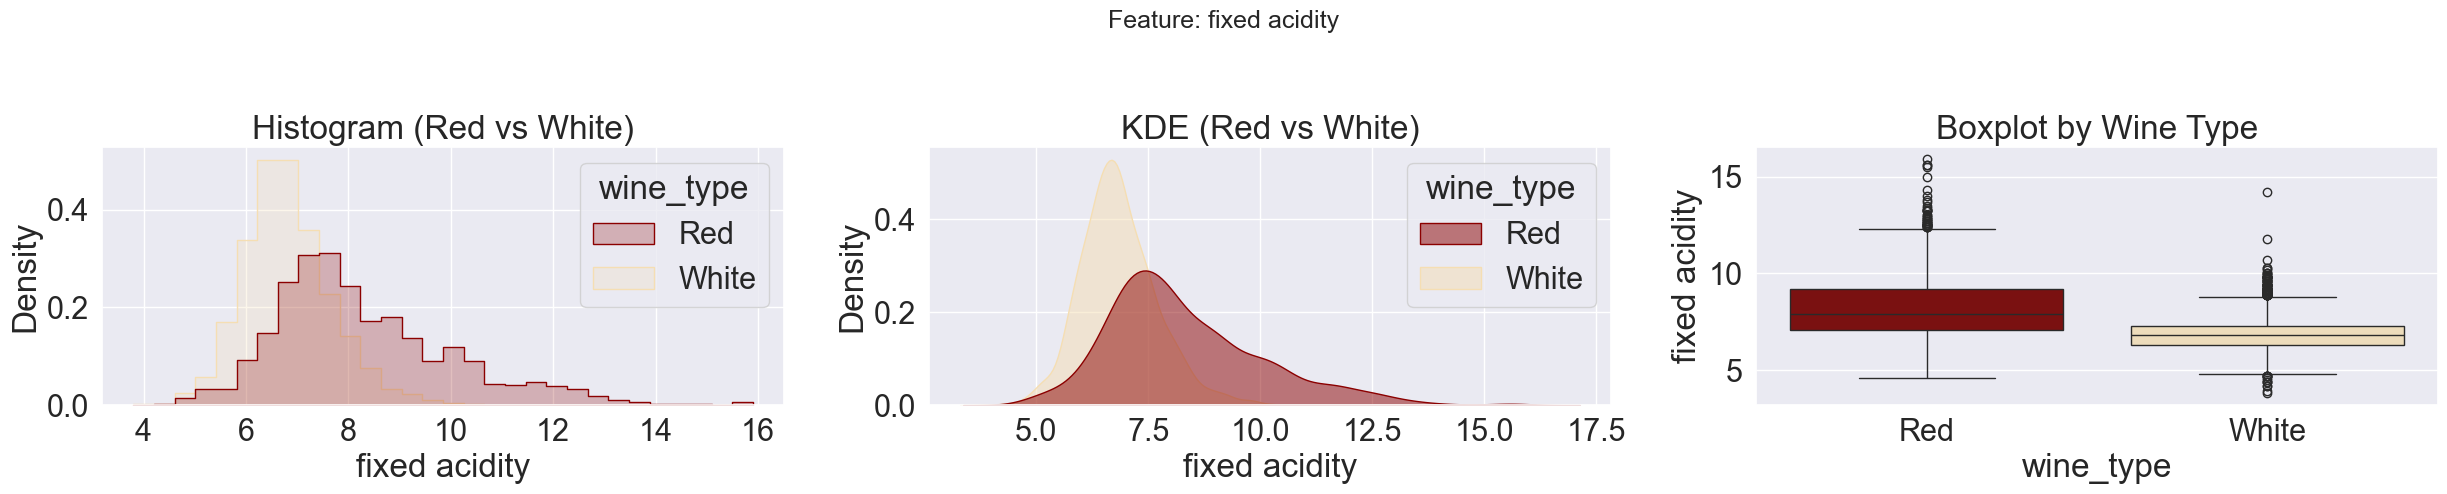

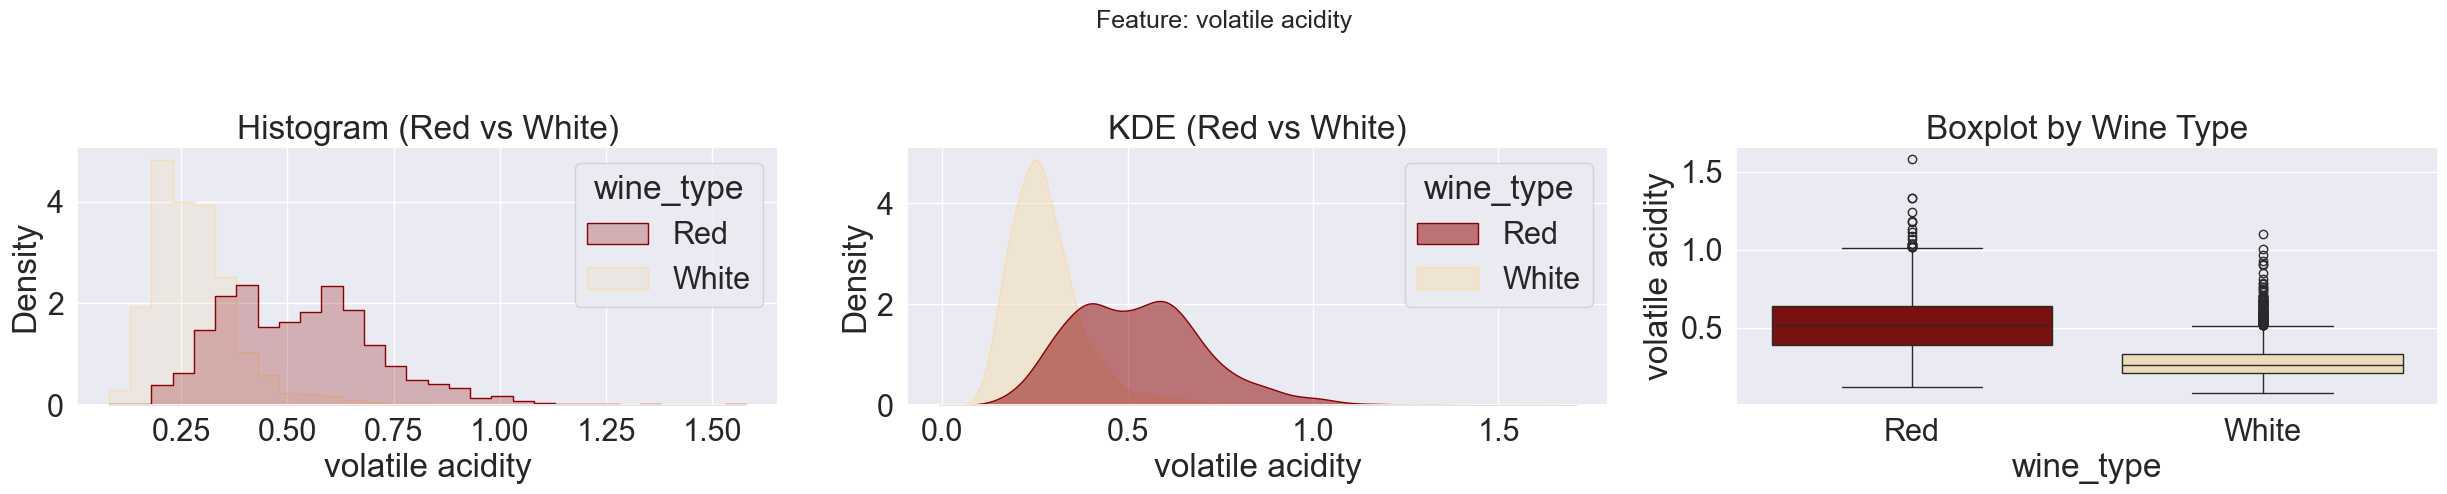

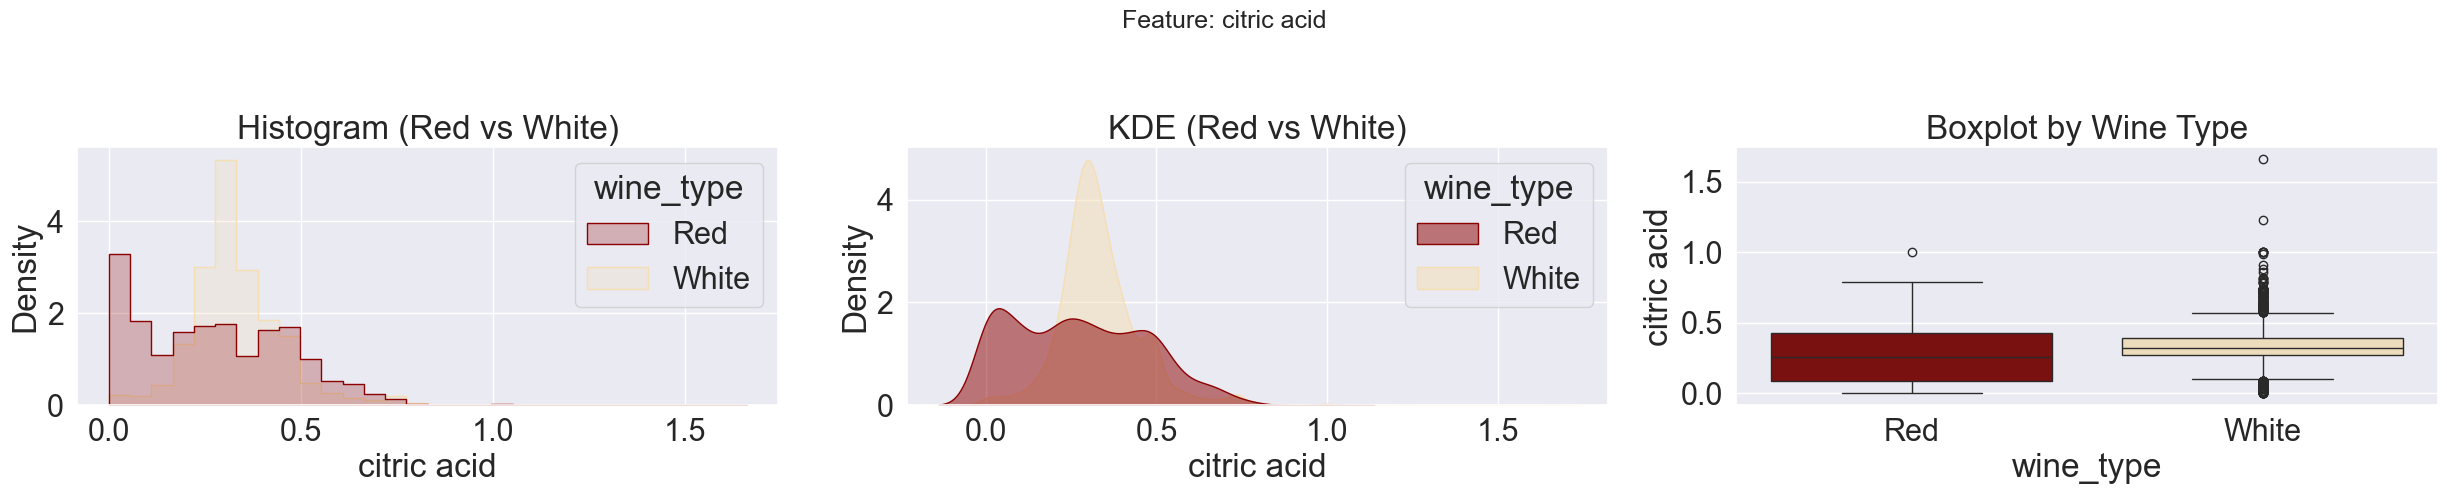

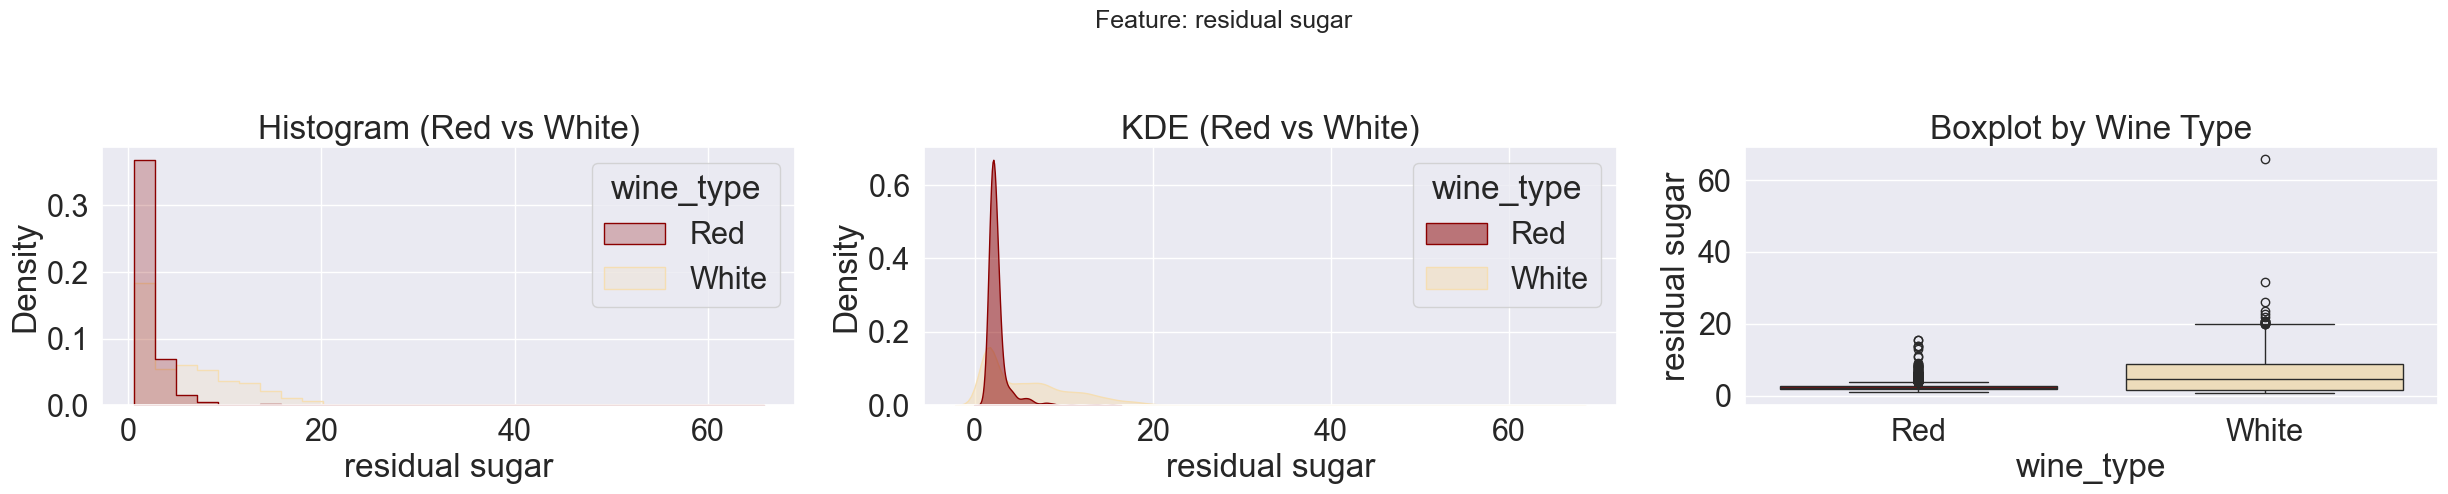

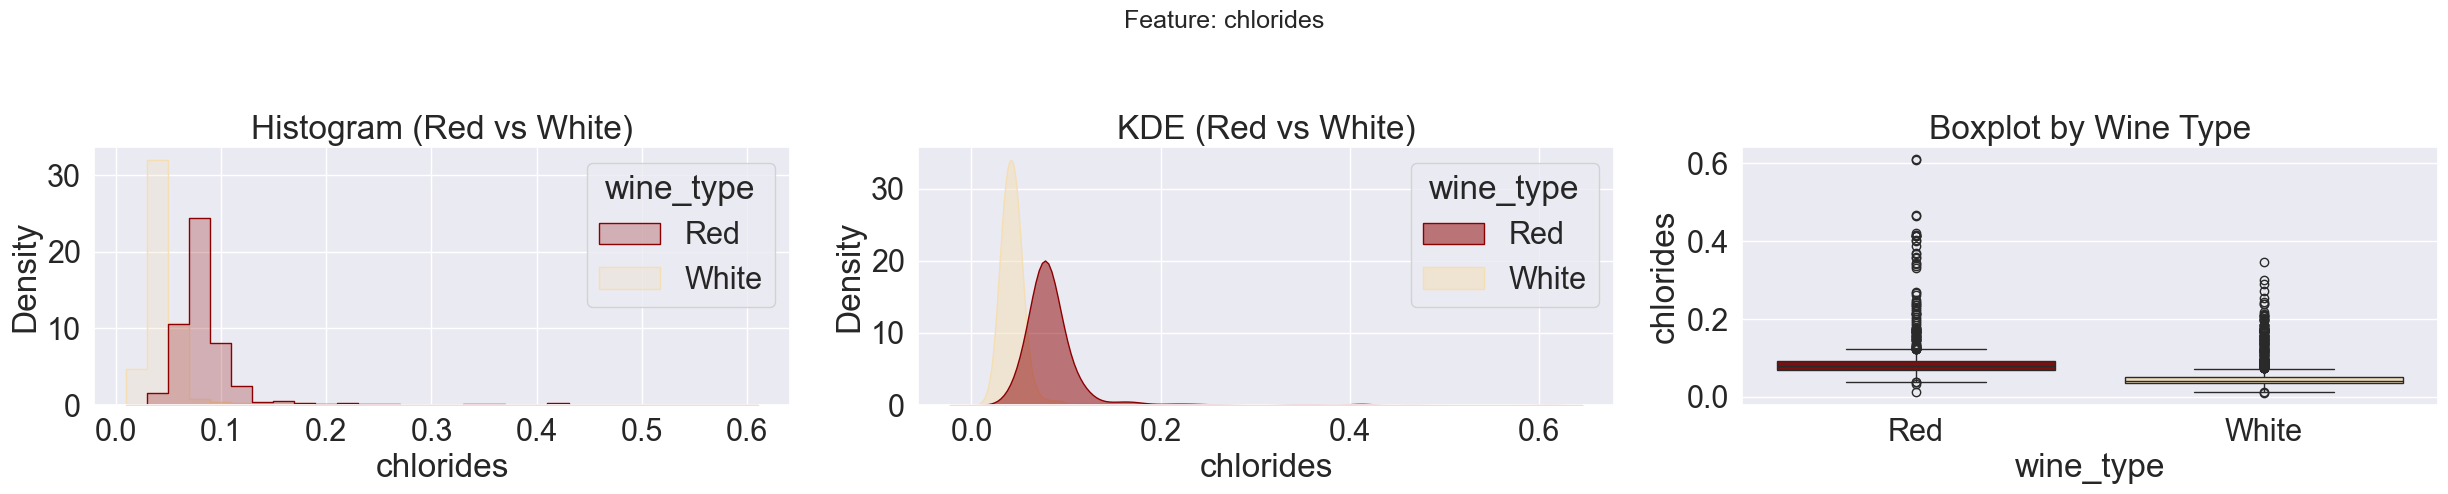

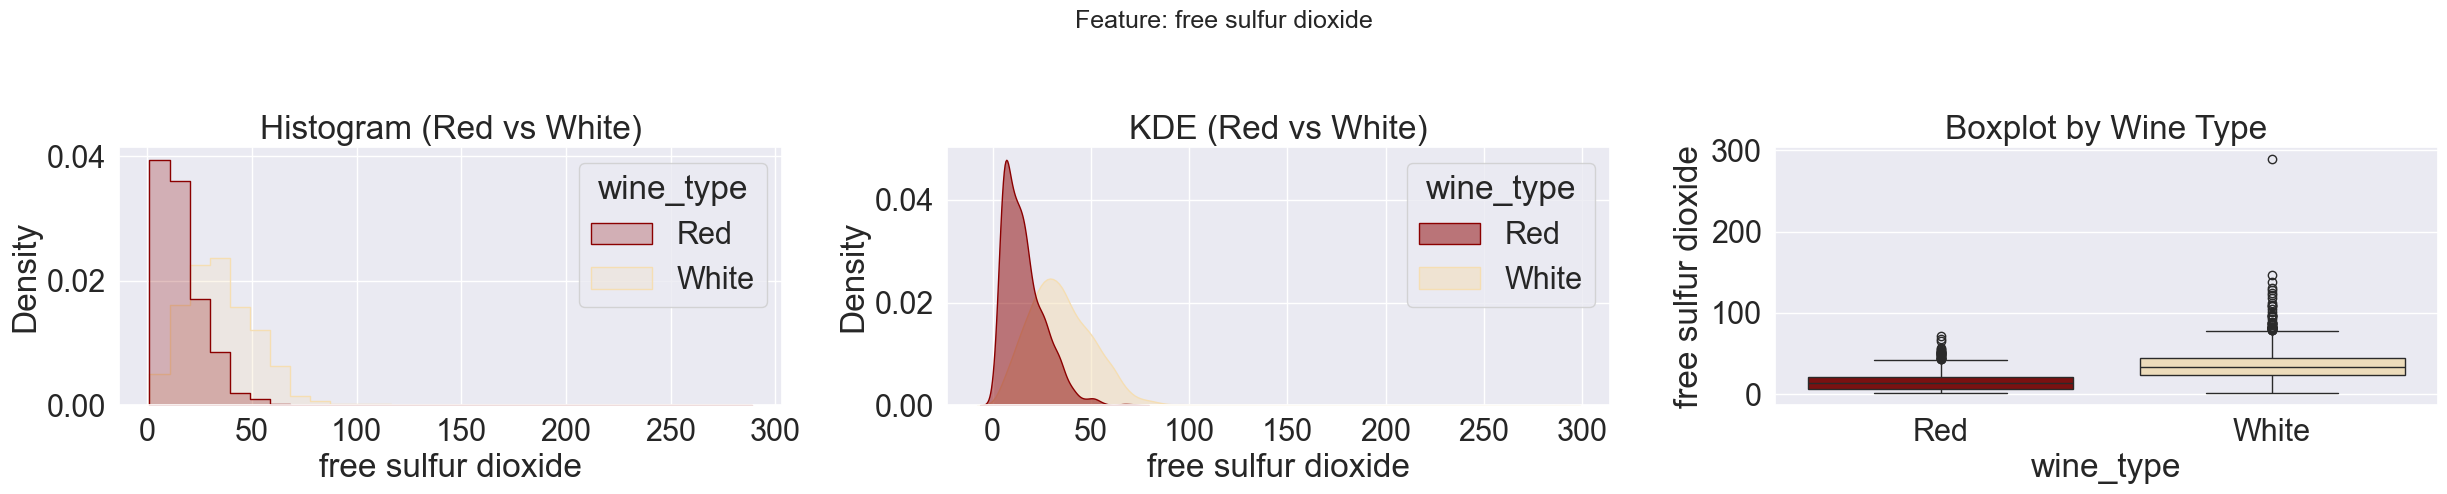

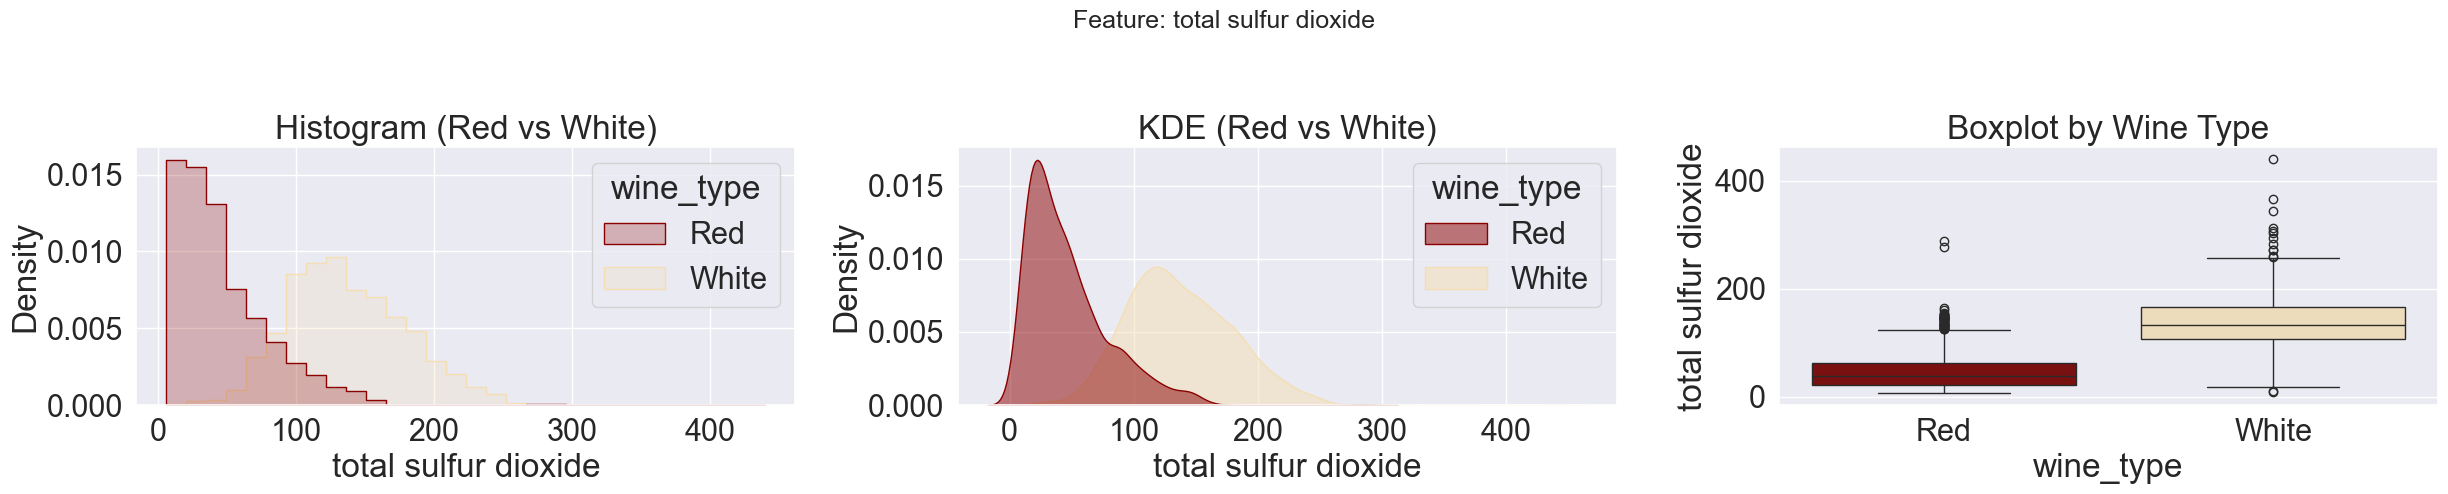

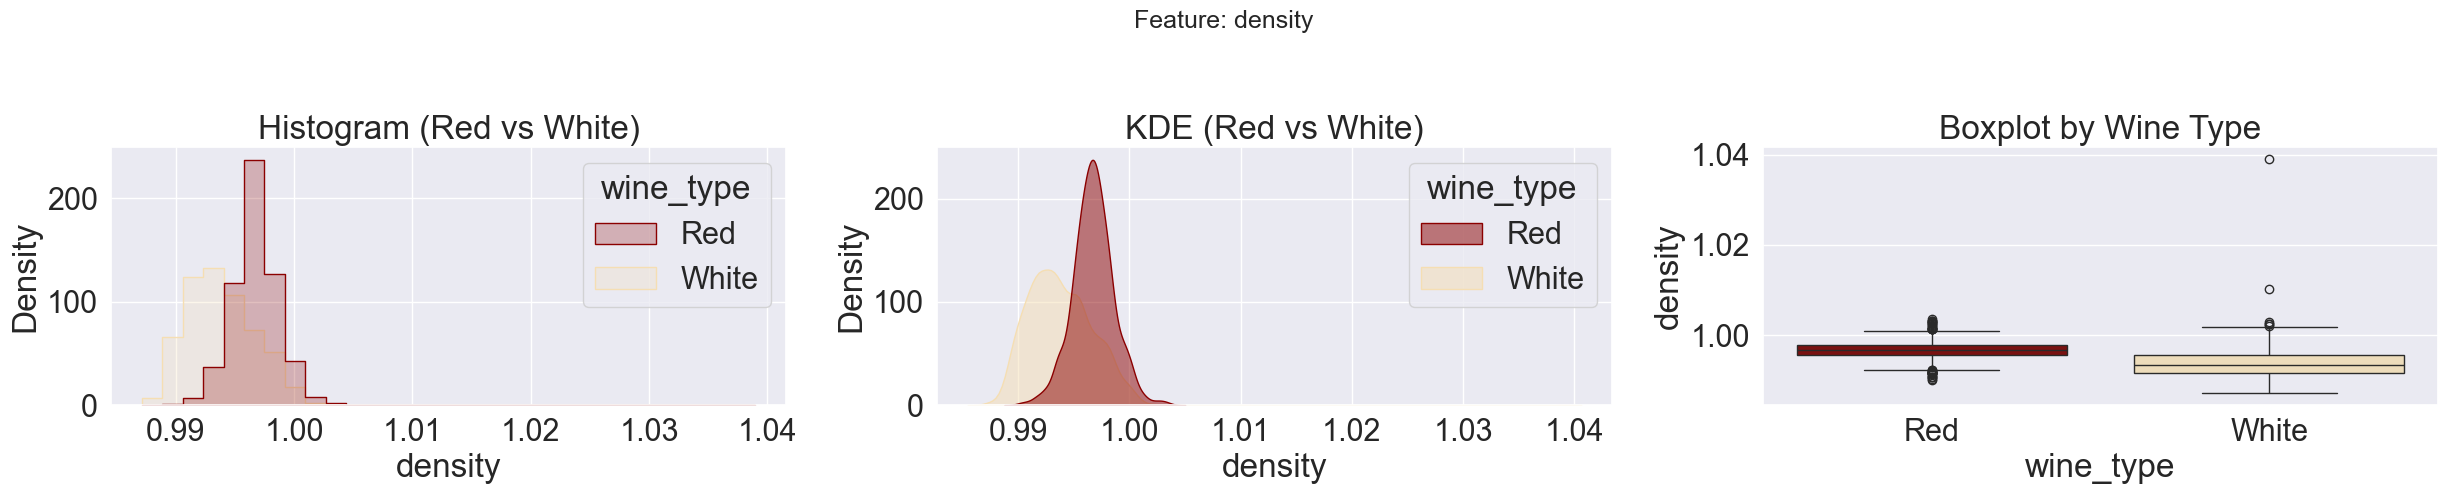

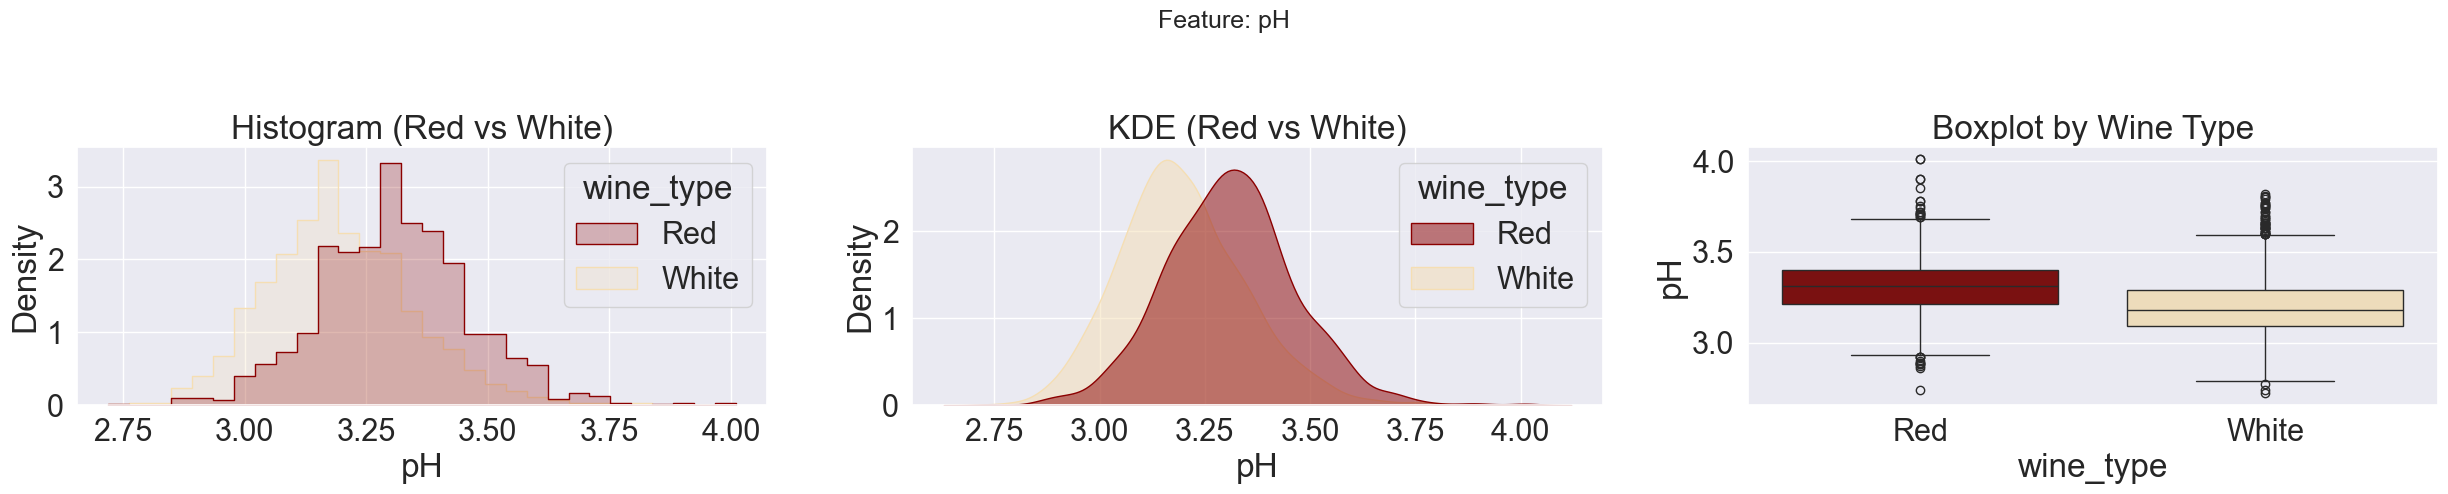

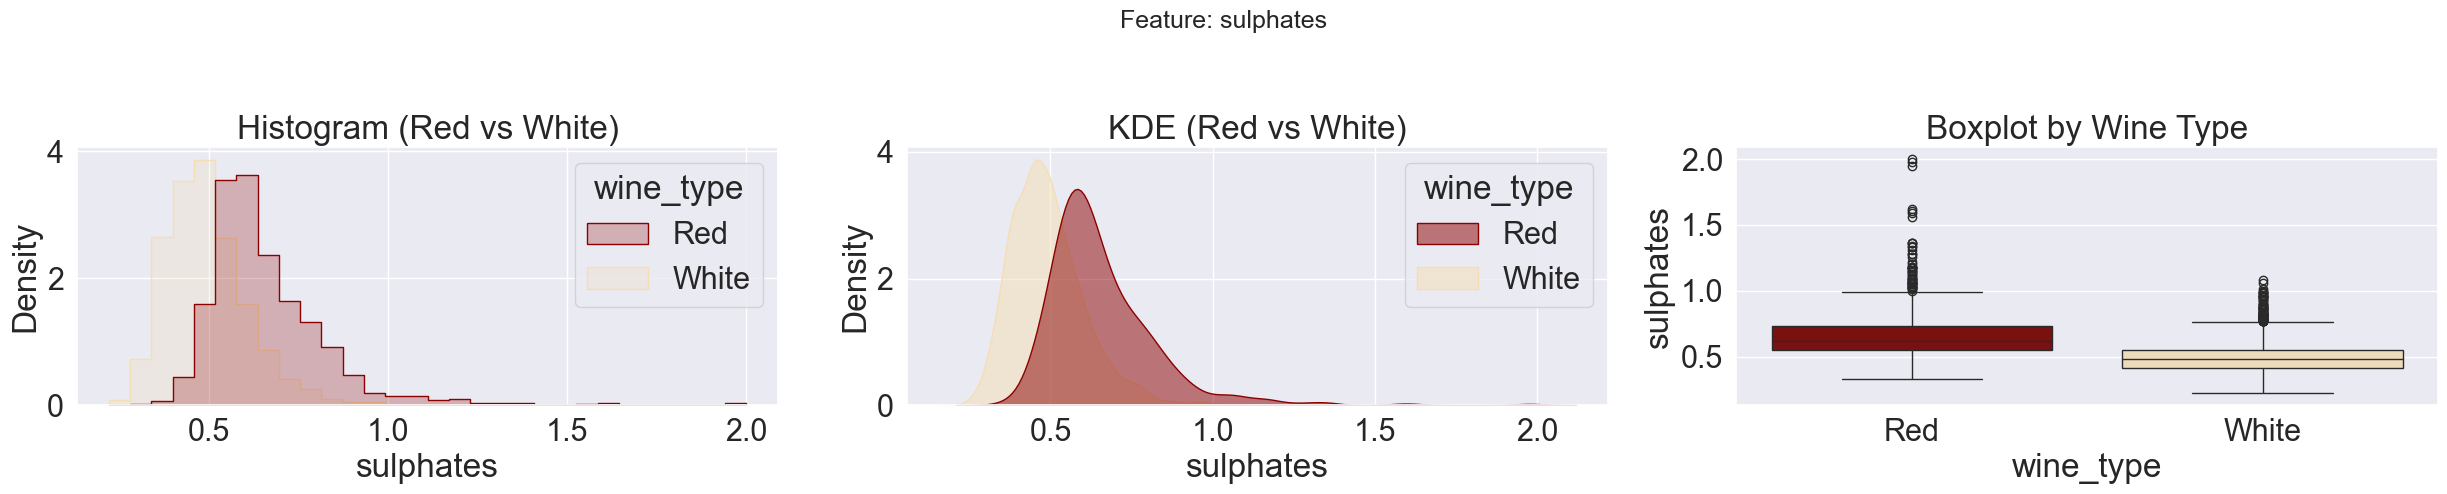

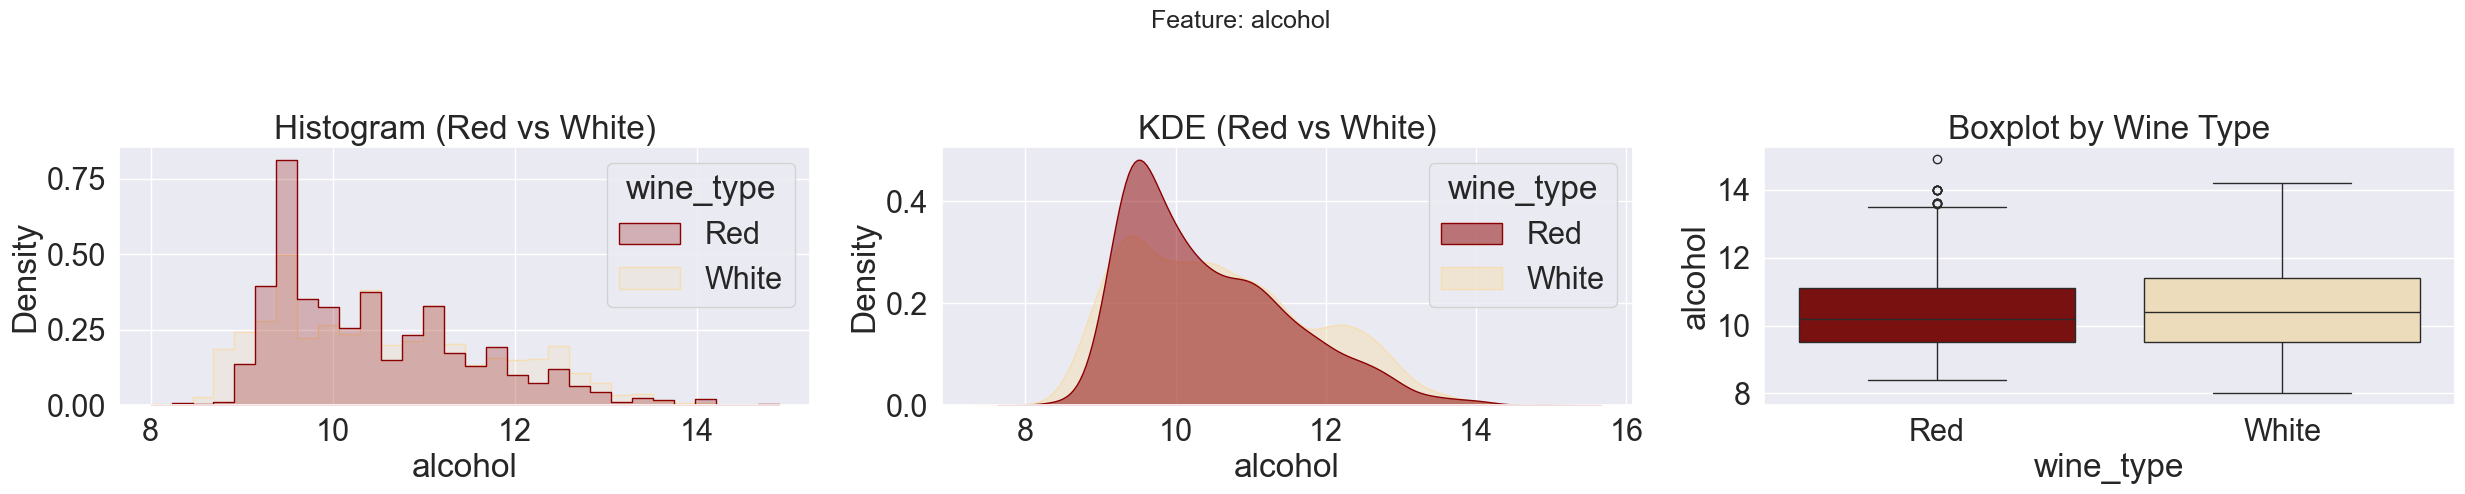

In [293]:
# Explorartory Data Analysis (EDA)

# Feature Understanding
df_red = red_wine.copy()
df_white = white_wine.copy()

df_red['wine_type'] = 'Red'
df_white['wine_type'] = 'White'

# Combine datasets
combined_wine = pd.concat([df_red, df_white], axis=0)

numeric_features = combined_wine.select_dtypes(include=['float64', 'int64']).drop(columns=['quality']).columns

colors = {'Red': '#8B0000', 'White': '#F5DEB3'}

for feature in numeric_features:
    fig, axes = plt.subplots(1, 3, figsize=(25, 5))
    fig.suptitle(f"Feature: {feature}", fontsize=18, y=1.02)

    # Histogram
    seaborn.histplot(
        data=combined_wine, x=feature, hue='wine_type', bins=30, ax=axes[0],
        palette=colors, element="step", stat="density", common_norm=False
    )
    axes[0].set_title("Histogram (Red vs White)")

    # KDE Plot
    seaborn.kdeplot(
        data=combined_wine, x=feature, hue='wine_type', ax=axes[1],
        fill=True, common_norm=False, palette=colors, alpha=0.5
    )
    axes[1].set_title("KDE (Red vs White)")

    # Boxplot 
    seaborn.boxplot(
        data=combined_wine, x='wine_type', y=feature, hue='wine_type',
        ax=axes[2], palette=colors, legend=False
    )
    axes[2].set_title("Boxplot by Wine Type")

    plt.tight_layout()
    plt.show()

Skewness Summary:
                   Column  Skewness      Skew Category
0              chlorides      5.34     Heavily Skewed
1              sulphates      1.81     Heavily Skewed
2         residual sugar      1.71     Heavily Skewed
3          fixed acidity      1.65     Heavily Skewed
4       volatile acidity      1.50     Heavily Skewed
5    free sulfur dioxide      1.36     Heavily Skewed
6                density      0.67  Moderately Skewed
7                alcohol      0.55  Moderately Skewed
8            citric acid      0.48       Light Skewed
9                     pH      0.39       Light Skewed
10               quality      0.15       Light Skewed
11  total sulfur dioxide      0.06       Light Skewed


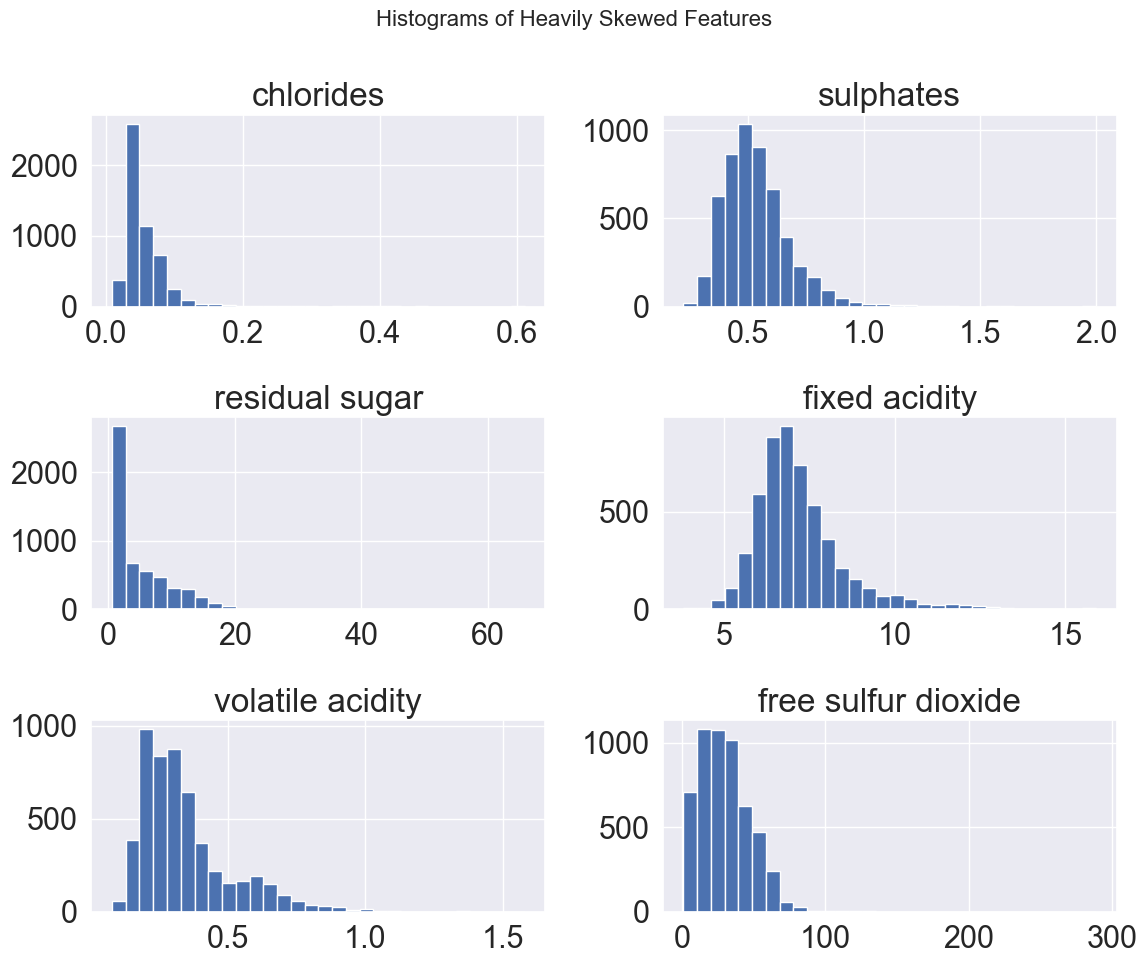

In [294]:
# Function to compute skewness and categorize
def skewness_check(data):
    skew_value = list(st.skew(data, nan_policy='omit'))
    skew_category = []

    for skew in skew_value:
        if -0.5 <= skew <= 0.5:
            skew_category.append("Light Skewed")
        elif -1 <= skew < -0.5 or 0.5 < skew <= 1:
            skew_category.append("Moderately Skewed")
        else:
            skew_category.append("Heavily Skewed")

    skew_df = pd.DataFrame({
        'Column': data.columns,
        'Skewness': skew_value,
        'Skew Category': skew_category
    })
    
    return skew_df.sort_values(by='Skewness', key=abs, ascending=False).reset_index(drop=True)

# Skewness analysis for combined_wine numeric features
numeric_cols = combined_wine.select_dtypes(include=[np.number])
skew_df = skewness_check(numeric_cols)

# Display skewness table
print("Skewness Summary:\n", skew_df)

# Filter and plot histograms for heavily skewed features only
heavily_skewed = skew_df[skew_df['Skew Category'] == "Heavily Skewed"]['Column']
combined_wine[heavily_skewed].hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Heavily Skewed Features", fontsize=16)
plt.tight_layout()
plt.show()

In [295]:

def boxcox_transform_skewed(df, skewness_threshold=0.5):
    transformed_df = df.copy()
    lambdas = {}
    for col in df.columns:
        skew = df[col].skew()
        if abs(skew) > skewness_threshold and (df[col] > 0).all():
            transformed_df[col], lam = st.boxcox(df[col])
            lambdas[col] = lam
            print(f"Applying Box-Cox on '{col}' with skewness {skew:.2f}")
        else:
            print(f"Skipping '{col}' (skewness: {skew:.2f})")
    return transformed_df, lambdas

numeric_cols = combined_wine.select_dtypes(include=[np.number]).columns
predictors = combined_wine[numeric_cols].drop(columns='quality')
transformed_predictors, lambda_dict = boxcox_transform_skewed(predictors)

skewness_check(transformed_predictors)


Applying Box-Cox on 'fixed acidity' with skewness 1.65
Applying Box-Cox on 'volatile acidity' with skewness 1.50
Skipping 'citric acid' (skewness: 0.48)
Applying Box-Cox on 'residual sugar' with skewness 1.71
Applying Box-Cox on 'chlorides' with skewness 5.34
Applying Box-Cox on 'free sulfur dioxide' with skewness 1.36
Skipping 'total sulfur dioxide' (skewness: 0.06)
Applying Box-Cox on 'density' with skewness 0.67
Skipping 'pH' (skewness: 0.39)
Applying Box-Cox on 'sulphates' with skewness 1.81
Applying Box-Cox on 'alcohol' with skewness 0.55


Column  Skewness Skew Category
0            citric acid      0.48  Light Skewed
1                     pH      0.39  Light Skewed
2         residual sugar      0.09  Light Skewed
3   total sulfur dioxide      0.06  Light Skewed
4                alcohol      0.06  Light Skewed
5              chlorides     -0.06  Light Skewed
6          fixed acidity     -0.05  Light Skewed
7    free sulfur dioxide     -0.04  Light Skewed
8                density     -0.02  Light Skewed
9       volatile acidity      0.01  Light Skewed
10             sulphates     -0.01  Light Skewed

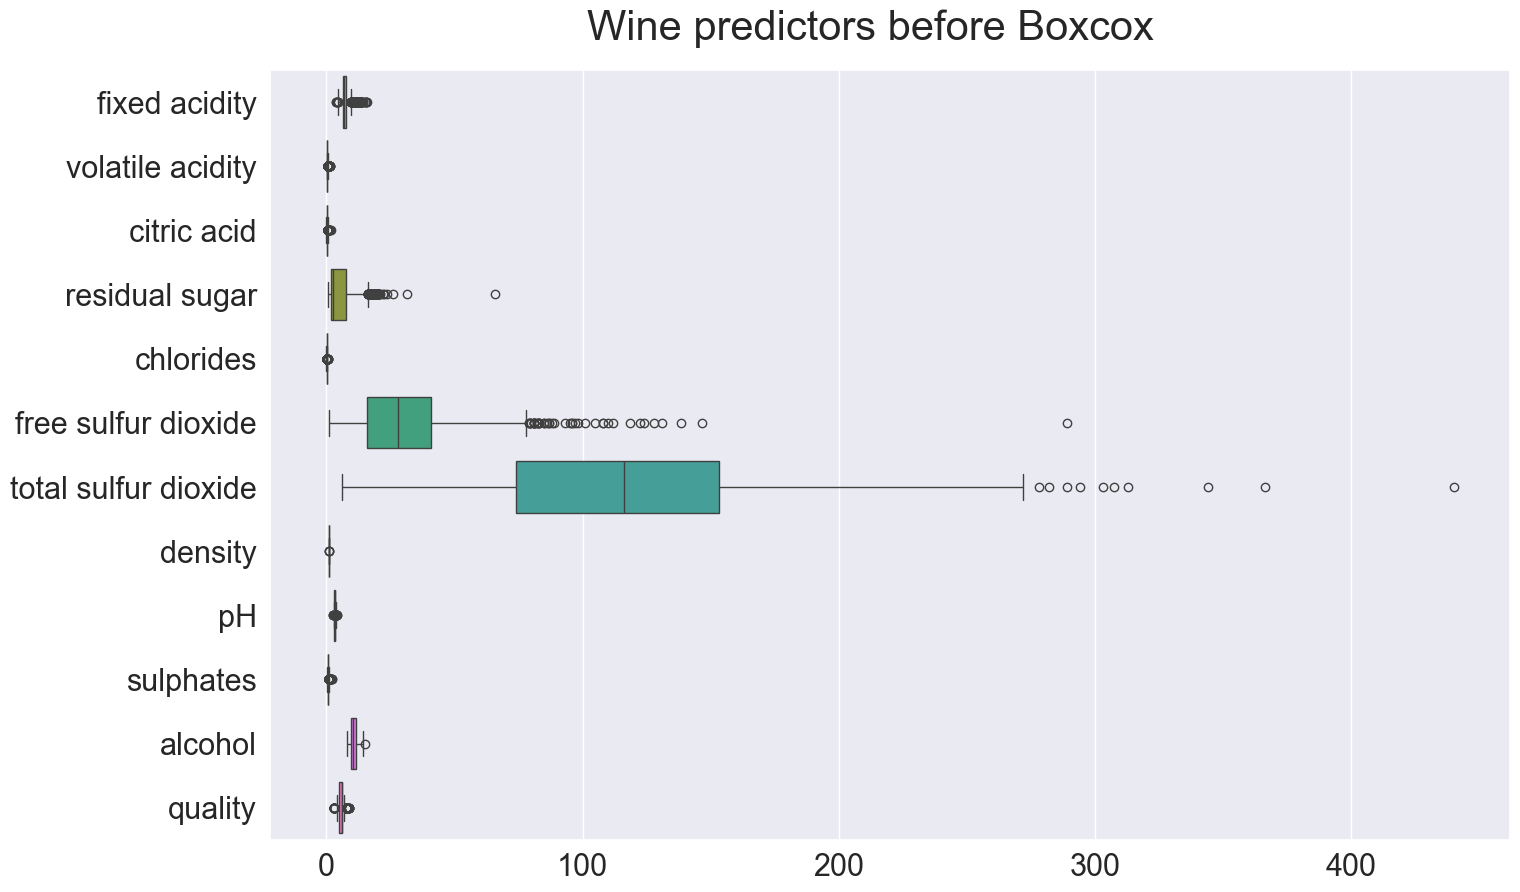

In [296]:
def box_plot(data, height = 10, width = 16, title = "Boxplot"):
    plt.figure(figsize=(width, height))
    plt.suptitle(title, y = 0.94, fontsize = 30)
    seaborn.set(font_scale = 2)
    seaborn.boxplot(data = data, orient = "h")

box_plot(data = combined_wine, title = "Wine predictors before Boxcox")

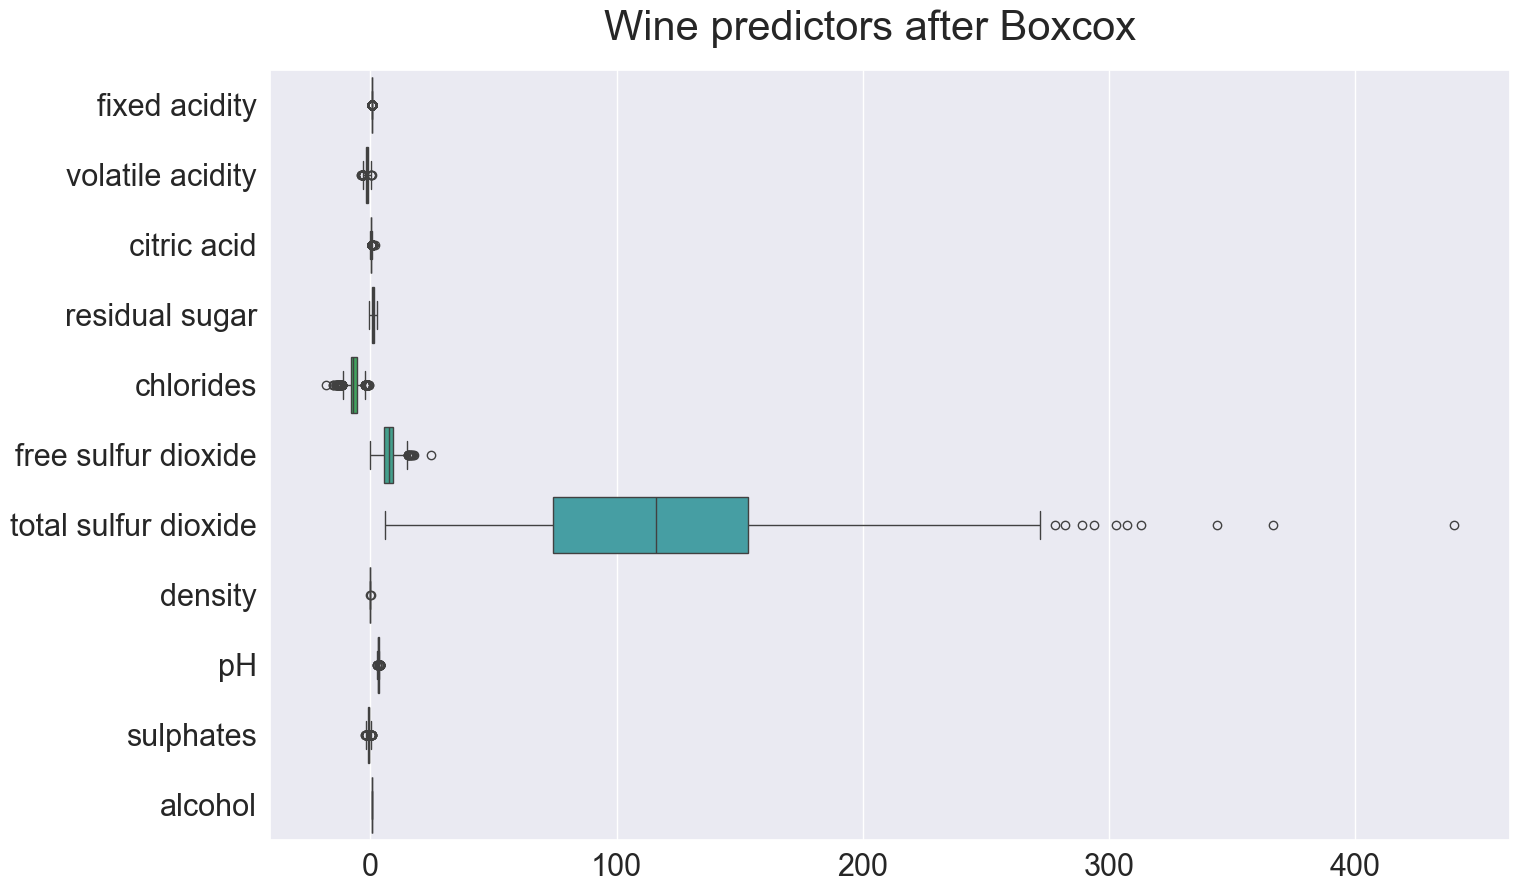

In [297]:

box_plot(data = transformed_predictors, title = "Wine predictors after Boxcox")

Task 1, Part A - Describe the distribution of wine quality across all samples, separately for red and white, and compare the quality distributions between reds and whites. Create suitable plots to illustrate.

In [298]:

print("Red Wine Quality: ")
print(red_wine['quality'].value_counts(normalize=True).sort_index())

print("\nWhite Wine Quality: ")
print(white_wine['quality'].value_counts(normalize=True).sort_index())


Red Wine Quality: 
quality
3   0.01
4   0.04
5   0.42
6   0.39
7   0.12
8   0.01
Name: proportion, dtype: float64

White Wine Quality: 
quality
3   0.01
4   0.04
5   0.30
6   0.45
7   0.17
8   0.03
9   0.00
Name: proportion, dtype: float64


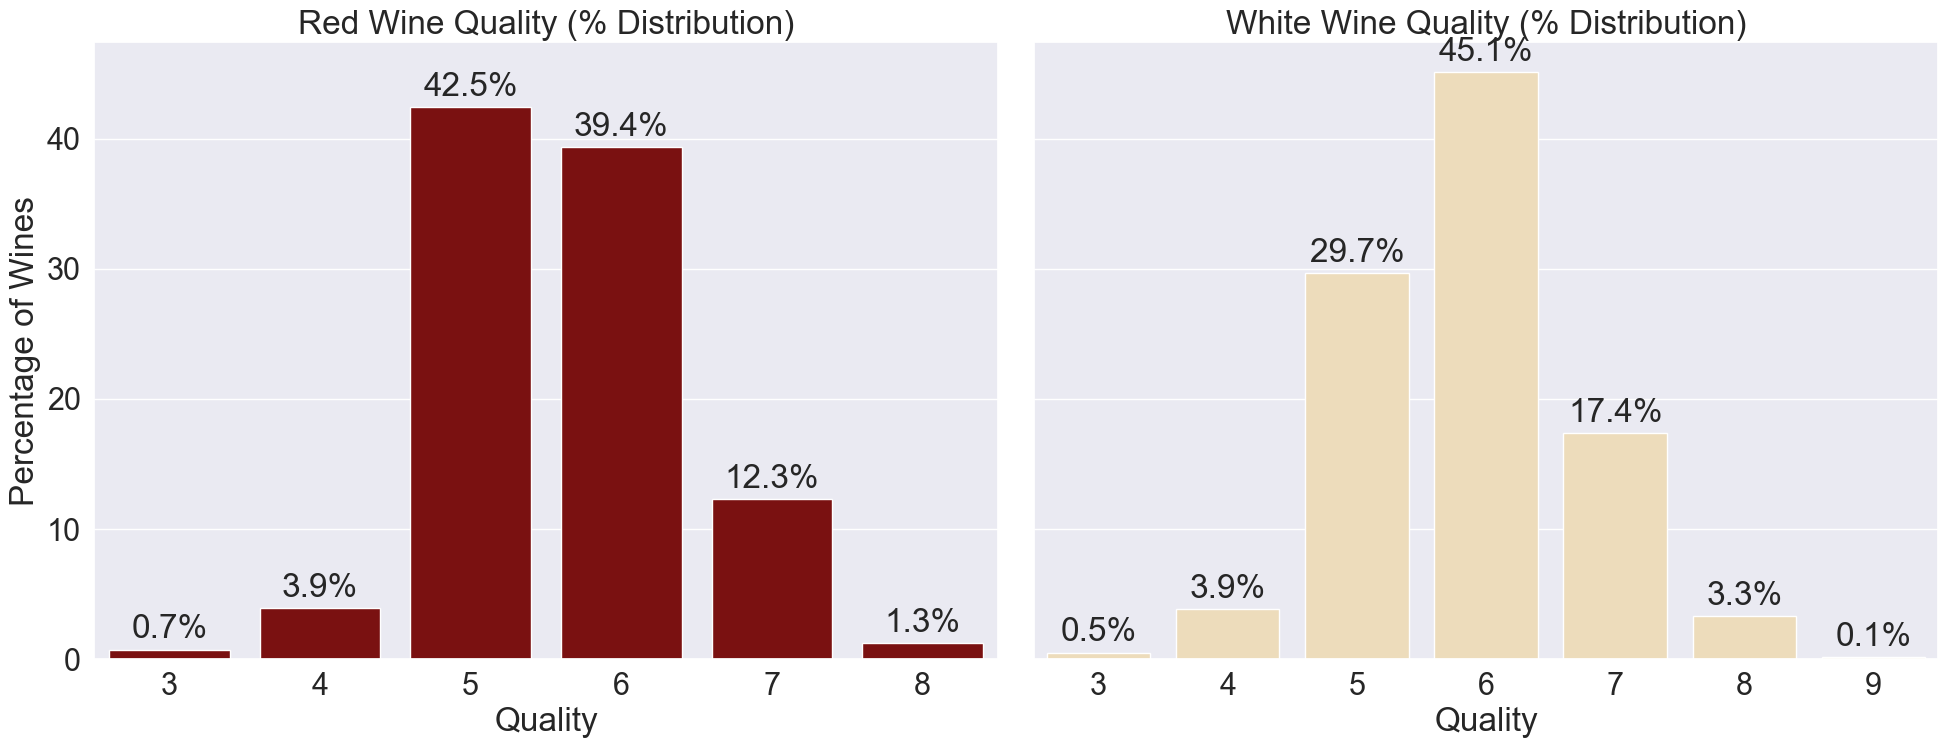

In [299]:
# Calculate percentage distribution for red wine
red_quality_counts = red_wine['quality'].value_counts(normalize=True).sort_index() * 100
red_quality_df = red_quality_counts.reset_index()
red_quality_df.columns = ['quality', 'percentage']

# Calculate percentage distribution for white wine
white_quality_counts = white_wine['quality'].value_counts(normalize=True).sort_index() * 100
white_quality_df = white_quality_counts.reset_index()
white_quality_df.columns = ['quality', 'percentage']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Red wine plot
seaborn.barplot(data=red_quality_df, x='quality', y='percentage', ax=axes[0], color='#8B0000')
axes[0].set_title("Red Wine Quality (% Distribution)")
axes[0].set_xlabel("Quality")
axes[0].set_ylabel("Percentage of Wines")
axes[0].bar_label(axes[0].containers[0], fmt='%.1f%%', padding=3)

# White wine plot
seaborn.barplot(data=white_quality_df, x='quality', y='percentage', ax=axes[1], color='#F5DEB3')
axes[1].set_title("White Wine Quality (% Distribution)")
axes[1].set_xlabel("Quality")
axes[1].set_ylabel("")
axes[1].bar_label(axes[1].containers[0], fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()


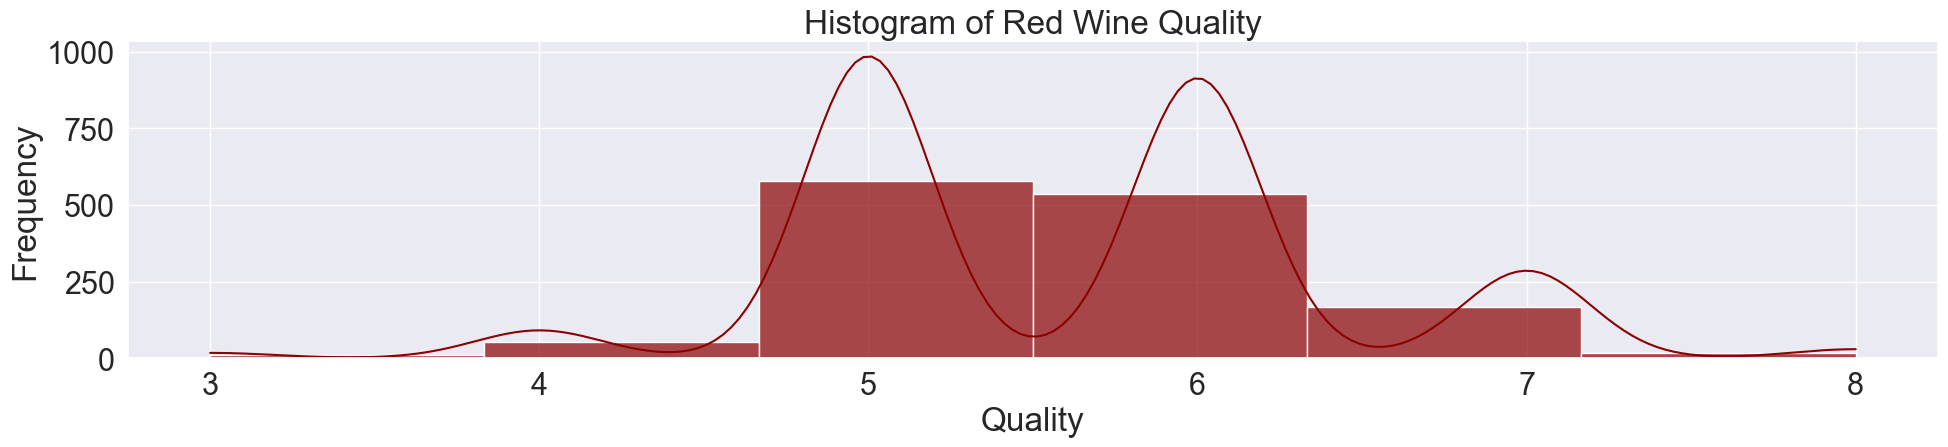

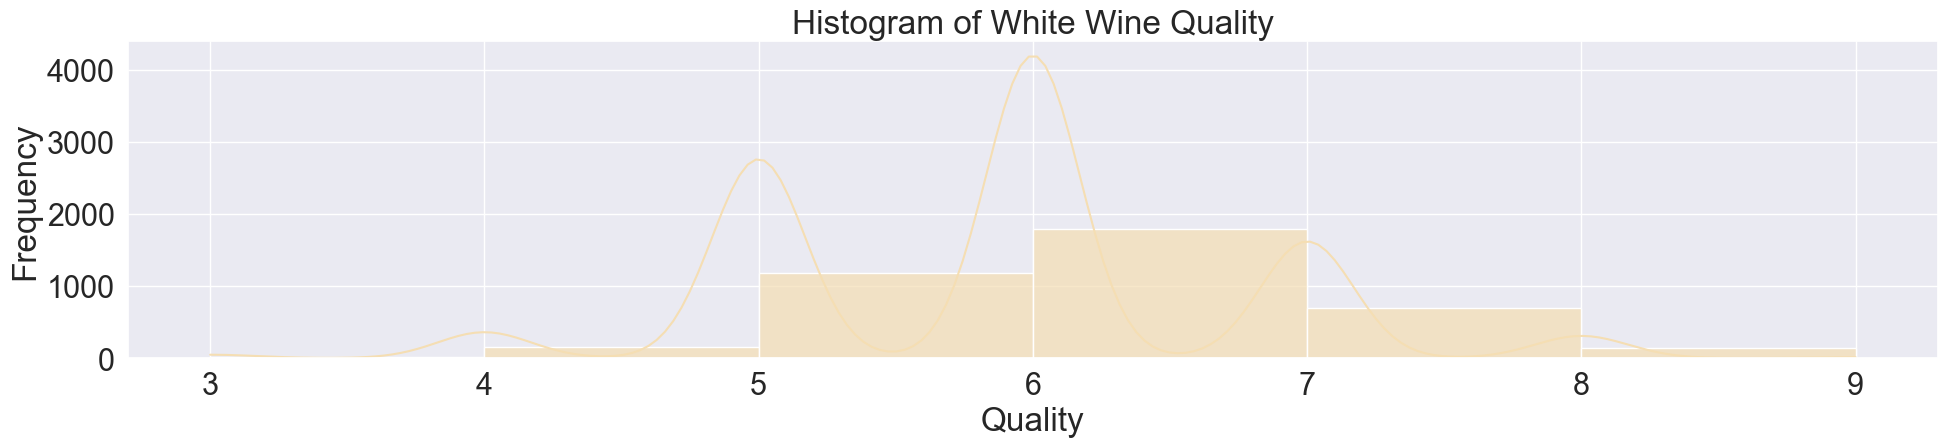

In [300]:
# Histogram for Red Wine
plt.figure(figsize=(20, 5))
seaborn.histplot(red_wine['quality'], color='#8B0000', kde=True, bins=6, alpha=0.7)
plt.title("Histogram of Red Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Histogram for White Wine
plt.figure(figsize=(20, 5))
seaborn.histplot(white_wine['quality'], color='#F5DEB3', kde=True, bins=6, alpha=0.7)
plt.title("Histogram of White Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [301]:
# Mean Quality of both wine types
print("Average quality - Red:", red_wine['quality'].mean())
print("Average quality - White:", white_wine['quality'].mean())

print("\nRed wines rated 7 or above:", (red_wine['quality'] >= 7).mean() * 100, "%")
print("White wines rated 7 or above:", (white_wine['quality'] >= 7).mean() * 100, "%")

Average quality - Red: 5.6232523914643116
Average quality - White: 5.854834637717748

Red wines rated 7 or above: 13.539367181751288 %
White wines rated 7 or above: 20.82807371875789 %


Task 1, Part B Discretise the alcohol content variables (separately for whites and reds) into low, mid, high based on its distribution. Create a 3-valued "alcohol_cat" variable to represent this. low < (average - stddev) | (average - stddev) < mid < (average + stddev) | high > (average + stddev). 

Getting the mean and standard deviation of alcohol content
Breakpoints Based on Statistics
Rule used:
low < (mean − stddev)
mid = between (mean − stddev) and (mean + stddev)
high > (mean + stddev)

In [302]:
red_alcohol_mean = red_wine['alcohol'].mean()
red_alcohol_std = red_wine['alcohol'].std()

print("Red Wine - Alcohol Mean:", round(red_alcohol_mean, 2))
print("Red Wine - Alcohol Std Dev:", round(red_alcohol_std, 2))

white_alcohol_mean = white_wine['alcohol'].mean()
white_alcohol_std = white_wine['alcohol'].std()

print("White Wine - Alcohol Mean:", round(white_alcohol_mean, 2))
print("White Wine - Alcohol Std Dev:", round(white_alcohol_std, 2))

Red Wine - Alcohol Mean: 10.43
Red Wine - Alcohol Std Dev: 1.08
White Wine - Alcohol Mean: 10.59
White Wine - Alcohol Std Dev: 1.22


In [303]:
# Red Wine
low_red = red_alcohol_mean - red_alcohol_std
high_red = red_alcohol_mean + red_alcohol_std

# White Wine
low_white = white_alcohol_mean - white_alcohol_std
high_white = white_alcohol_mean + white_alcohol_std

# Red wine categories
conditions_red = [
    red_wine['alcohol'] < low_red,
    red_wine['alcohol'] > high_red,
]
choice_red = ['low', 'high']
red_wine['alcohol_cat'] = np.select(conditions_red, choice_red, default='mid')

# White wine categories
conditions_white = [
    white_wine['alcohol'] < low_white,
    white_wine['alcohol'] > high_white,
]
choice_white = ['low', 'high']
white_wine['alcohol_cat'] = np.select(conditions_white, choice_white, default='mid')

print("Red Wine - Alcohol Category Distribution:")
print(red_wine['alcohol_cat'].value_counts(normalize=True).round(3))

print("\nWhite Wine - Alcohol Category Distribution:")
print(white_wine['alcohol_cat'].value_counts(normalize=True).round(3))

Red Wine - Alcohol Category Distribution:
alcohol_cat
mid    0.71
high   0.16
low    0.13
Name: proportion, dtype: float64

White Wine - Alcohol Category Distribution:
alcohol_cat
mid    0.64
high   0.19
low    0.17
Name: proportion, dtype: float64


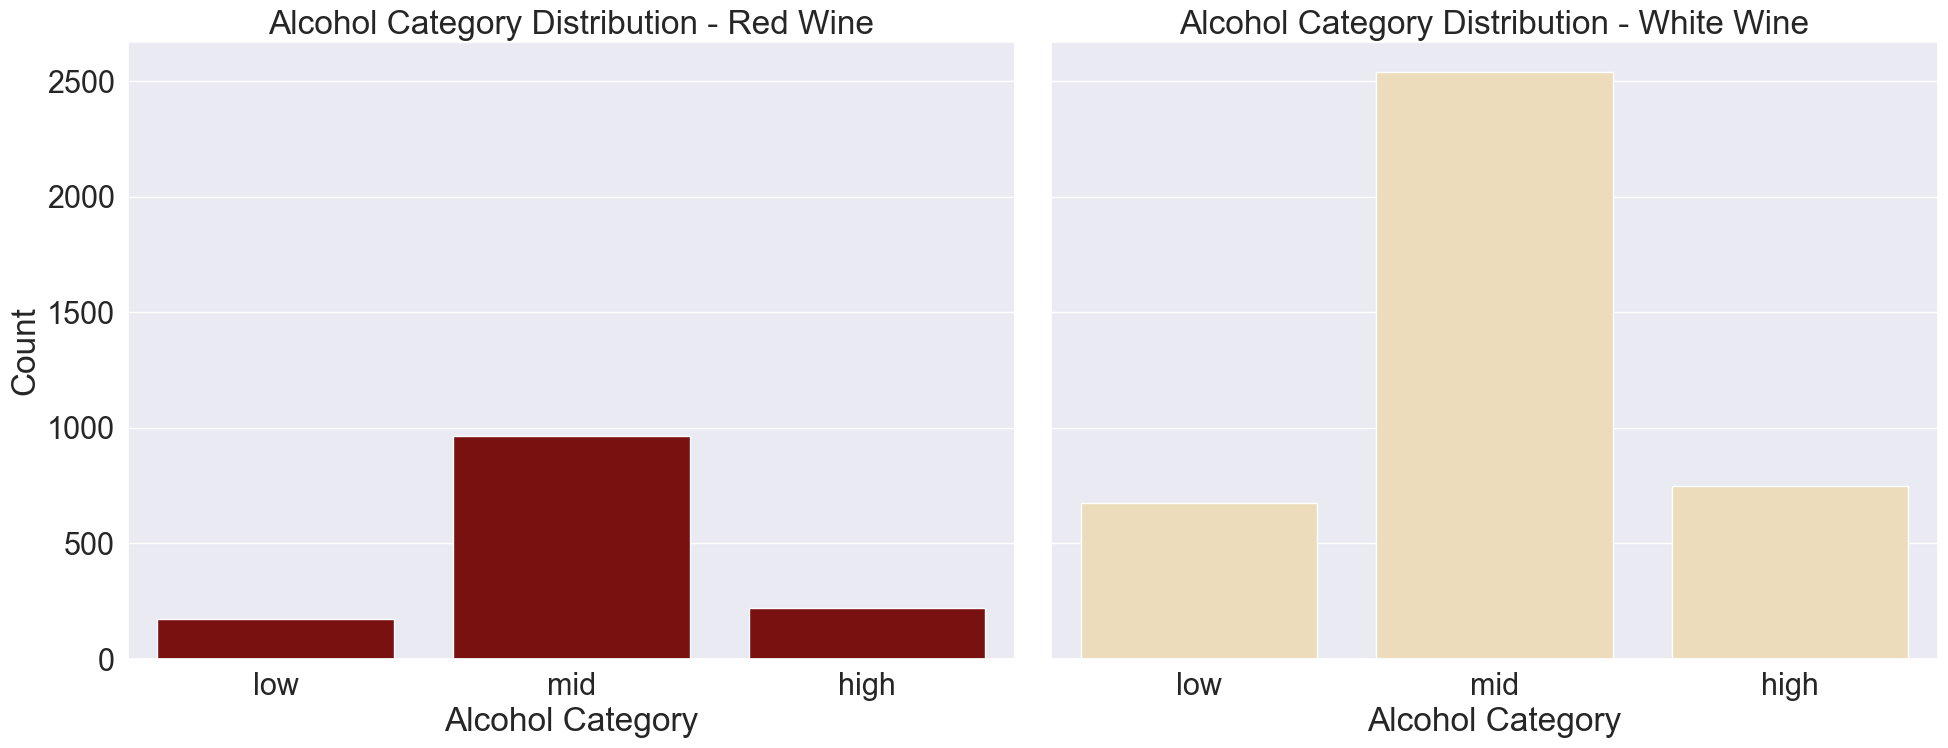

In [304]:
# Consistent category ordering
cat_order = CategoricalDtype(categories=["low", "mid", "high"], ordered=True)
red_wine['alcohol_cat'] = red_wine['alcohol_cat'].astype(cat_order)
white_wine['alcohol_cat'] = white_wine['alcohol_cat'].astype(cat_order)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Red wine plot
seaborn.countplot(data=red_wine, x='alcohol_cat', ax=axes[0], color='#8B0000')
axes[0].set_title("Alcohol Category Distribution - Red Wine")
axes[0].set_xlabel("Alcohol Category")
axes[0].set_ylabel("Count")

# White wine plot
seaborn.countplot(data=white_wine, x='alcohol_cat', ax=axes[1], color='#F5DEB3')
axes[1].set_title("Alcohol Category Distribution - White Wine")
axes[1].set_xlabel("Alcohol Category")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

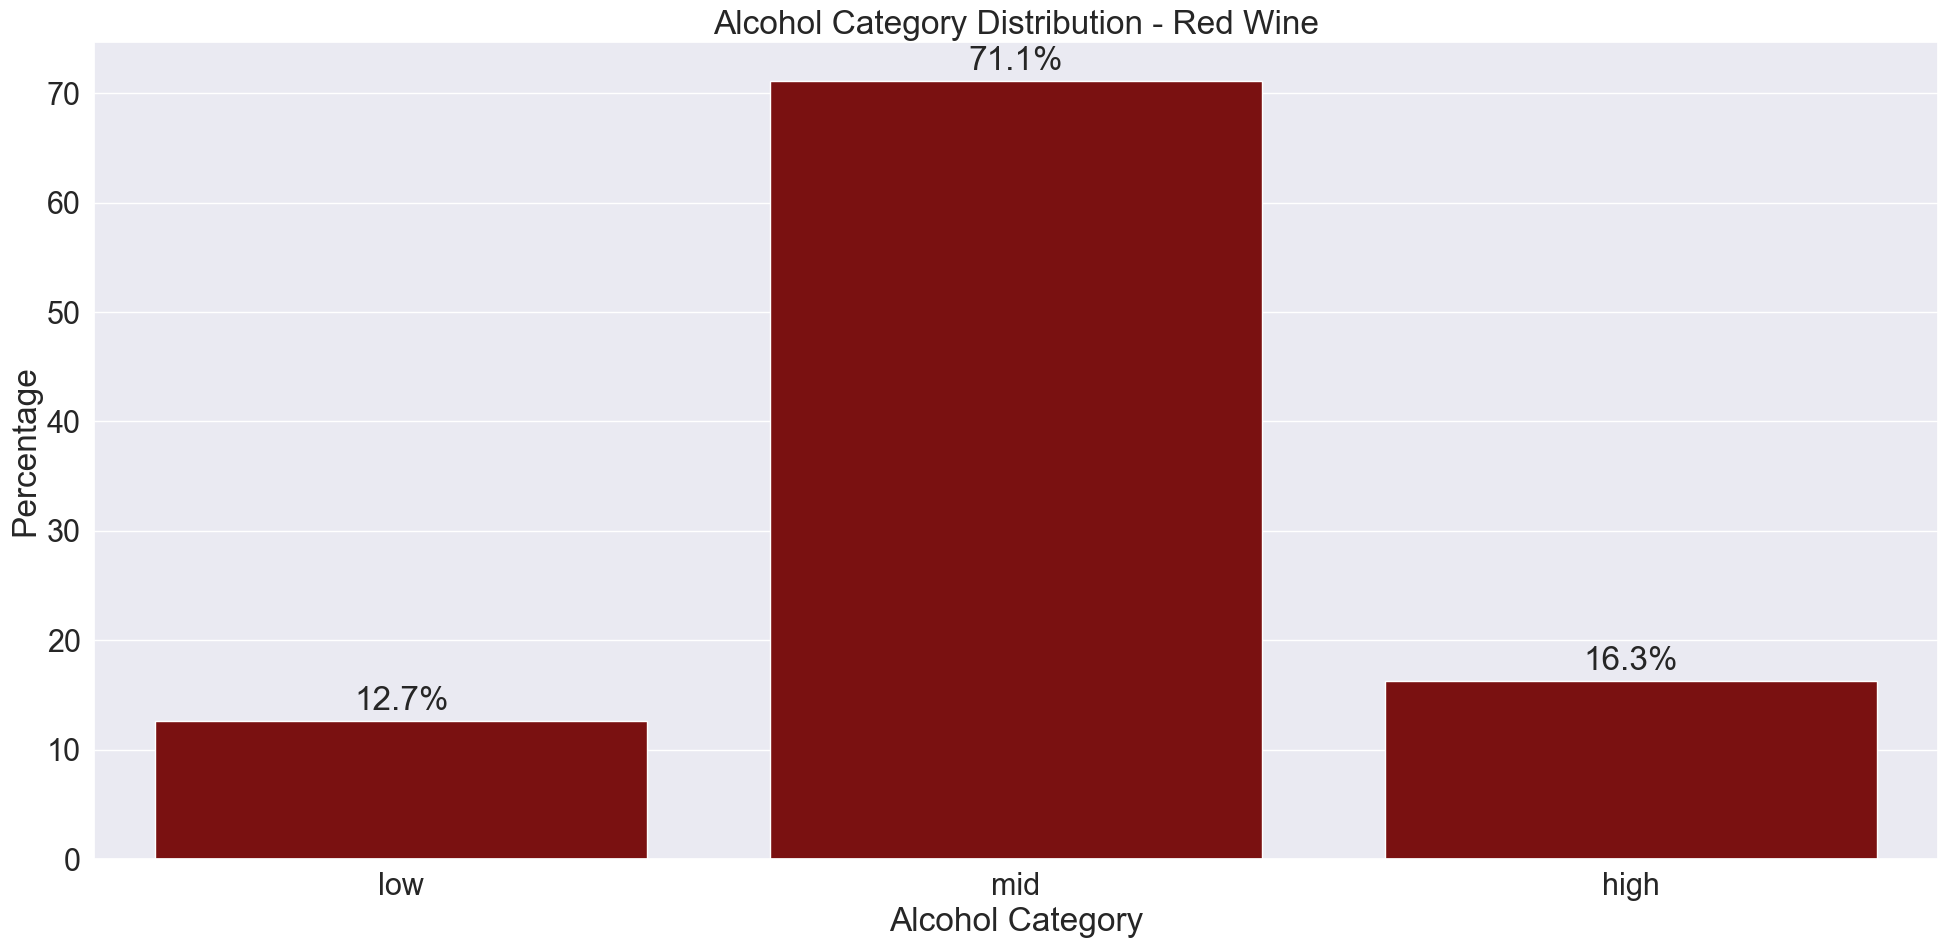

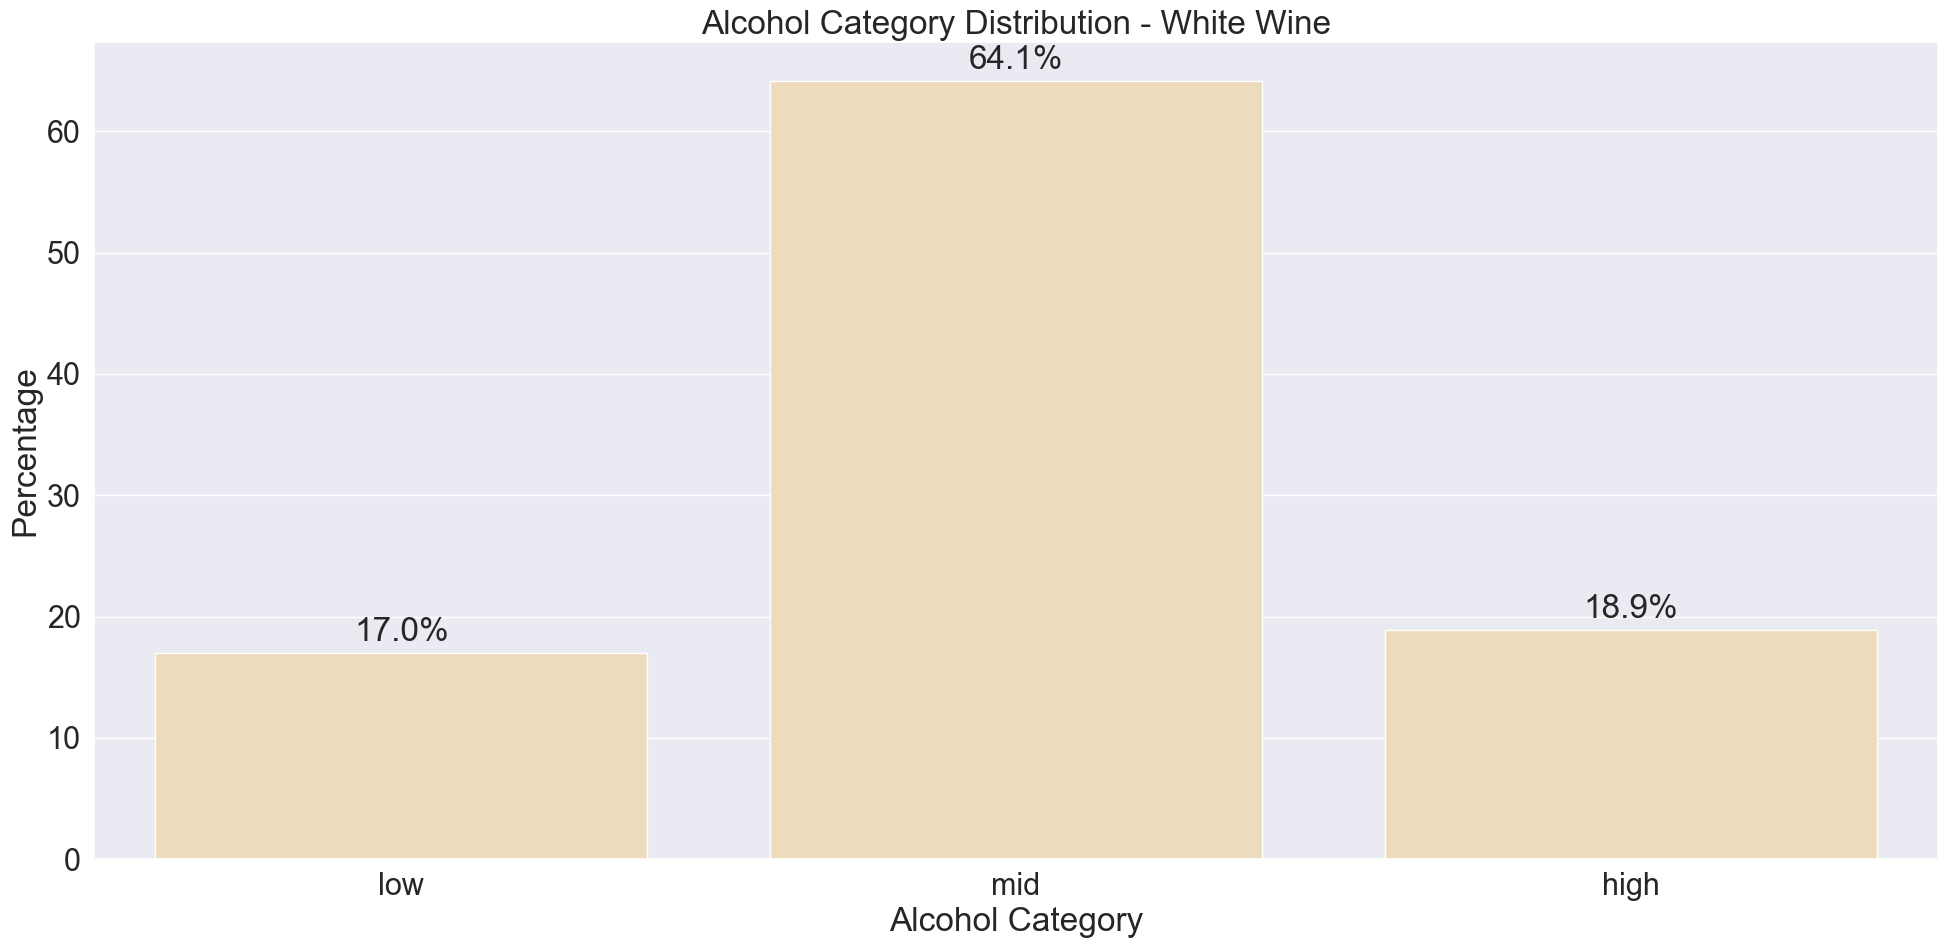

In [305]:
# Red Wine Alcohol Category Distribution
red_counts = red_wine['alcohol_cat'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(20, 10))
bars = seaborn.barplot(x=red_counts.index, y=red_counts.values, color='#8B0000')
plt.title("Alcohol Category Distribution - Red Wine")
plt.xlabel("Alcohol Category")
plt.ylabel("Percentage")

# Add percentage labels
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# White Wine Alcohol Category Distribution
white_counts = white_wine['alcohol_cat'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(20, 10))
bars = seaborn.barplot(x=white_counts.index, y=white_counts.values, color='#F5DEB3')
plt.title("Alcohol Category Distribution - White Wine")
plt.xlabel("Alcohol Category")
plt.ylabel("Percentage")

# Add percentage labels
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center')

plt.tight_layout()
plt.show()

In [306]:
# Average quality by alcohol category
print("Red Wine - Avg Quality by Alcohol Category:")
print(red_wine.groupby('alcohol_cat')['quality'].mean())

print("\nWhite Wine - Avg Quality by Alcohol Category:")
print(white_wine.groupby('alcohol_cat')['quality'].mean())

Red Wine - Avg Quality by Alcohol Category:
alcohol_cat
low    5.18
mid    5.53
high   6.38
Name: quality, dtype: float64

White Wine - Avg Quality by Alcohol Category:
alcohol_cat
low    5.40
mid    5.77
high   6.54
Name: quality, dtype: float64


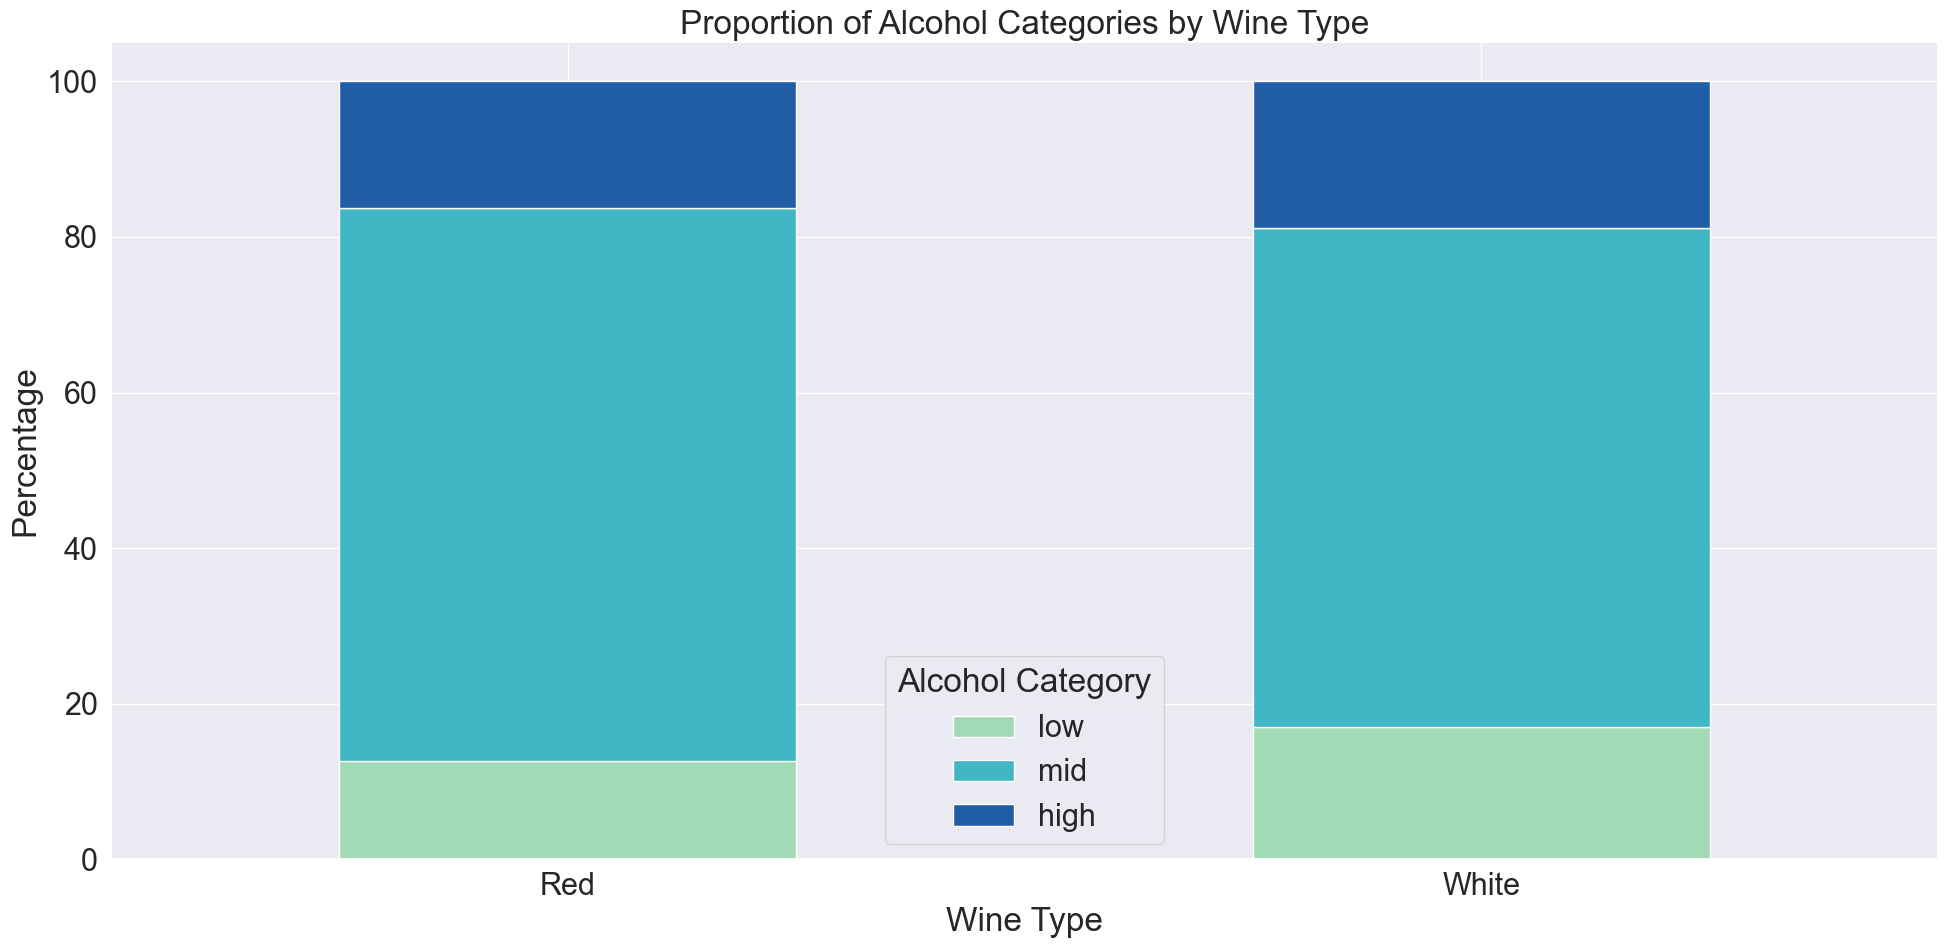

In [307]:
# Percentage breakdown for red wine
red_dist = (
    red_wine['alcohol_cat'].value_counts(normalize=True)
    .reindex(["low", "mid", "high"], fill_value=0) * 100
)

# Percentage breakdown for white wine
white_dist = (
    white_wine['alcohol_cat'].value_counts(normalize=True)
    .reindex(["low", "mid", "high"], fill_value=0) * 100
)

# Combine into a DataFrame
alcohol_cat_dist = pd.DataFrame({
    'Red': red_dist,
    'White': white_dist
}).T  # Transpose to get types as index

# Ensure correct column order
alcohol_cat_dist = alcohol_cat_dist[["low", "mid", "high"]]

# Plot
alcohol_cat_dist.plot(kind='bar', stacked=True, color=['#a1dab4', '#41b6c4', '#225ea8'], figsize=(20, 10))

plt.title("Proportion of Alcohol Categories by Wine Type")
plt.ylabel("Percentage")
plt.xlabel("Wine Type")
plt.xticks(rotation=0)
plt.legend(title='Alcohol Category')
plt.tight_layout()
plt.show()


Task 1, Part C - Describe the distribution of wine quality as in (1.A), but separately for low-, mid-, and high-alcohol content. Create suitable plots to illustrate. Can you draw any conclusions on the relationship between alcohol content and quality?


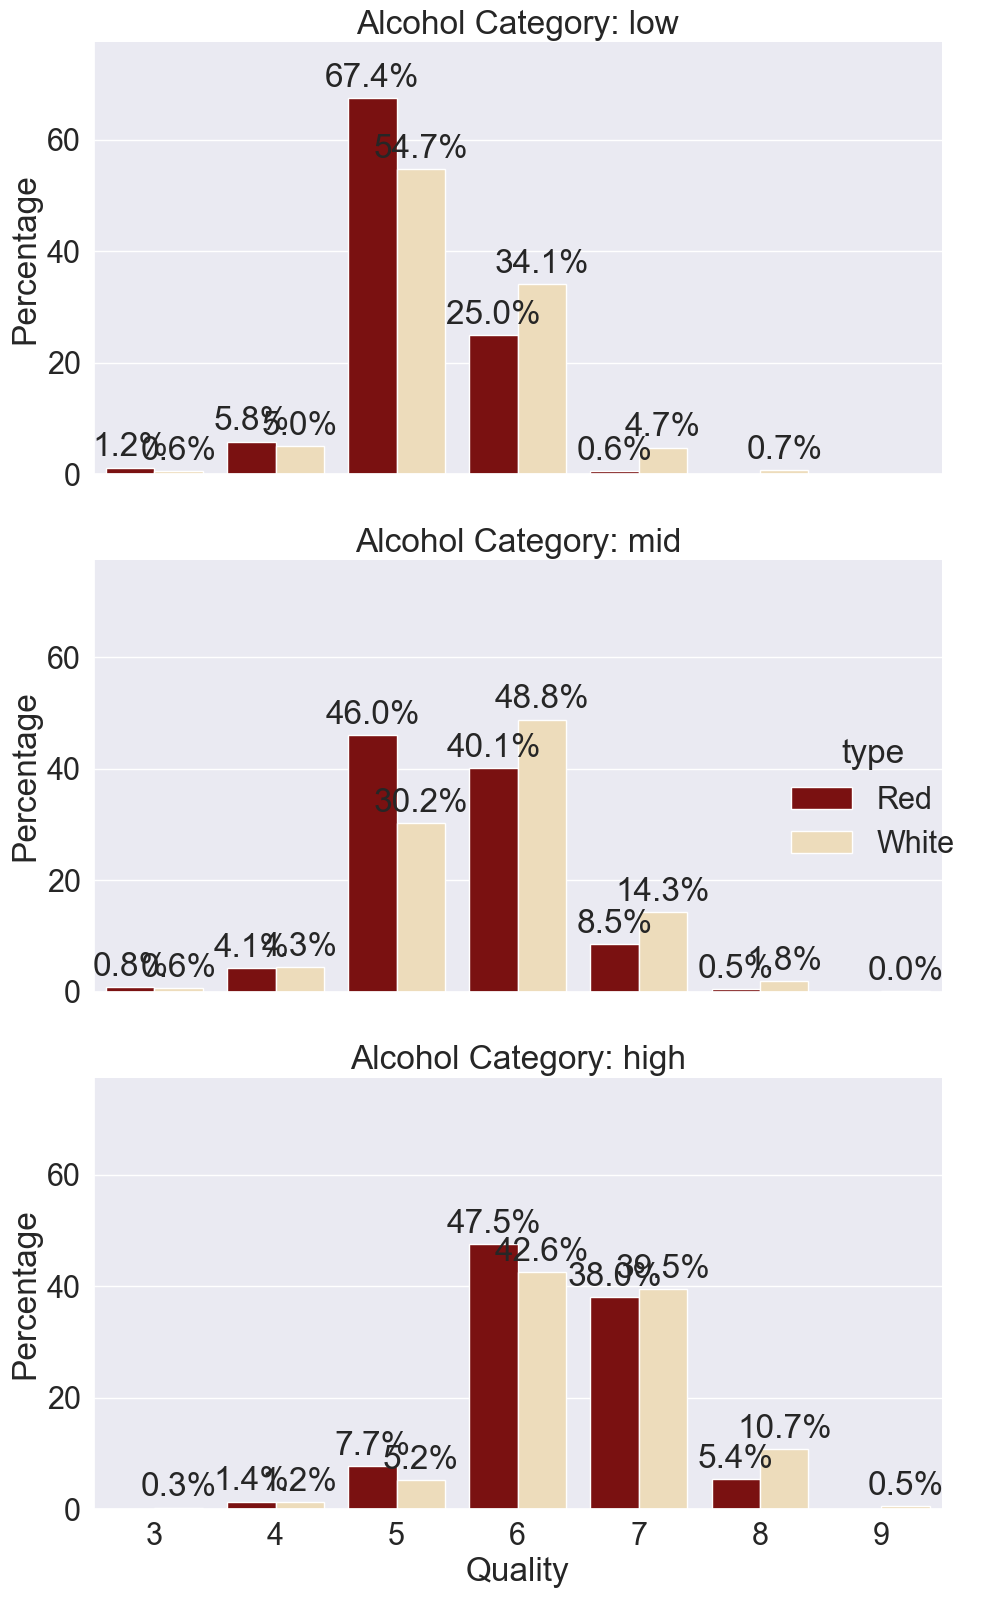

In [308]:
# Prepare red wine quality percentage by alcohol category
red_quality_dist = (
    red_wine.groupby(['alcohol_cat', 'quality'], observed=True).size()
    .groupby(level=0)
    .transform(lambda x: 100 * x / x.sum())
    .reset_index(name='percentage')
)
red_quality_dist['type'] = 'Red'

# Prepare white wine quality percentage by alcohol category
white_quality_dist = (
    white_wine.groupby(['alcohol_cat', 'quality'], observed=True).size()
    .groupby(level=0)
    .transform(lambda x: 100 * x / x.sum())
    .reset_index(name='percentage')
)
white_quality_dist['type'] = 'White'

# Combine both
quality_dist = pd.concat([red_quality_dist, white_quality_dist], ignore_index=True)

# Plotting
graph = seaborn.catplot(
    data=quality_dist,
    x='quality',
    y='percentage',
    hue='type',
    col='alcohol_cat',
    kind='bar',
    palette={'Red': '#8B0000', 'White': '#F5DEB3'},
    height=5.5,
    aspect=1.5,
    col_wrap=1
)

graph.set_titles("Alcohol Category: {col_name}")
graph.set_axis_labels("Quality", "Percentage")
graph.set(ylim=(0, quality_dist['percentage'].max() + 10))

for ax in graph.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()


Conclusions Drawn from Task 1 Part C results
TODO

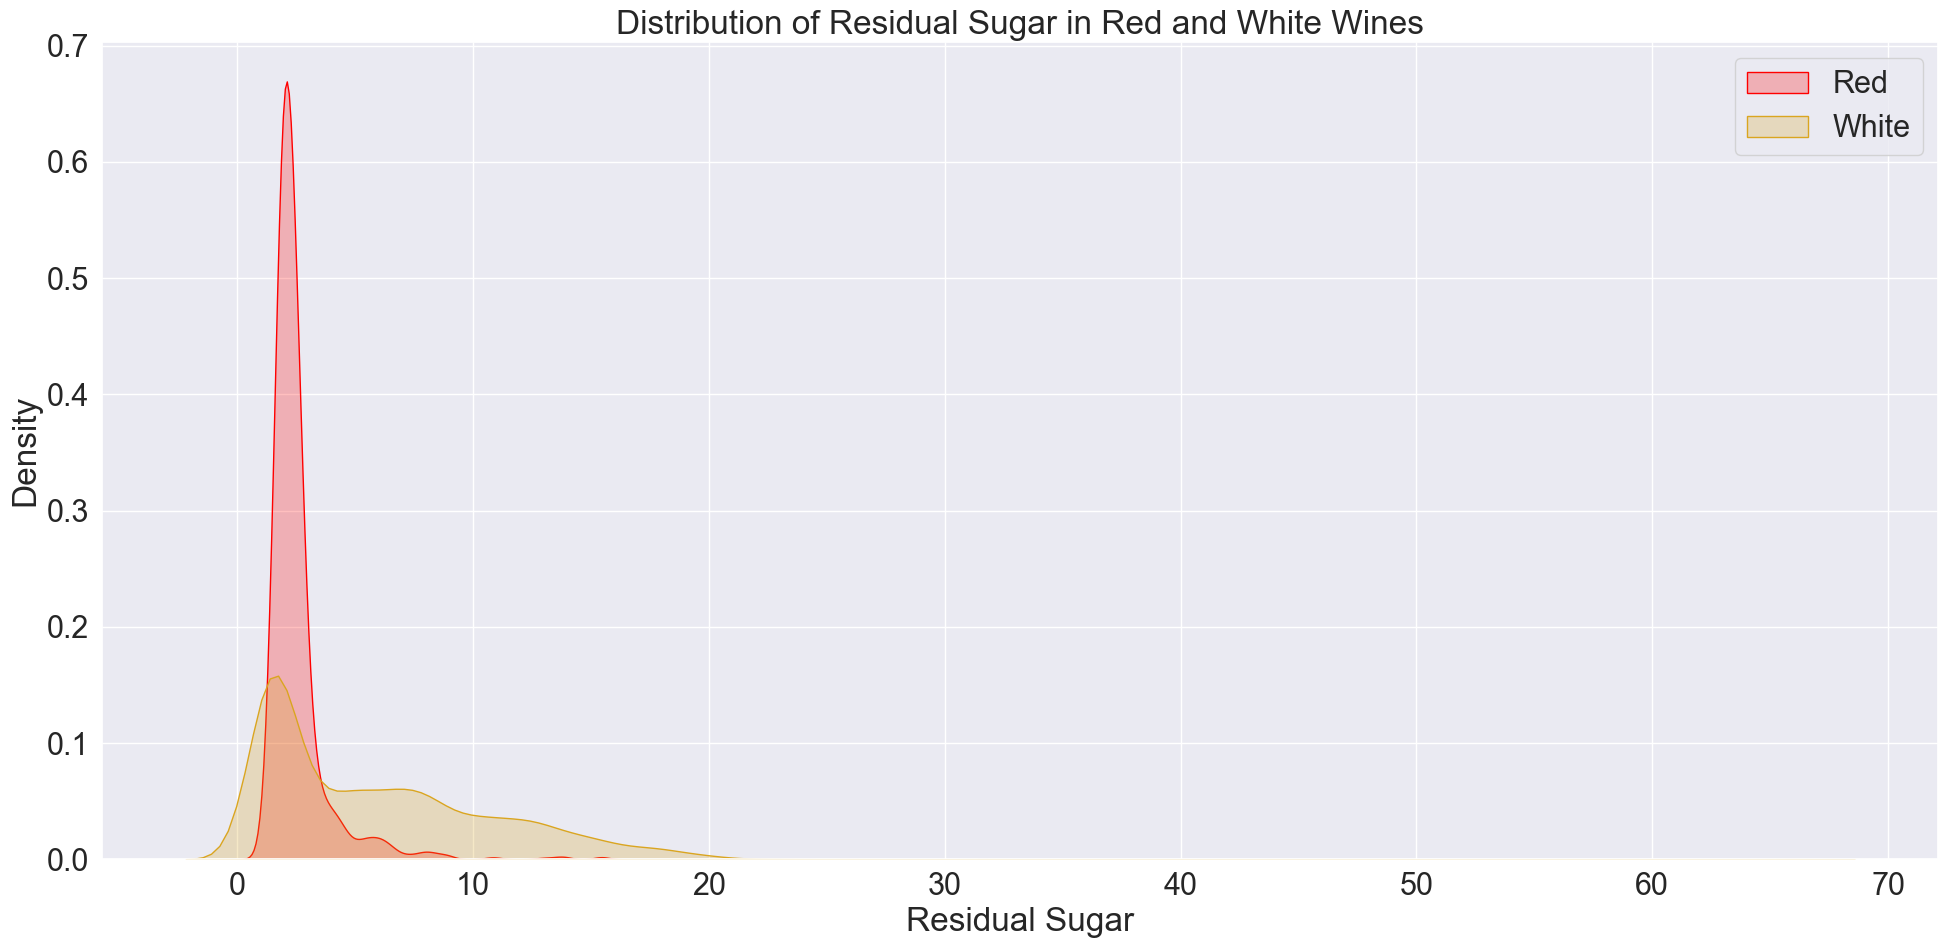

In [309]:
# Task 1, Part D - Plot the residual sugar variable and identify a suitable threshold to separate "sweet" from "dry" wines*. Create a new "isSweet" binary variable to represent these two classes. The distributions of residual sugar are skewed for both reds and whites (in fact most wines in this dataset are dry according to the official definition, e.g., https://winefolly.com/deep-dive/sugar-in-wine-chart/)Links to an external site.. A practical approach in this case is to pick a threshold that splits the dataset (almost) evenly, as that will give you two balanced classes for your classifier. So your task is to find a threshold such that each class has approximately the same number of records.

# Residual Sugar distribution Plot
plt.figure(figsize=(20, 10))
seaborn.kdeplot(red_wine['residual sugar'], label='Red', fill=True, color='red')
seaborn.kdeplot(white_wine['residual sugar'], label='White', fill=True, color='goldenrod')
plt.title("Distribution of Residual Sugar in Red and White Wines")
plt.xlabel("Residual Sugar")
plt.legend()
plt.tight_layout()
plt.show()

In [310]:
# Red wine sweetness
red_threshold = red_wine['residual sugar'].median()
print("Red wine sweetness threshold:", round(red_threshold, 2))

red_wine['isSweet'] = (red_wine['residual sugar'] > red_threshold).astype(int)
print("\nRed Wine - Sweet vs Dry Distribution:")
print(red_wine['isSweet'].value_counts(normalize=True))

Red wine sweetness threshold: 2.2

Red Wine - Sweet vs Dry Distribution:
isSweet
0   0.55
1   0.45
Name: proportion, dtype: float64


In [311]:
# White wine sweetness
white_threshold = white_wine['residual sugar'].median()
print("\nWhite wine sweetness threshold:", round(white_threshold, 2))

white_wine['isSweet'] = (white_wine['residual sugar'] > white_threshold).astype(int)
print("\nWhite Wine - Sweet vs Dry Distribution:")
print(white_wine['isSweet'].value_counts(normalize=True))


White wine sweetness threshold: 4.7

White Wine - Sweet vs Dry Distribution:
isSweet
0   0.50
1   0.50
Name: proportion, dtype: float64


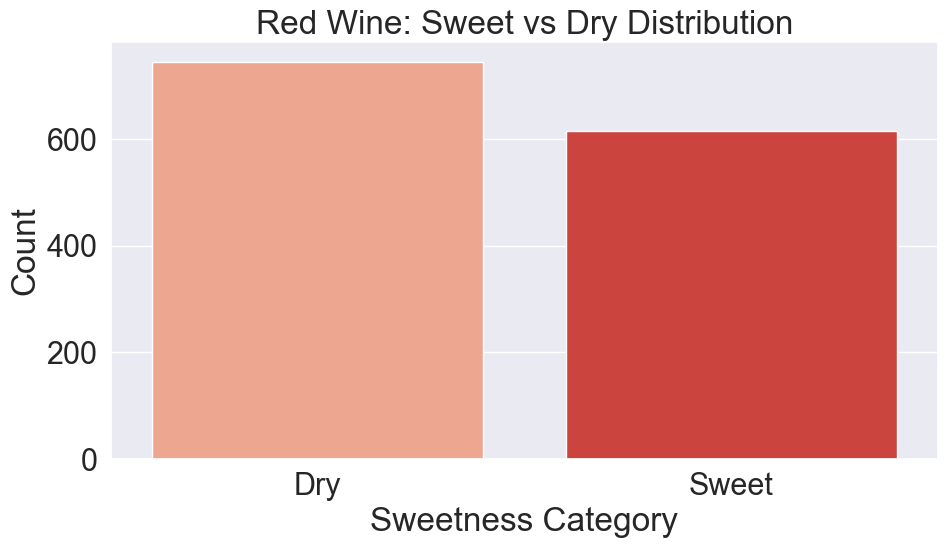

In [312]:
# Plot for red wine
plt.figure(figsize=(10, 6))
seaborn.countplot(data=red_wine, x='isSweet', hue='isSweet', palette='Reds', legend=False)
plt.title("Red Wine: Sweet vs Dry Distribution")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.ylabel("Count")
plt.xlabel("Sweetness Category")
plt.tight_layout()
plt.show()

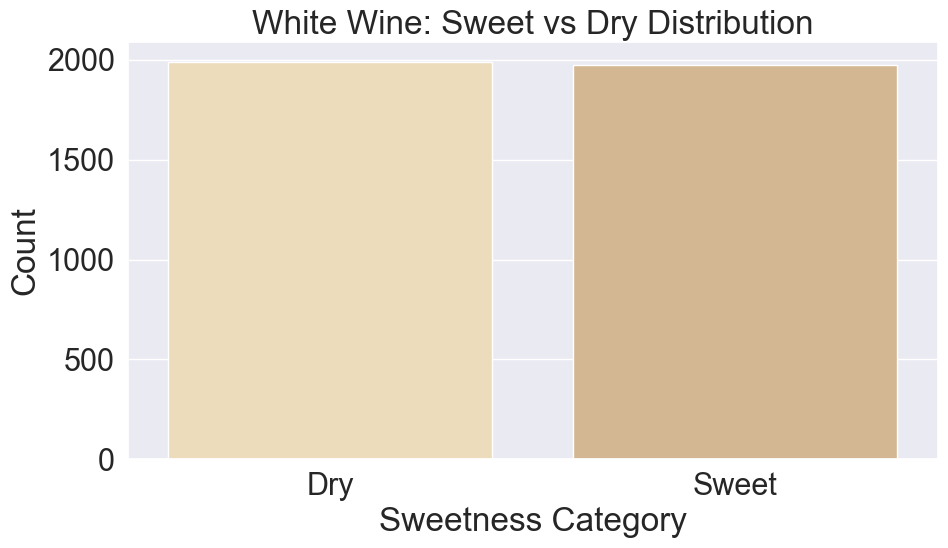

In [313]:
plt.figure(figsize=(10, 6))
seaborn.countplot(
    data=white_wine,
    x='isSweet',
    hue='isSweet',
    palette=["#F5DEB3", "#DEB887"],
    legend=False
)
plt.title("White Wine: Sweet vs Dry Distribution")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.ylabel("Count")
plt.xlabel("Sweetness Category")
plt.tight_layout()
plt.show()


Task 1, Part E - Using the threshold from (1.D), repeat the distribution analysis of quality vs isSweet. Are sweet wines perceived as lower or higher quality than dry wines?

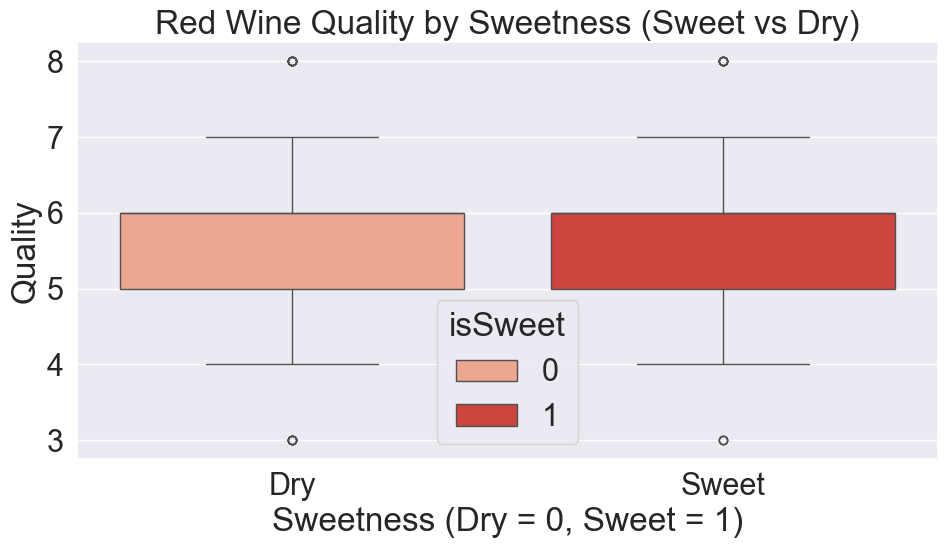

In [314]:
# Red Wine: Quality by Sweetness
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=red_wine, x='isSweet', y='quality', hue='isSweet', palette='Reds')
plt.title("Red Wine Quality by Sweetness (Sweet vs Dry)")
plt.xlabel("Sweetness (Dry = 0, Sweet = 1)")
plt.ylabel("Quality")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.tight_layout()
plt.show()


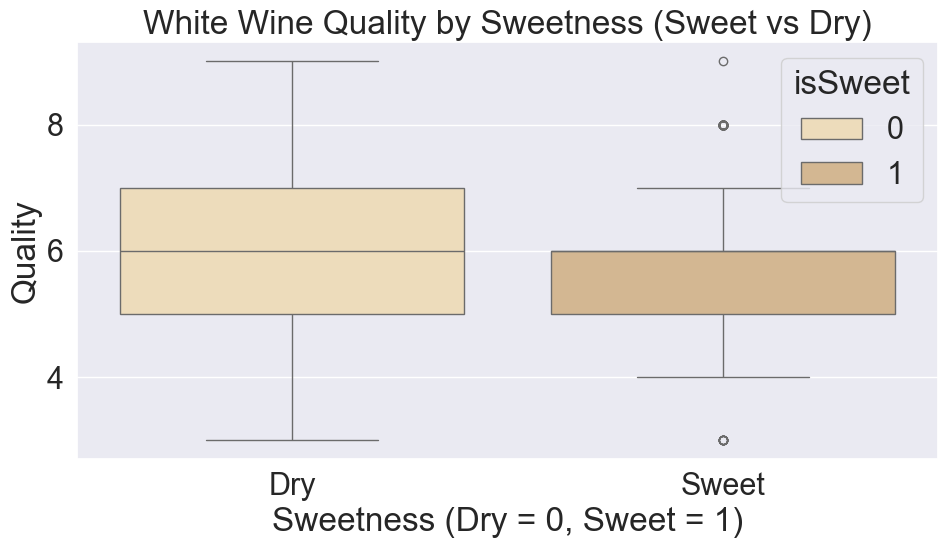

In [315]:
# White Wine: Quality by Sweetness
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=white_wine, x='isSweet', y='quality', hue='isSweet', palette=["#F5DEB3", "#DEB887"])
plt.title("White Wine Quality by Sweetness (Sweet vs Dry)")
plt.xlabel("Sweetness (Dry = 0, Sweet = 1)")
plt.ylabel("Quality")
plt.xticks([0, 1], ['Dry', 'Sweet'])
plt.tight_layout()
plt.show()

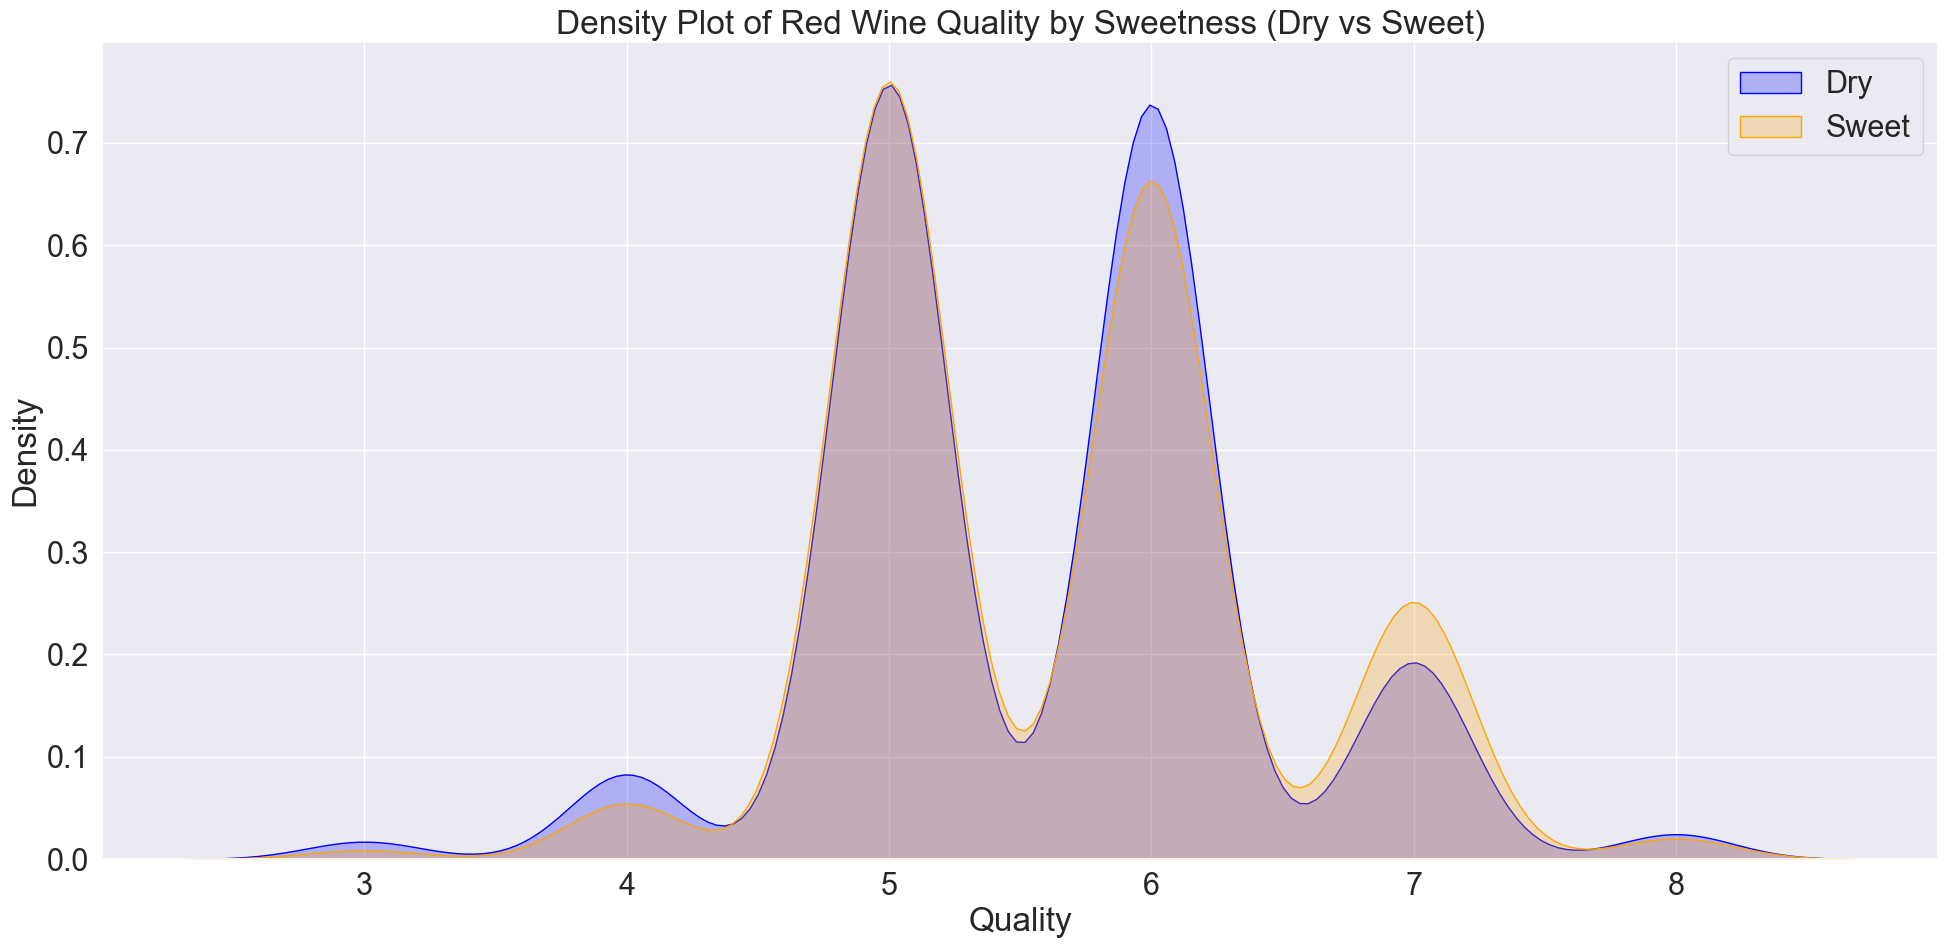

In [316]:
# Density plot for red wine (Dry vs Sweet)
plt.figure(figsize=(20, 10))

# Red Wine - Dry
seaborn.kdeplot(data=red_wine[red_wine['isSweet'] == 0], x='quality', label='Dry', fill=True, color='blue')

# Red Wine - Sweet
seaborn.kdeplot(data=red_wine[red_wine['isSweet'] == 1], x='quality', label='Sweet', fill=True, color='orange')

plt.title("Density Plot of Red Wine Quality by Sweetness (Dry vs Sweet)")
plt.xlabel("Quality")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


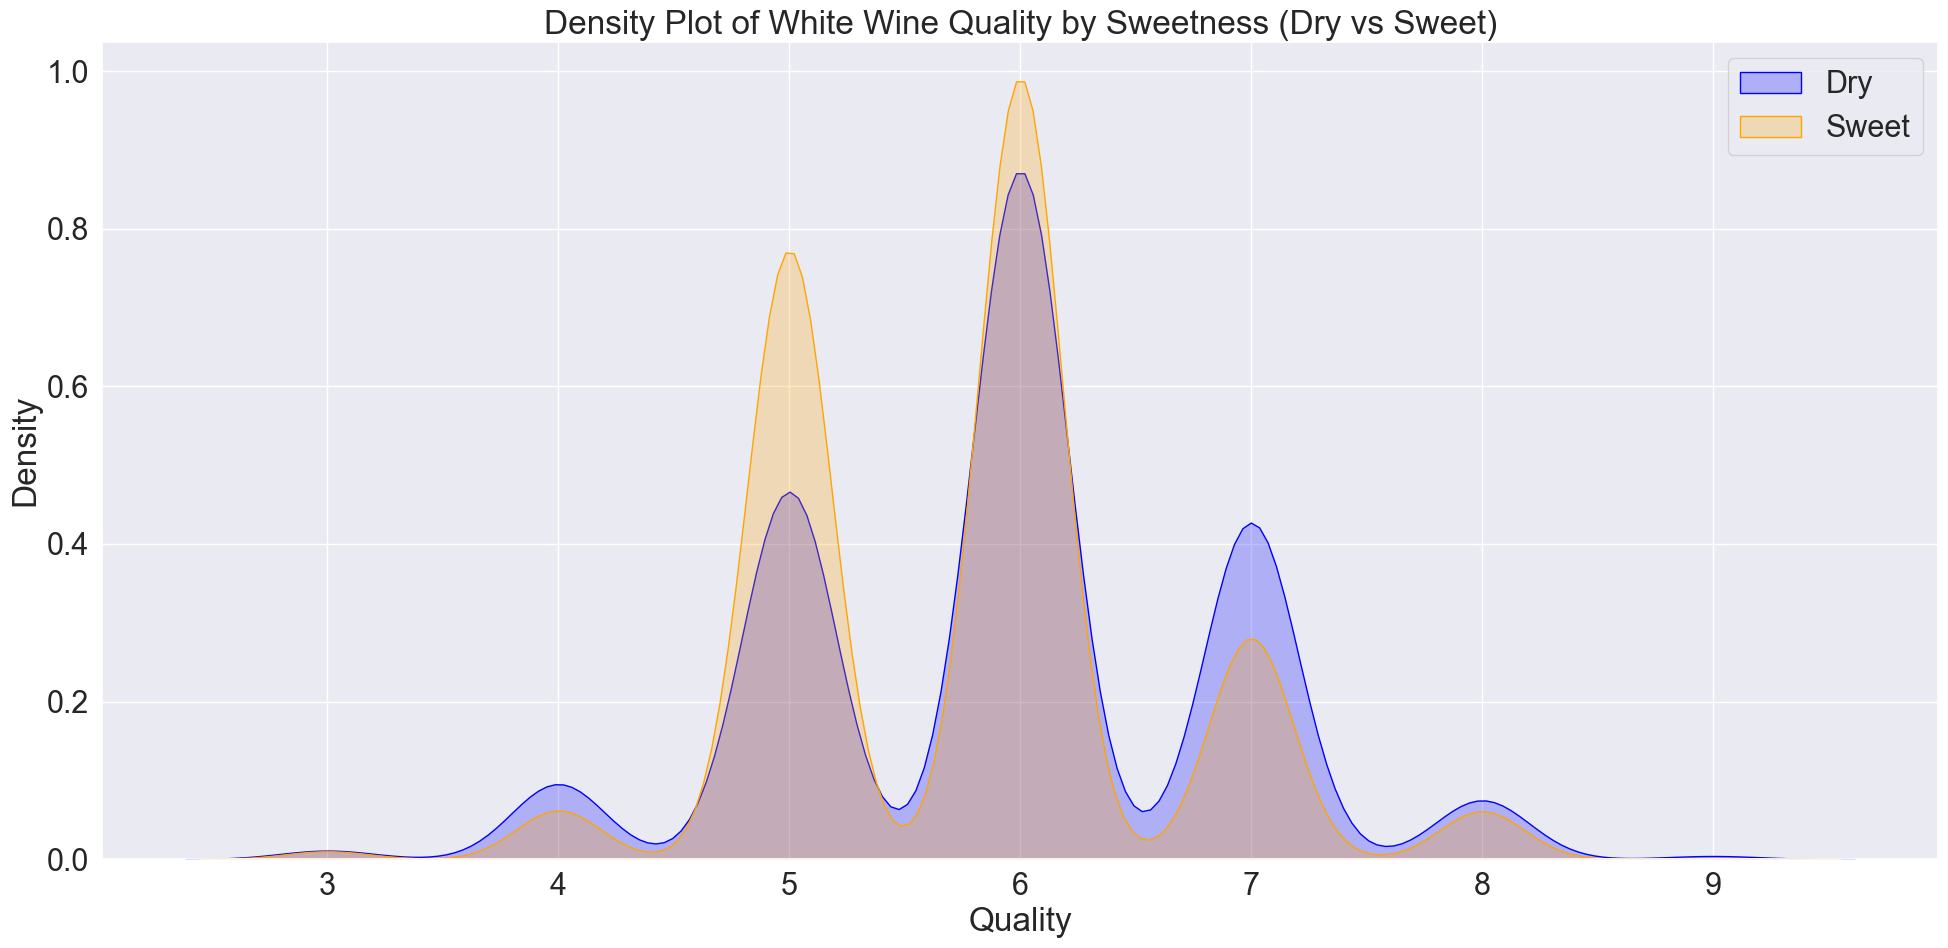

In [317]:
# Density plot for white wine (Dry vs Sweet)
plt.figure(figsize=(20, 10))

# White Wine - Dry
seaborn.kdeplot(data=white_wine[white_wine['isSweet'] == 0], x='quality', label='Dry', fill=True, color='blue')

# White Wine - Sweet
seaborn.kdeplot(data=white_wine[white_wine['isSweet'] == 1], x='quality', label='Sweet', fill=True, color='orange')

plt.title("Density Plot of White Wine Quality by Sweetness (Dry vs Sweet)")
plt.xlabel("Quality")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [318]:
# Mean and median quality comparison for red wine
mean_quality_by_sweetness_red = red_wine.groupby('isSweet')['quality'].mean()
median_quality_by_sweetness_red = red_wine.groupby('isSweet')['quality'].median()

print("Red Wine - Average Quality by Sweetness (Dry = 0, Sweet = 1):")
print(mean_quality_by_sweetness_red)

print("\nRed Wine - Median Quality by Sweetness (Dry = 0, Sweet = 1):")
print(median_quality_by_sweetness_red)

# Conclusion for red wine
print("\nRed Wine Analysis:")
if mean_quality_by_sweetness_red[1] > mean_quality_by_sweetness_red[0]:
    print("Sweet red wines tend to have a higher average quality than dry red wines.")
else:
    print("Dry red wines tend to have a higher average quality than sweet red wines.")


Red Wine - Average Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0   5.60
1   5.66
Name: quality, dtype: float64

Red Wine - Median Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0   6.00
1   6.00
Name: quality, dtype: float64

Red Wine Analysis:
Sweet red wines tend to have a higher average quality than dry red wines.


In [319]:
# Mean and median quality comparison for white wine
mean_quality_by_sweetness_white = white_wine.groupby('isSweet')['quality'].mean()
median_quality_by_sweetness_white = white_wine.groupby('isSweet')['quality'].median()

print("\nWhite Wine - Average Quality by Sweetness (Dry = 0, Sweet = 1):")
print(mean_quality_by_sweetness_white)

print("\nWhite Wine - Median Quality by Sweetness (Dry = 0, Sweet = 1):")
print(median_quality_by_sweetness_white)

# Conclusion for white wine
print("\nWhite Wine Analysis:")
if mean_quality_by_sweetness_white[1] > mean_quality_by_sweetness_white[0]:
    print("Sweet white wines tend to have a higher average quality than dry white wines.")
else:
    print("Dry white wines tend to have a higher average quality than sweet white wines.")


White Wine - Average Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0   5.95
1   5.76
Name: quality, dtype: float64

White Wine - Median Quality by Sweetness (Dry = 0, Sweet = 1):
isSweet
0   6.00
1   6.00
Name: quality, dtype: float64

White Wine Analysis:
Dry white wines tend to have a higher average quality than sweet white wines.


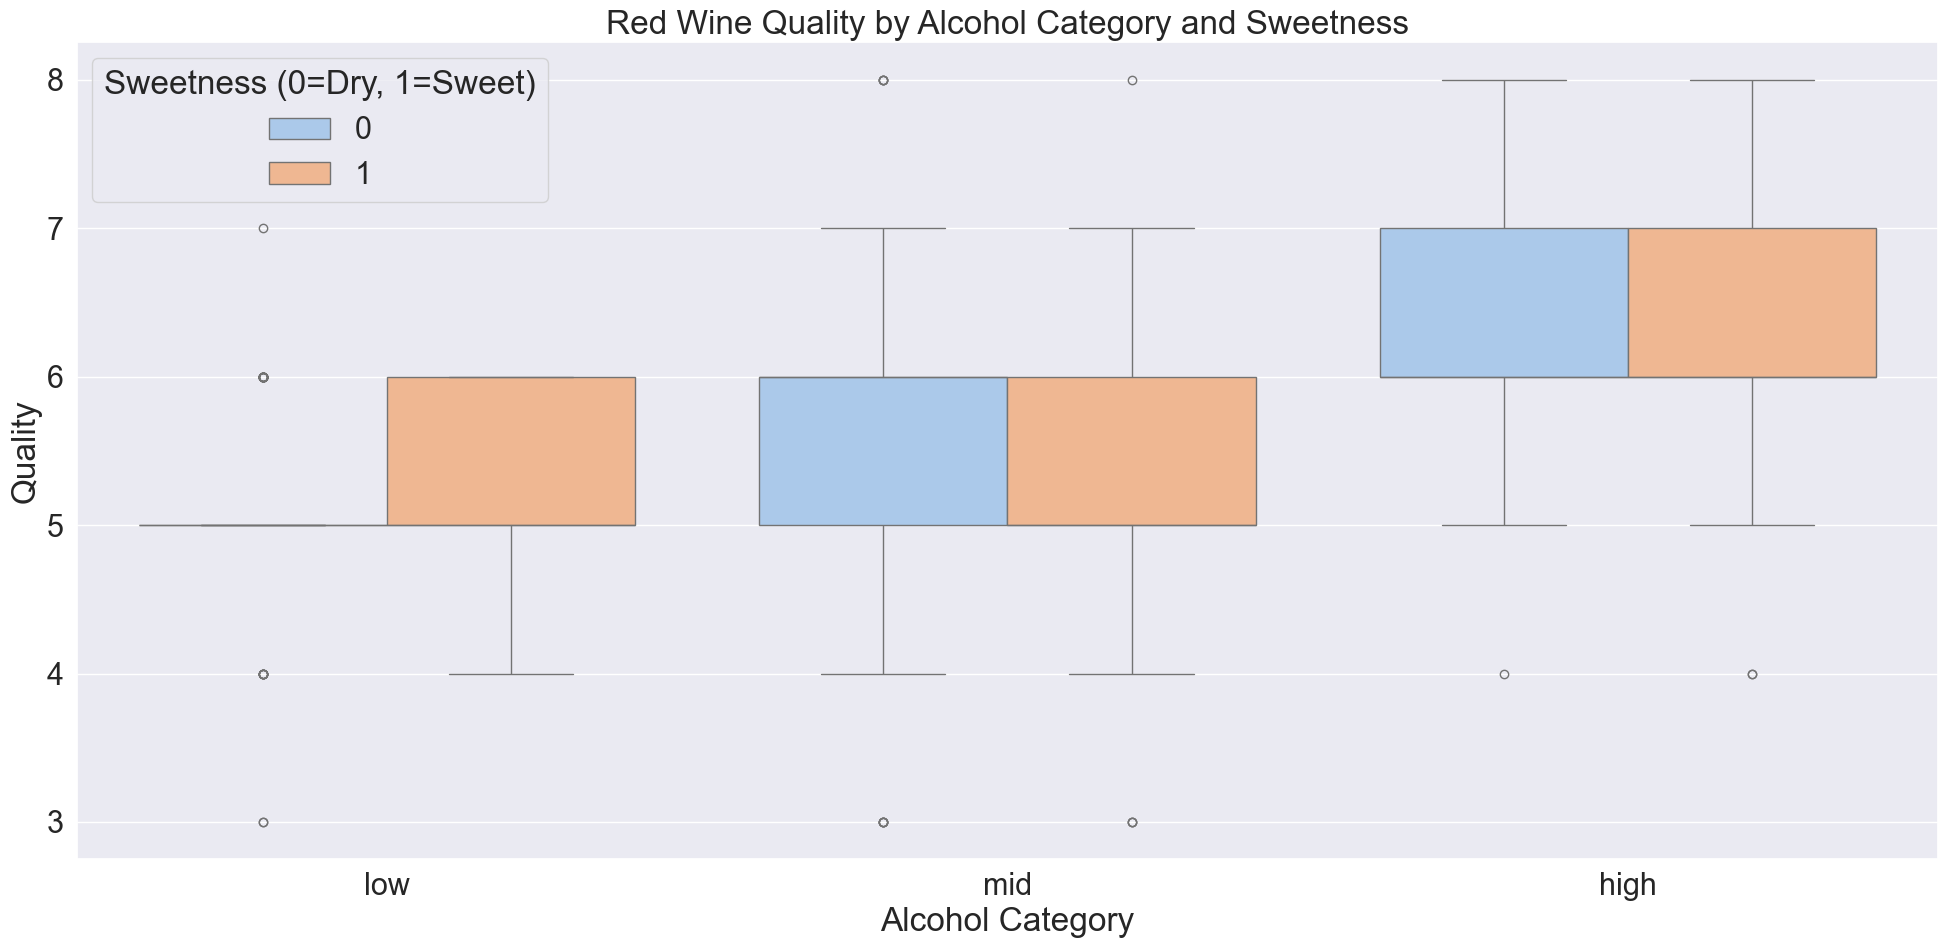

In [320]:
# Extension: Additional Descriptive Analysis
# Extension: Quality by Alcohol Category and Sweetness
plt.figure(figsize=(20, 10))
seaborn.boxplot(data=red_wine, x='alcohol_cat', y='quality', hue='isSweet', palette='pastel')
plt.title("Red Wine Quality by Alcohol Category and Sweetness")
plt.xlabel("Alcohol Category")
plt.ylabel("Quality")
plt.legend(title="Sweetness (0=Dry, 1=Sweet)")
plt.tight_layout()
plt.show()

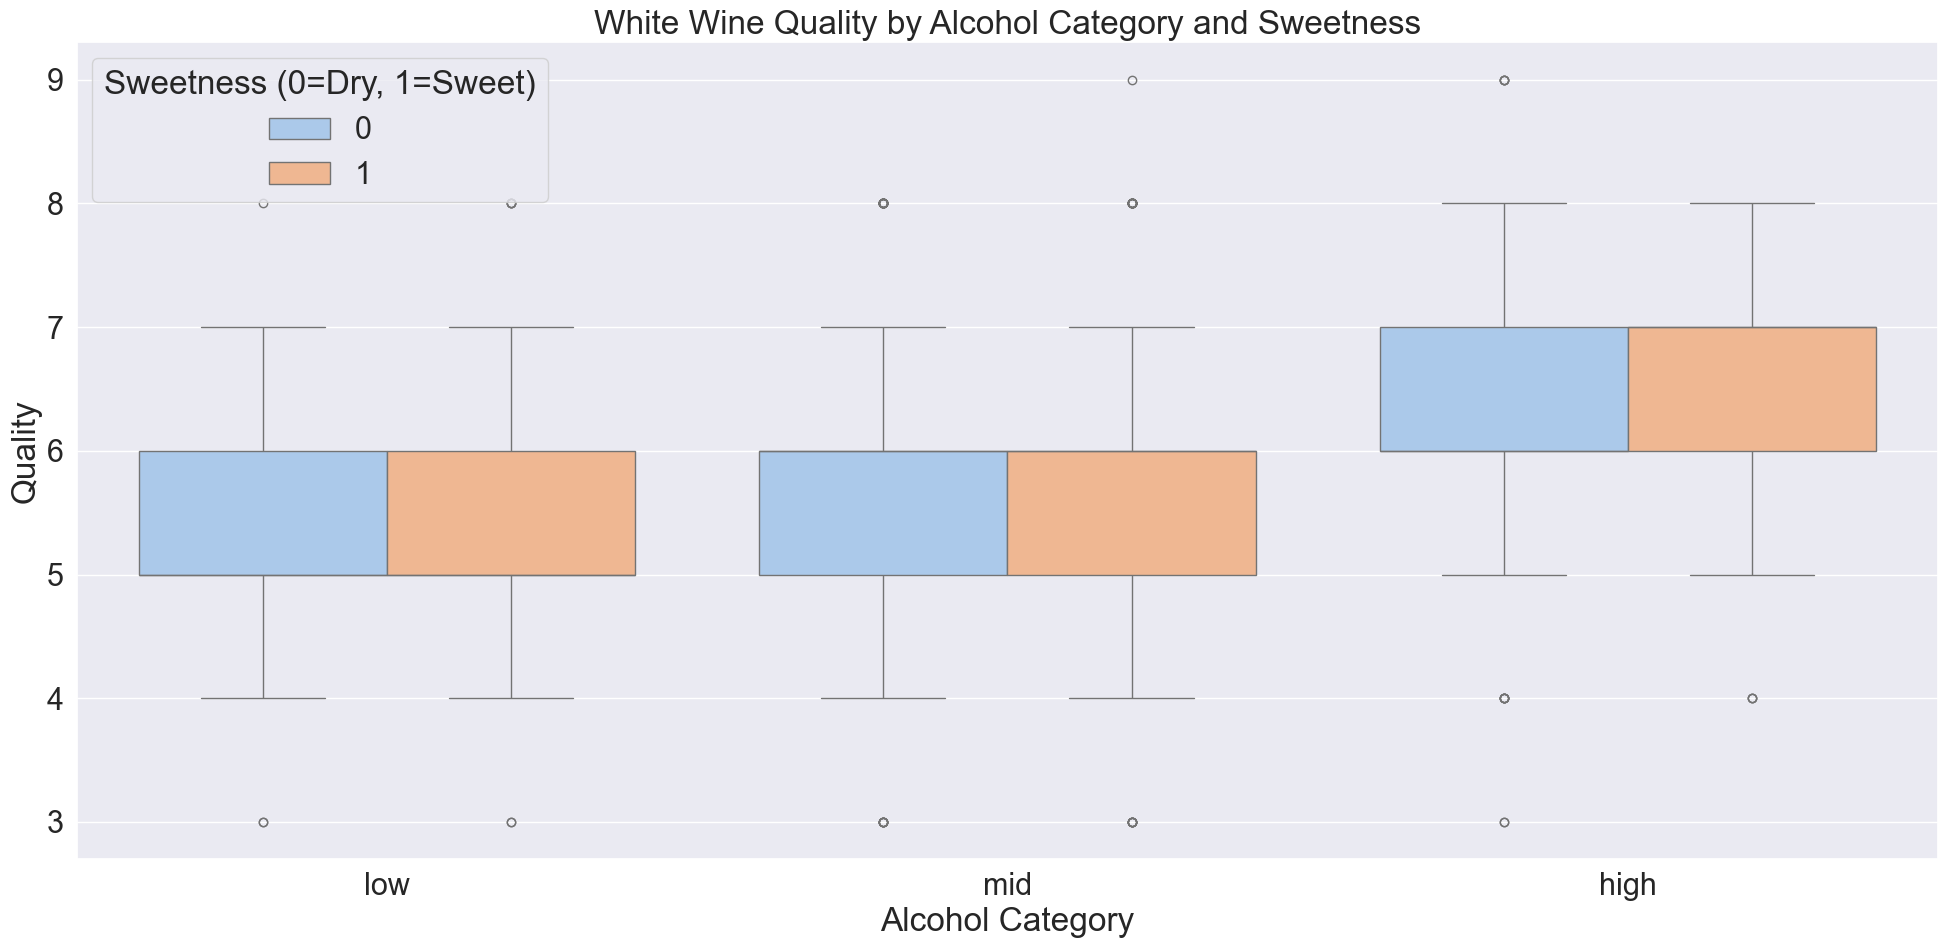

In [321]:
# Extension: Additional Descriptive Analysis
# Extension: Quality by Alcohol Category and Sweetness
plt.figure(figsize=(20, 10))
seaborn.boxplot(data=white_wine, x='alcohol_cat', y='quality', hue='isSweet', palette='pastel')
plt.title("White Wine Quality by Alcohol Category and Sweetness")
plt.xlabel("Alcohol Category")
plt.ylabel("Quality")
plt.legend(title="Sweetness (0=Dry, 1=Sweet)")
plt.tight_layout()
plt.show()

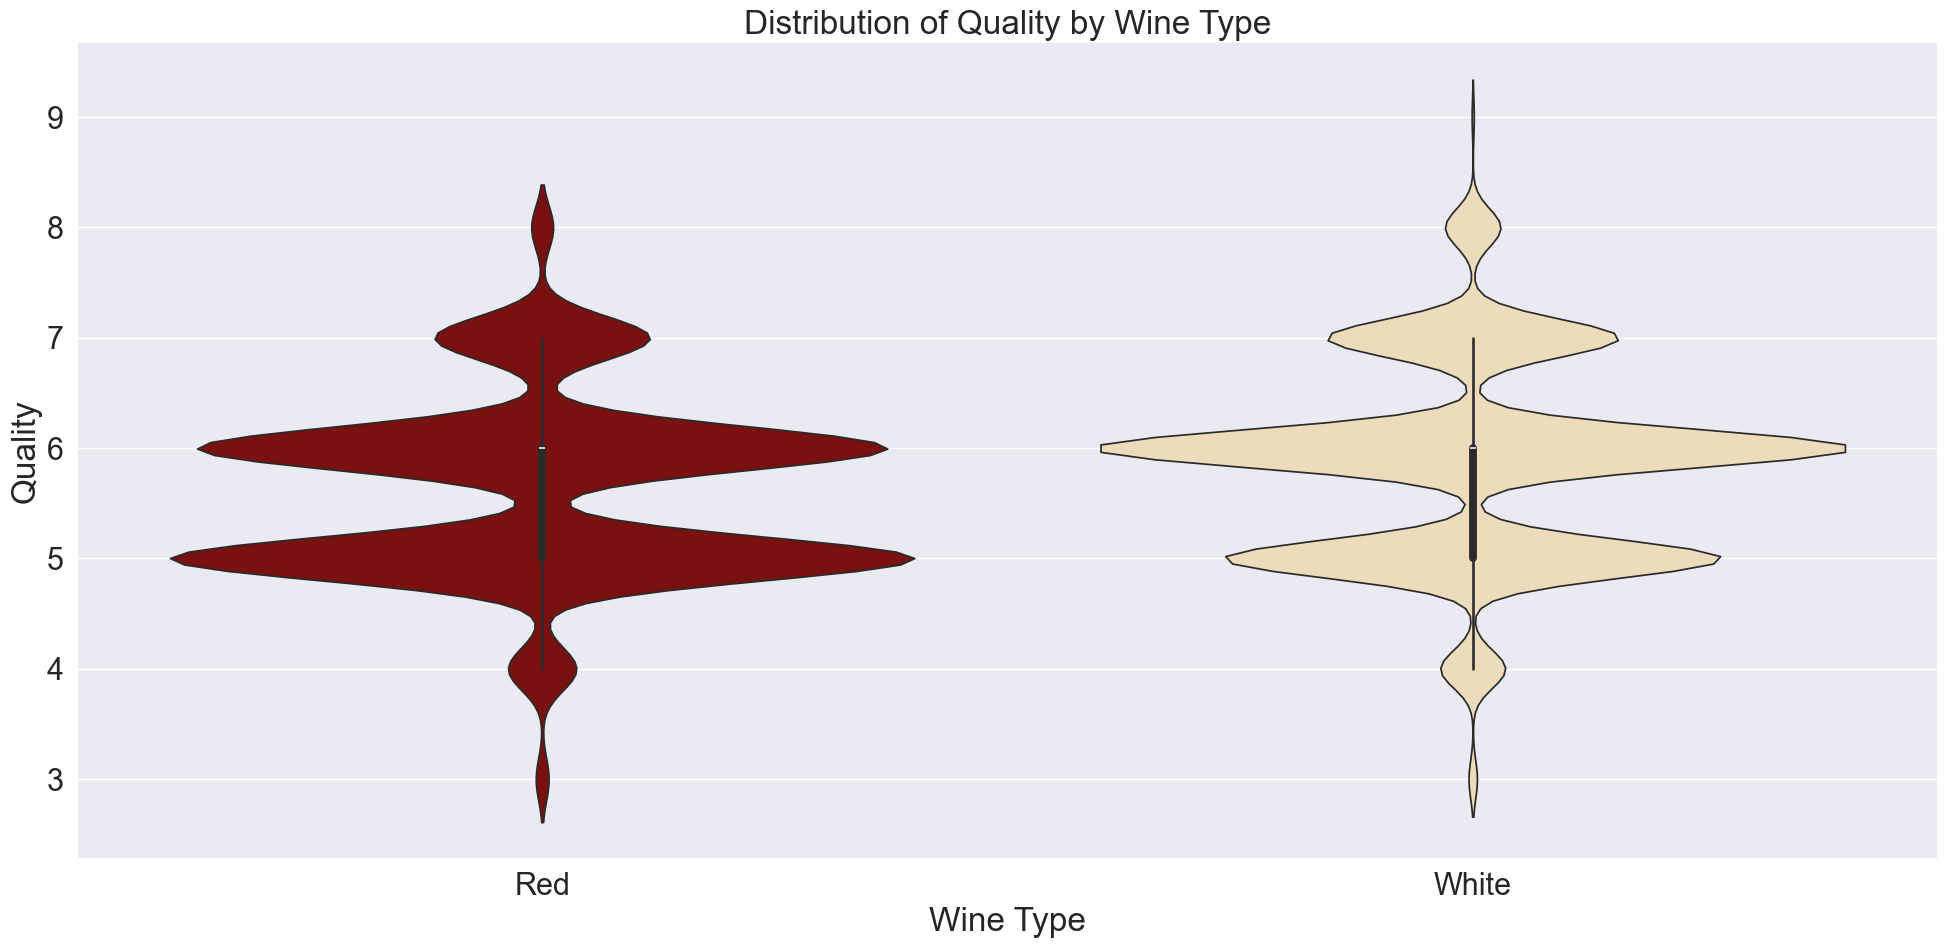

In [322]:
# Extension: Quality Comparison Between Red and White Wines
plt.figure(figsize=(20, 10))
seaborn.violinplot(data=combined_wine, x='type', y='quality', palette={'Red': '#8B0000', 'White': '#F5DEB3'})
plt.title("Distribution of Quality by Wine Type")
plt.xlabel("Wine Type")
plt.ylabel("Quality")
plt.tight_layout()
plt.show()

In [323]:
# Extension: Quality by Alcohol Category (Disregarding Wine Type)
plt.figure(figsize=(20, 10))
seaborn.barplot(data=combined_wine, x='alcohol_cat', y='quality', ci='sd', palette='muted')
plt.title("Average Wine Quality by Alcohol Category (All Wines)")
plt.xlabel("Alcohol Category")
plt.ylabel("Average Quality")
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `alcohol_cat` for `x`. An entry with this name does not appear in `data`.

<Figure size 2000x1000 with 0 Axes>

Task 1, Part E
Are sweet wines perceived as lower or higher quality than dry wines?

Interpretation:
Very similar average and median quality: This suggests that sweet wines are, on average, not higher or lower quality than dry wines. The quality ratings are very similar, both on average and at the median.

Given the close average and median, it appears that there isn’t a strong correlation between sweetness and wine quality based on this dataset. This is interesting because you might expect that sweetness could influence how wine is perceived (with sweet wines potentially having higher quality ratings in some cases). But in this case, it looks quite balanced.

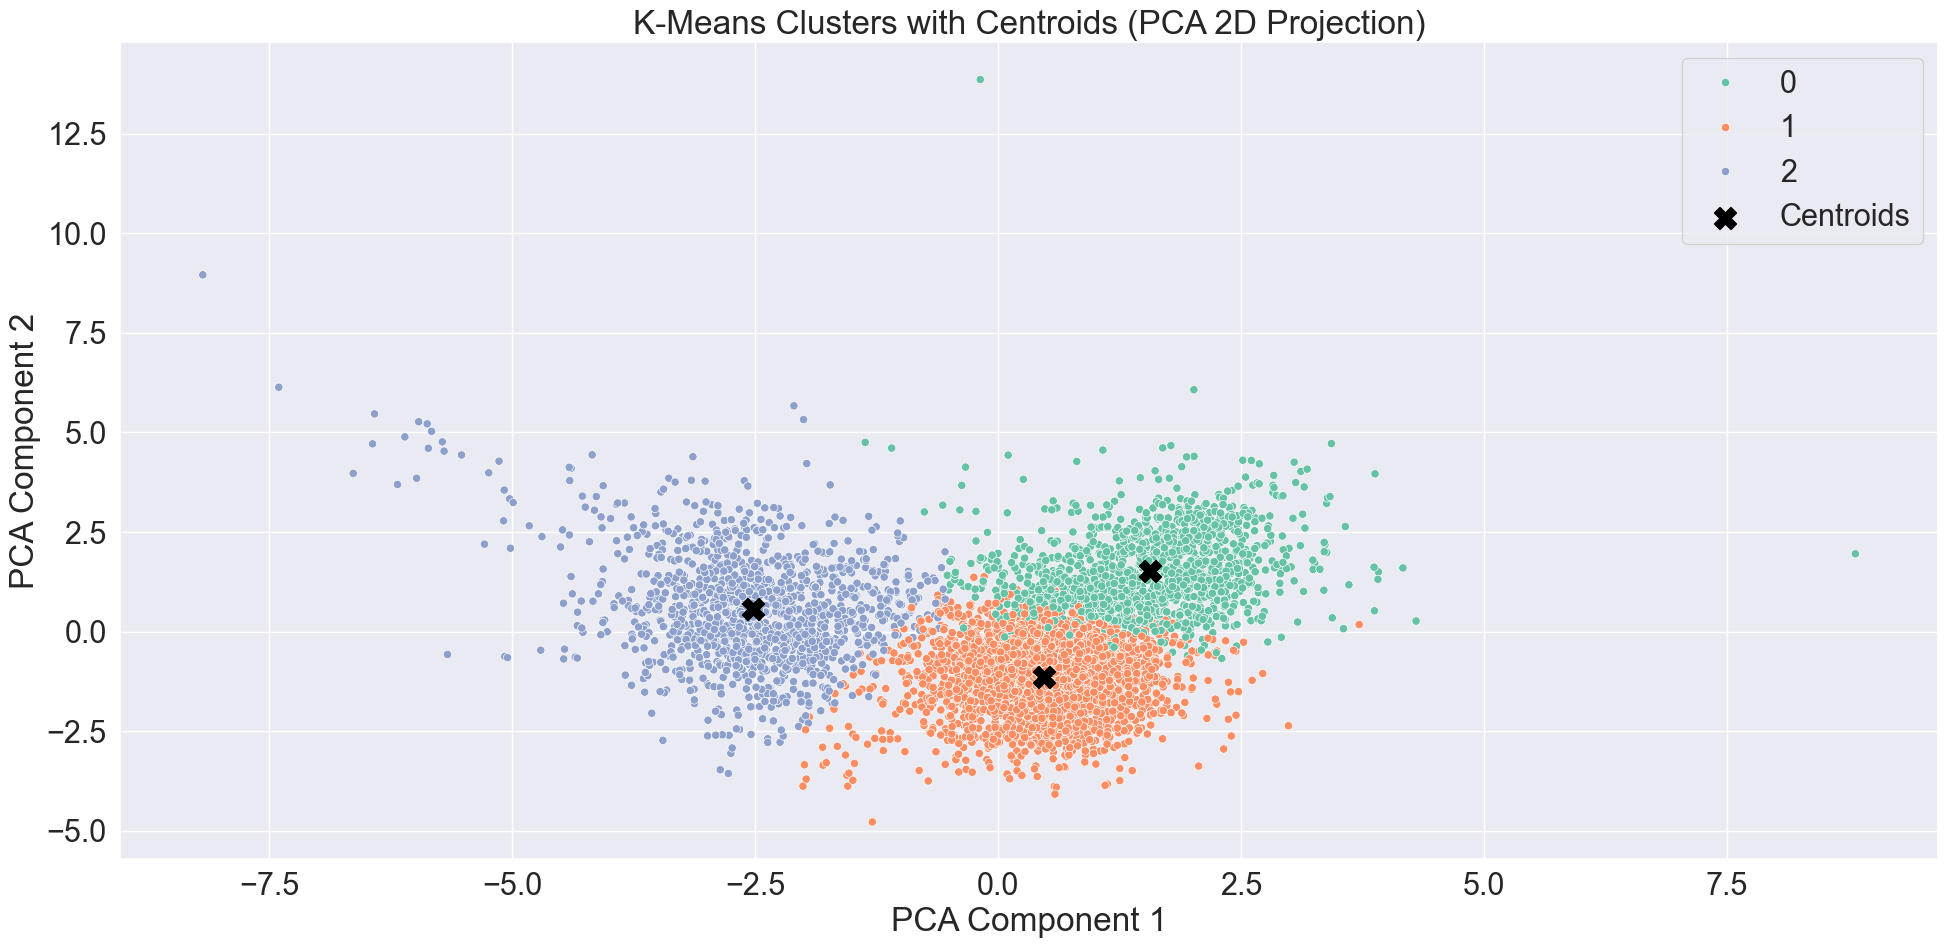


Cluster vs Wine Type:
 type      Red  White
cluster             
0           4   1420
1          51   2491
2        1304     50

Average Quality per Cluster:
 cluster
0   5.56
1   6.05
2   5.57
Name: quality, dtype: float64


In [ ]:
# K-Means Clustering - Combined Wine Data (without quality or categorical)
features_for_clustering = combined_wine.drop(columns=['quality', 'type', 'alcohol_cat', 'isSweet'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
combined_wine['cluster'] = kmeans.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(20, 10))
scatter = seaborn.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=combined_wine['cluster'], palette='Set2')

centroids_original_space = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids_original_space)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=250, c='black', marker='X', label='Centroids')

plt.title("K-Means Clusters with Centroids (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.tight_layout()
plt.show()

# Cross-tabulation of clusters vs wine types (Red vs White)
cross_tab_type = pd.crosstab(combined_wine['cluster'], combined_wine['type'])
print("\nCluster vs Wine Type:\n", cross_tab_type)

# Average quality per cluster
cluster_quality = combined_wine.groupby('cluster')['quality'].mean()
print("\nAverage Quality per Cluster:\n", cluster_quality)


As an exploratory step, I applied K-Means clustering to the feature space (excluding the quality and categorical variables) to investigate whether wines naturally group according to any underlying structure. I initially hypothesized that if chemical composition strongly correlated with wine quality, K-Means might reveal groupings aligned with quality levels. Instead, the clustering revealed a strong separation primarily based on wine type (red versus white). This result, while not directly advancing quality prediction, was valuable: it highlighted that the chemical differences between red and white wines dominate the feature space. For predictive modeling, this suggests a need to carefully account for wine type and to select features that are meaningful for quality rather than just distinguishing wine type.

# Task 2
Try and determine which subset of your variables can be most useful for learning
This is in preparation to applying machine learning to create your model. To do this, analyse correlations between:

- Each pair of variables
- Each variable and the outcome (quality)
-Produce a visual representation of the Correlation Matrix, using  seaborn, matplotlib, or AltairLinks to an external site.
Comment on how some of the variables may relate to others. For this task, you may use Pandas methods to automatically create correlation matrices, for example
 DataFrame.corr. Take care when using the correct metrics, i.e. you must choose between {‘pearson’, ‘kendall’, ‘spearman’}. Consult the documentation to 
 learn about these metrics.


Combined Wine Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00              0.21         0.28   
volatile acidity               0.21              1.00        -0.30   
citric acid                    0.28             -0.30         1.00   
residual sugar                -0.03             -0.02         0.07   
chlorides                      0.36              0.43        -0.06   
free sulfur dioxide           -0.27             -0.37         0.12   
total sulfur dioxide          -0.25             -0.34         0.16   
density                        0.45              0.31         0.06   
pH                            -0.26              0.18        -0.31   
sulphates                      0.23              0.26         0.03   
alcohol                       -0.11             -0.06         0.02   
quality                       -0.10             -0.25         0.12   
isSweet                       -0.11             -0.11 

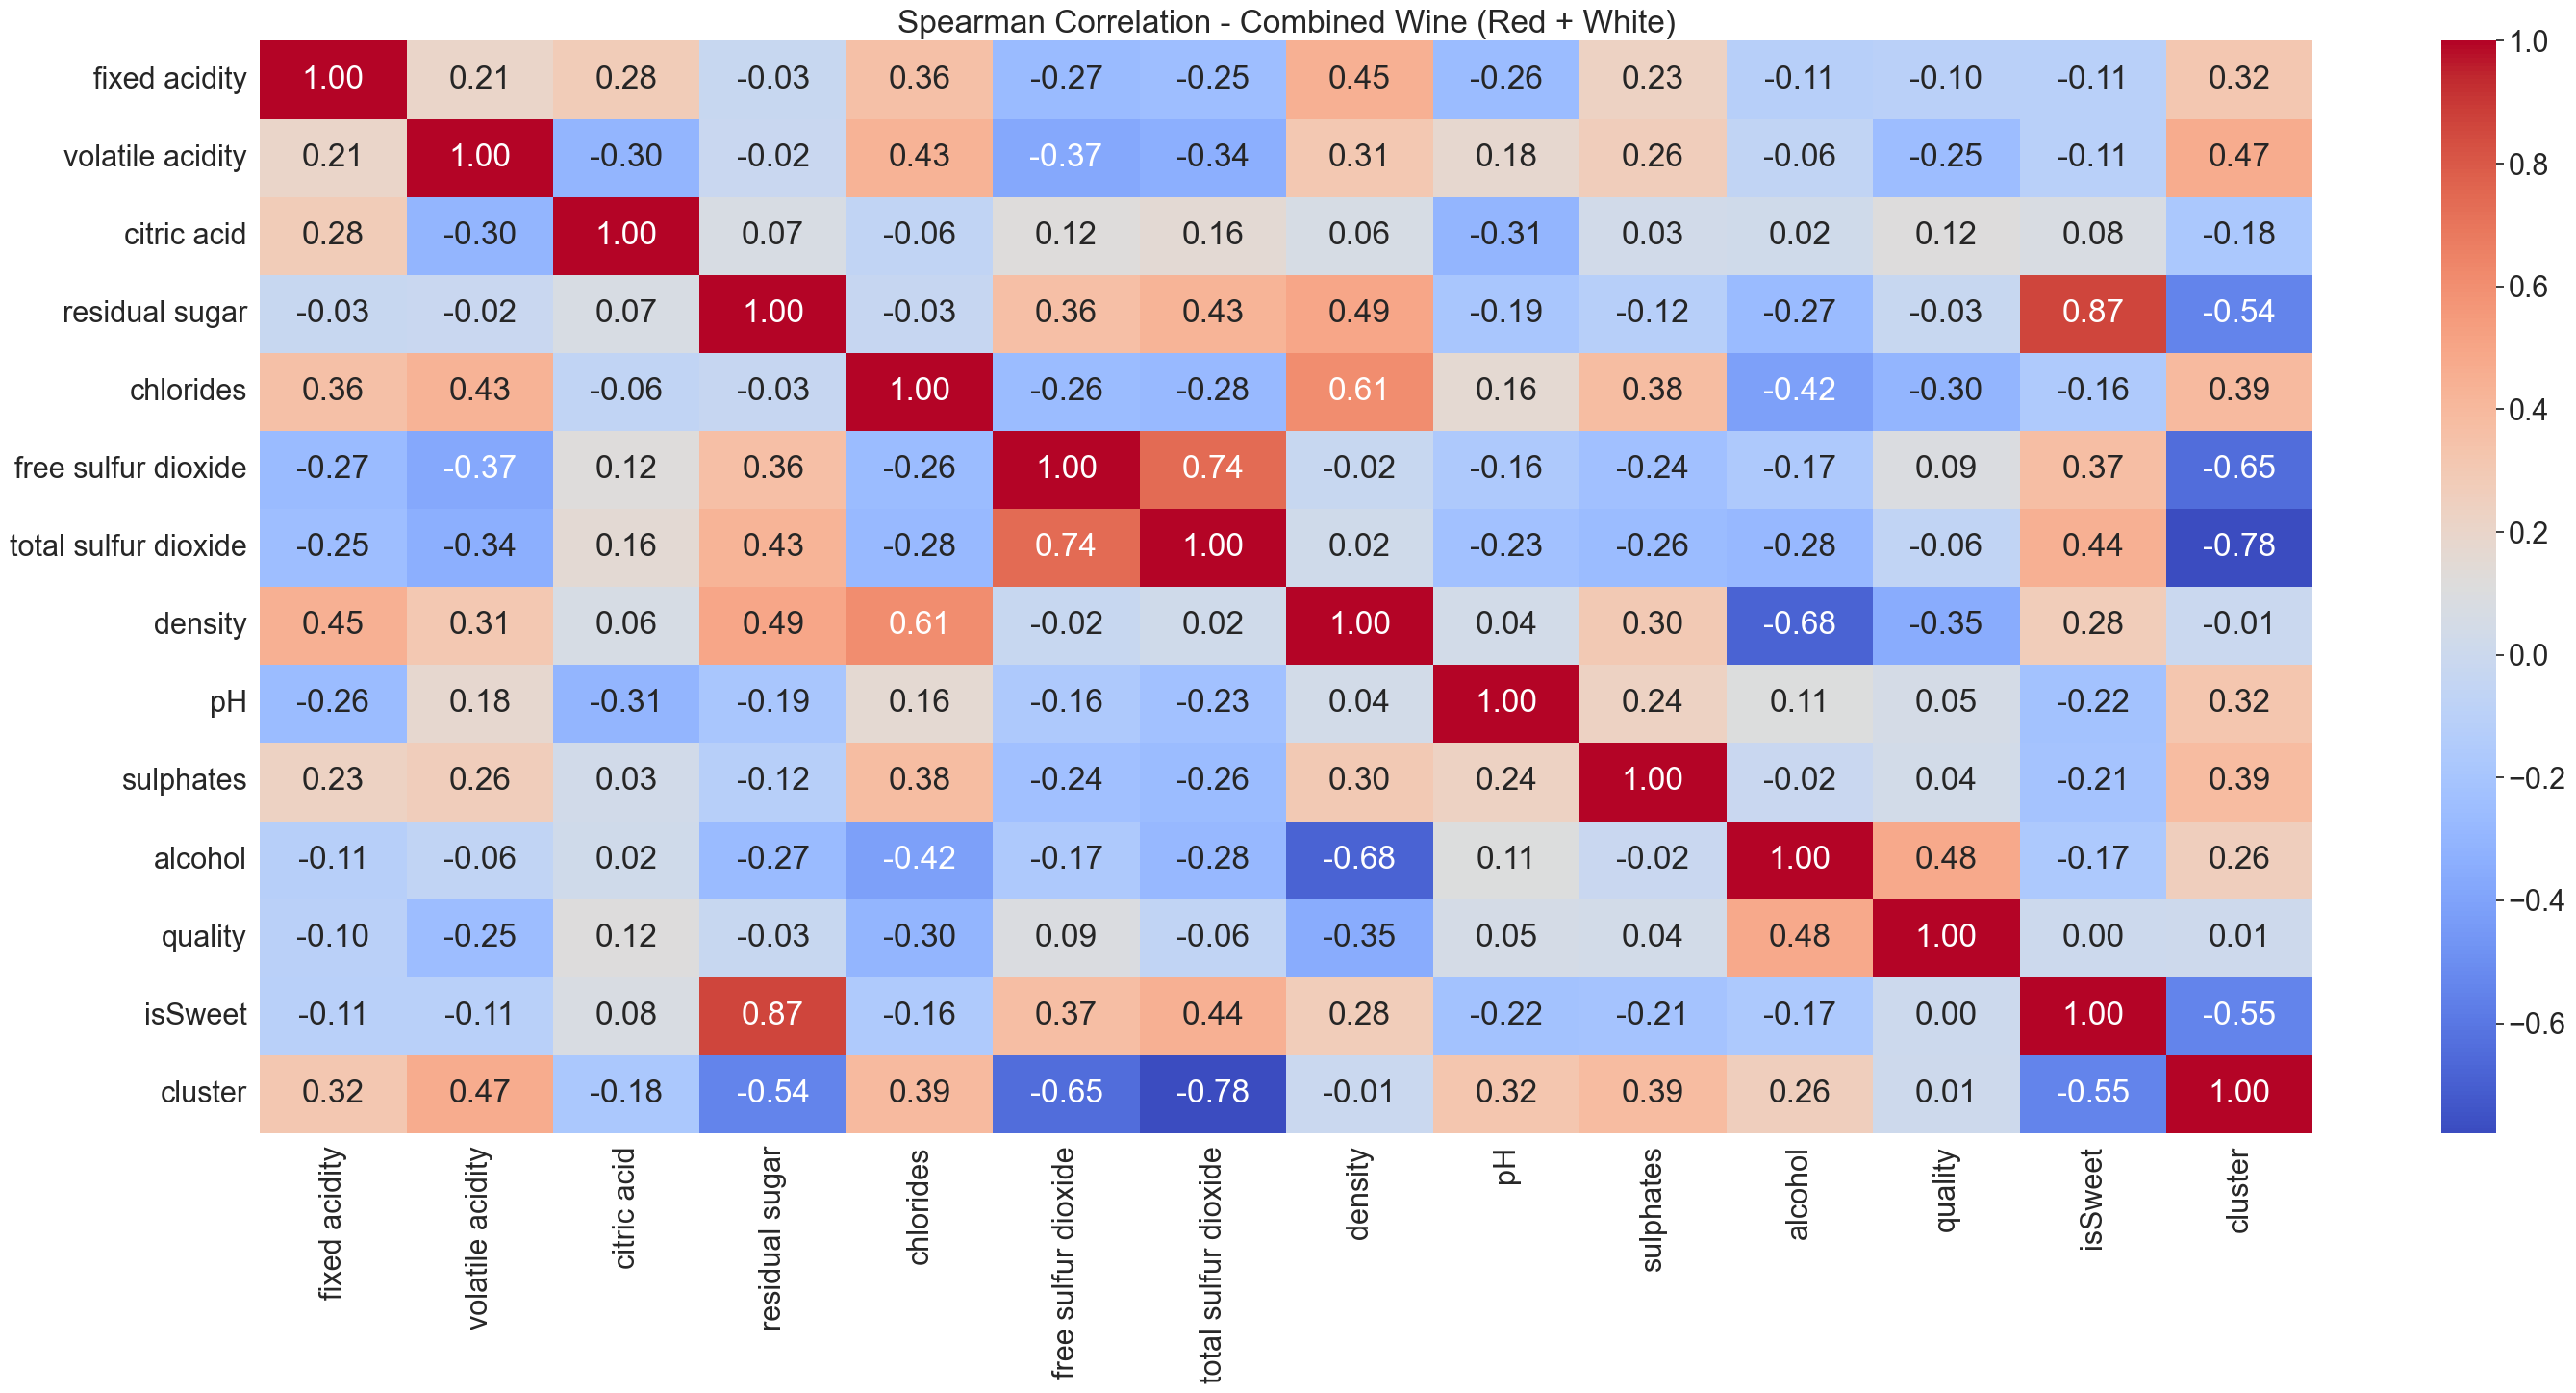

In [ ]:
# Correlation Heatmap - Spearmans Correlation 

# Combined Correlation Heatmap
combined_corr = combined_wine.select_dtypes(include='number').corr(method='spearman')

print("\nCombined Wine Correlation Matrix:\n", combined_corr)

plt.figure(figsize=(30, 15))
seaborn.heatmap(combined_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation - Combined Wine (Red + White)')
plt.tight_layout()
plt.show()

If two variables carry too much of the same signal, it may confuse or overfit your model — so this helps in feature selection.
Good Predictors of Quality:
- alcohol → 0.45 correlation with quality → moderate positive.
- volatile acidity → -0.26 → inverse relationship (more acidity = lower quality).
- density → -0.32 → Higher density, generally lower quality.
- chlorides → -0.30 → More saltiness = worse perception.


Combined Wine - Correlation with Quality:
 quality                 1.00
alcohol                 0.48
density                -0.35
chlorides              -0.30
volatile acidity       -0.25
citric acid             0.12
fixed acidity          -0.10
free sulfur dioxide     0.09
total sulfur dioxide   -0.06
pH                      0.05
sulphates               0.04
residual sugar         -0.03
cluster                 0.01
isSweet                 0.00
Name: quality, dtype: float64


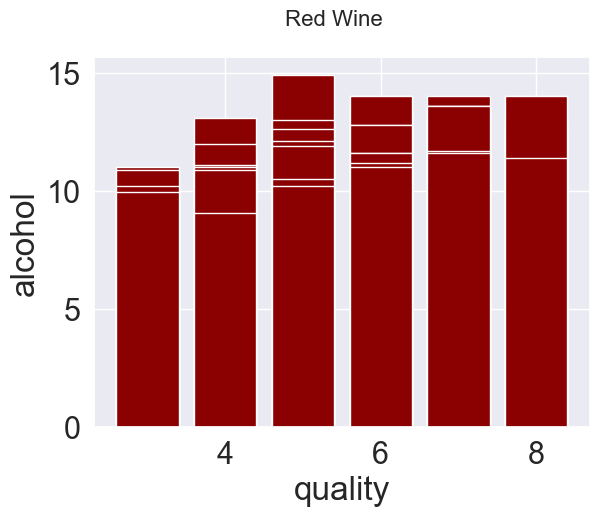

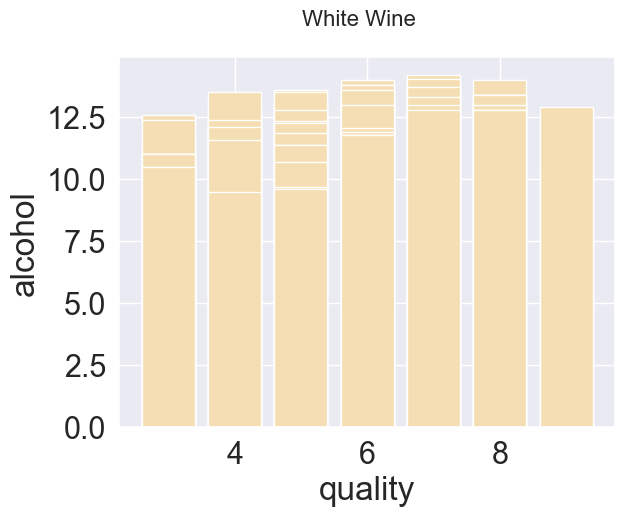

In [ ]:
# Filter correlations with 'quality' only
combined_quality_corr = combined_corr['quality'].sort_values(key=abs, ascending=False)

print("\nCombined Wine - Correlation with Quality:\n", combined_quality_corr)

plt.bar(red_wine['quality'], red_wine['alcohol'], color='#8B0000')
plt.suptitle("Red Wine", fontsize=16)
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

plt.bar(white_wine['quality'], white_wine['alcohol'], color='#F5DEB3')
plt.suptitle("White Wine", fontsize=16)
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

After analyzing the Spearman correlation matrix for the combined wine dataset, several variables showed meaningful relationships with wine quality. Alcohol content demonstrated a moderate positive correlation with quality (~0.48), while density (-0.35), volatile acidity (-0.25), and chlorides (-0.30) exhibited moderate negative correlations. Features such as residual sugar and isSweet were highly correlated (0.87), indicating redundancy, and similar multicollinearity was observed between free and total sulfur dioxide (0.74). These insights will guide the feature selection process for model building, focusing on variables that are informative yet not overly redundant.

In [ ]:
# Feature Extraction

# Calculate mean and standard deviation for each feature
feature_stats = combined_wine.describe().transpose()[['mean', 'std']]

# Print the feature name, mean, and standard deviation
print(feature_stats)


                       mean   std
fixed acidity          7.22  1.32
volatile acidity       0.34  0.17
citric acid            0.32  0.15
residual sugar         5.05  4.50
chlorides              0.06  0.04
free sulfur dioxide   30.04 17.81
total sulfur dioxide 114.11 56.77
density                0.99  0.00
pH                     3.22  0.16
sulphates              0.53  0.15
alcohol               10.55  1.19
quality                5.80  0.88


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Feature Reduction using PCA

# Convert string columns to numeric before scaling
# Check each column for string/object data types
for column in combined_wine.columns:
    if combined_wine[column].dtype == 'object':
        print(f"Converting column '{column}' from {combined_wine[column].dtype} to numeric")
        le = LabelEncoder()
        combined_wine[column] = le.fit_transform(combined_wine[column])

# Double-check that all columns are now numeric
# print(combined_wine.dtypes)

# Prepare data
X = combined_wine.drop(columns=['quality'])  # Features
y = (combined_wine['quality'] >= 6).astype(int)  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 components
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio for each component
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Show the first few rows of the transformed data (PCA components)
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print("\nPCA Transformed Data (First few rows):")
print(pca_df.head())

# Optionally, you can look at which features contribute most to each principal component
print("\nPCA Components (feature contributions):")
loadings_df = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=X.columns
)
print(loadings_df)

Explained Variance Ratio for each component:
[0.35864239 0.1917309  0.12272285 0.07335679 0.058017  ]
Total variance explained: 80.45%

PCA Transformed Data (First few rows):
    PC1   PC2   PC3   PC4   PC5
0 -4.04 -0.45 -2.57 -0.81  0.02
1 -4.01  0.28 -1.86 -0.79  1.17
2 -3.98  0.04 -1.57 -0.81  0.76
3 -3.03  1.70  2.54 -0.36 -0.64
4 -3.89 -0.42 -2.53 -0.70  0.00

PCA Components (feature contributions):
                       PC1   PC2   PC3   PC4   PC5
fixed acidity        -0.24  0.25  0.45 -0.20 -0.16
volatile acidity     -0.32  0.00 -0.28 -0.24  0.12
citric acid           0.09  0.24  0.57  0.25 -0.18
residual sugar        0.19  0.42 -0.19 -0.18 -0.40
chlorides            -0.27  0.21  0.03  0.28  0.62
free sulfur dioxide   0.29  0.22 -0.17  0.34  0.05
total sulfur dioxide  0.36  0.24 -0.15  0.20  0.08
density              -0.19  0.53 -0.16 -0.10 -0.26
pH                   -0.15 -0.21 -0.46  0.39 -0.40
sulphates            -0.26  0.10  0.10  0.63 -0.11
alcohol               0.02 -0.4

Top predictors: Focus on alcohol, density, and chlorides, which have the strongest correlations with quality.

Negligible predictors: Variables like isSweet (0.00) and cluster (0.01) show very little predictive power for quality.

Moderate predictors: volatile acidity (-0.25) and citric acid (0.12) have weaker correlations but could still be useful in a machine learning model.

# Task 3

Experiment with one or more machine learning approaches
 
This creates a predictive model for quality. Some options are:
Consider this as a classification problem. You can do this by considering the quality labels, ie. '5', '6', ... '9' and reducing the number of possible labels to two (binary classification). You should experiment with different thresholds and compare results, for instance define "low" to be quality <6, "high" >=6, then change the threshold to 5 or 7, etc. 
Consider this a regression problem, where quality is now a continuous variable.


--- Threshold: 6 ---
Confusion Matrix:
 [[87 41]
 [45 99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67       128
           1       0.71      0.69      0.70       144

    accuracy                           0.68       272
   macro avg       0.68      0.68      0.68       272
weighted avg       0.68      0.68      0.68       272

Accuracy Score: 0.68


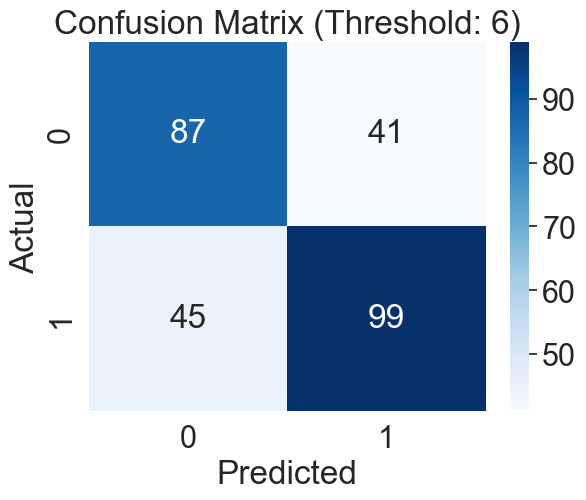

In [ ]:
# XGBoost

import xgboost as xgb

# Selected features
features = [
    'alcohol', 'density', 'volatile acidity', 'citric acid', 'fixed acidity',
    'free sulfur dioxide', 'total sulfur dioxide'
]

# Threshold for classification
thresholds = [6]

results = {}

for threshold in thresholds:
    print(f"\n--- Threshold: {threshold} ---")

    # Binary target
    red_wine_binary = red_wine.copy()
    red_wine_binary['quality_binary'] = (red_wine_binary['quality'] >= threshold).astype(int)

    X = red_wine_binary[features]
    y = red_wine_binary['quality_binary']

    # Skip if only one class present
    if len(y.unique()) < 2:
        print(f"Skipping threshold {threshold}: only one class present in the data.")
        continue
    
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    # Train/test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
    )

    # XGBoost model
    xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False)
    xgb_model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = xgb_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    results[threshold] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'report': report
    }

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Accuracy Score:", round(acc, 2))

    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



--- Threshold: 6 ---
Confusion Matrix:
 [[ 98  30]
 [ 41 103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.73       128
           1       0.77      0.72      0.74       144

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272

Accuracy Score: 0.74


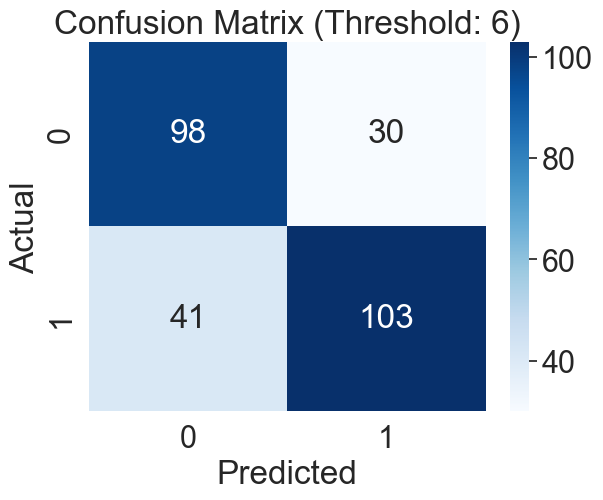

In [325]:
# Logistic Regression for Binary Classification

# Selected features
features = [
    'alcohol', 'density', 'volatile acidity', 'citric acid', 'fixed acidity',
    'free sulfur dioxide', 'total sulfur dioxide'
]

# thresholds = [4, 5, 6, 7, 8, 9] | 6 came out as the best
thresholds = [6]

results = {}

for threshold in thresholds:
    print(f"\n--- Threshold: {threshold} ---")

    # Binary target
    red_wine_binary = red_wine.copy()
    red_wine_binary['quality_binary'] = (red_wine_binary['quality'] >= threshold).astype(int)

    X = red_wine_binary[features]
    y = red_wine_binary['quality_binary']

    # Skip if only one class present
    if len(y.unique()) < 2:
        print(f"Skipping threshold {threshold}: only one class present in the data.")
        continue
    
    scaler = StandardScaler()
    scaler.fit(X)
    x_standard = scaler.transform(X)
    
    # Train/test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Model
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = logreg.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

  
    results[threshold] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'report': report
    }

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Accuracy Score:", round(acc, 2))

    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



--- Threshold: 6 ---
Confusion Matrix:
 [[ 97  31]
 [ 39 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       128
           1       0.77      0.73      0.75       144

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272

Accuracy Score: 0.74


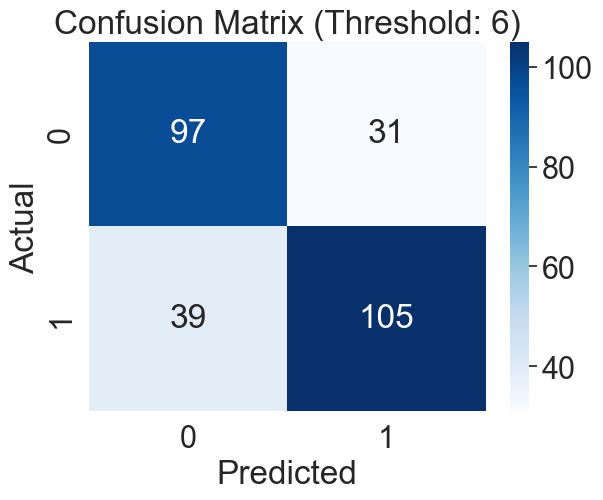

In [326]:
from sklearn.svm import SVC

# SVM Classifier

# Selected features
features = [
    'alcohol', 'density', 'volatile acidity', 'citric acid', 'fixed acidity',
    'free sulfur dioxide', 'total sulfur dioxide'
]

# Threshold
thresholds = [6]

results = {}

for threshold in thresholds:
    print(f"\n--- Threshold: {threshold} ---")

    red_wine_binary = red_wine.copy()
    red_wine_binary['quality_binary'] = (red_wine_binary['quality'] >= threshold).astype(int)

    X = red_wine_binary[features]
    y = red_wine_binary['quality_binary']

    if len(y.unique()) < 2:
        print(f"Skipping threshold {threshold}: only one class present in the data.")
        continue

    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    model = SVC(kernel='rbf', C=1, gamma='scale')  # You can tune C and gamma later
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    results[threshold] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'report': report
    }

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Accuracy Score:", round(acc, 2))

    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



--- Threshold: 6 ---
Confusion Matrix:
 [[ 94  34]
 [ 36 108]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73       128
           1       0.76      0.75      0.76       144

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272

Accuracy Score: 0.74


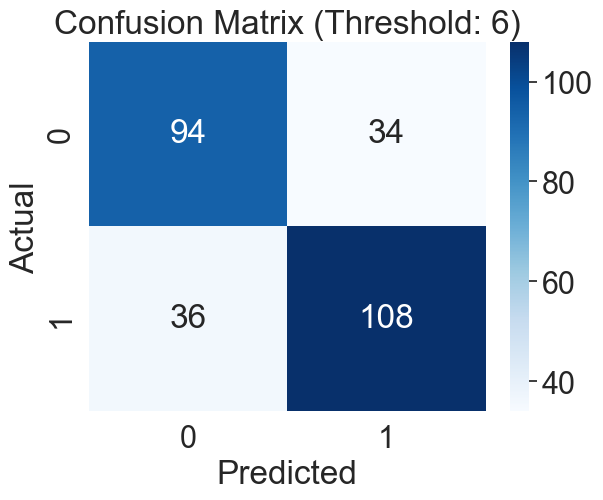

In [327]:
# Random Forest

# Selected features
features = [
    'alcohol', 'density', 'volatile acidity', 'citric acid', 'fixed acidity',
    'free sulfur dioxide', 'total sulfur dioxide'
]

# Threshold for classification
thresholds = [6]

results = {}

for threshold in thresholds:
    print(f"\n--- Threshold: {threshold} ---")

    # Binary target
    red_wine_binary = red_wine.copy()
    red_wine_binary['quality_binary'] = (red_wine_binary['quality'] >= threshold).astype(int)

    X = red_wine_binary[features]
    y = red_wine_binary['quality_binary']

    # Skip if only one class present
    if len(y.unique()) < 2:
        print(f"Skipping threshold {threshold}: only one class present in the data.")
        continue
    
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    # Train/test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
    )

    # Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    results[threshold] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'report': report
    }

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Accuracy Score:", round(acc, 2))

    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [328]:
# Feature importance

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=["importance"]).sort_values("importance", ascending=False)

print("\nFeature Importance:\n", feature_importances)


Feature Importance:
                       importance
alcohol                     0.24
volatile acidity            0.16
total sulfur dioxide        0.14
density                     0.14
fixed acidity               0.11
citric acid                 0.11
free sulfur dioxide         0.10


In [329]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit GridSearchCV on the original data (no scaling)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
print(f"Accuracy of best model: {accuracy_score(y_test, y_pred_best):.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy of best model: 0.72
